[1, 2, 2.5, 3, 4]


/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_4080/1496661101.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()               # <<<<<


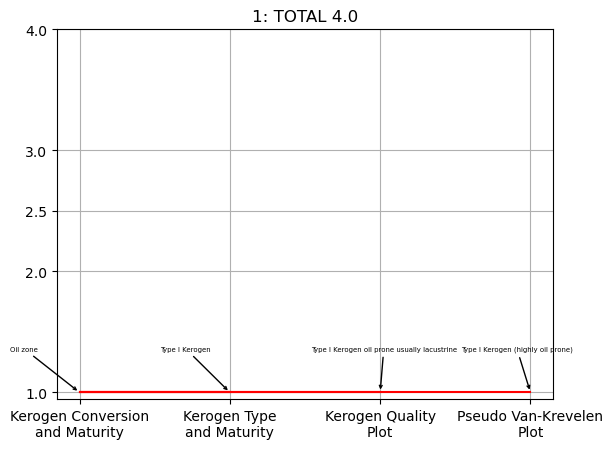

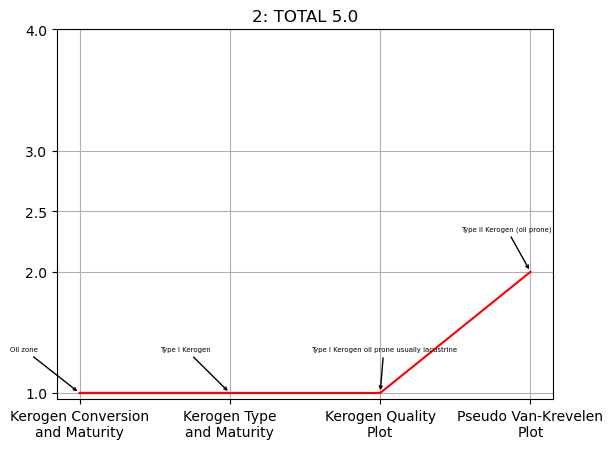

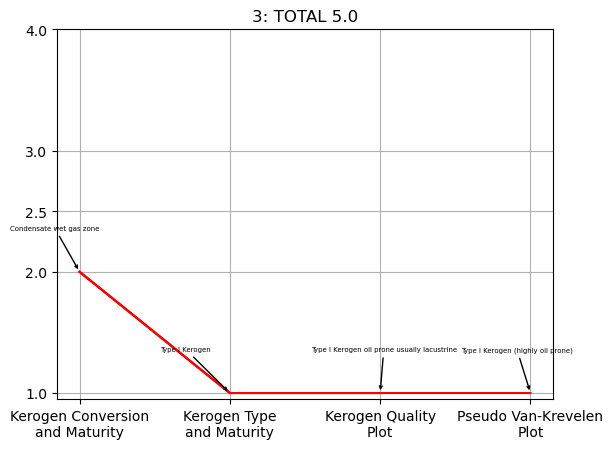

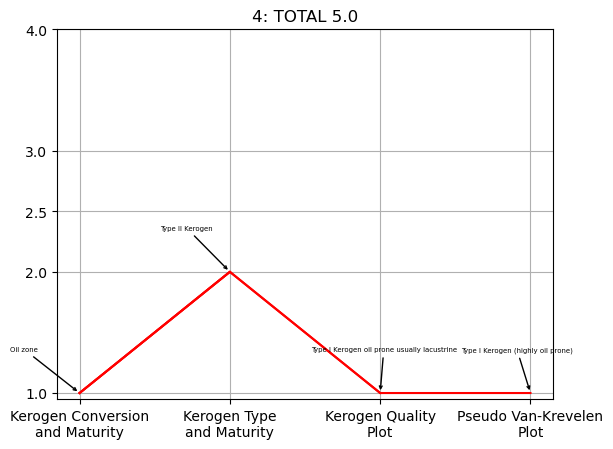

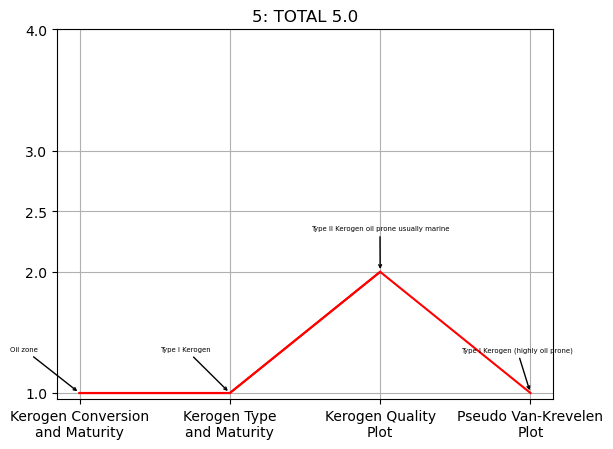

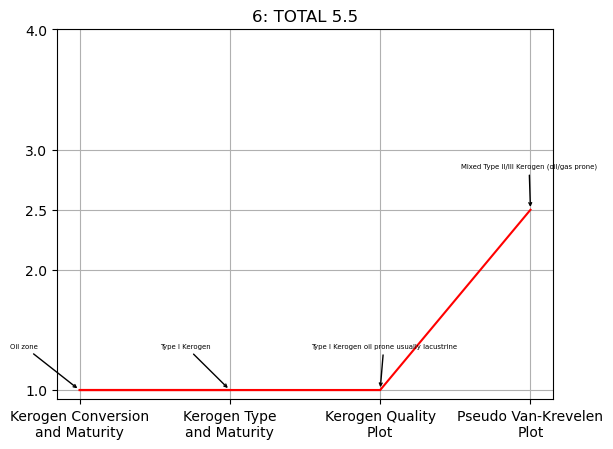

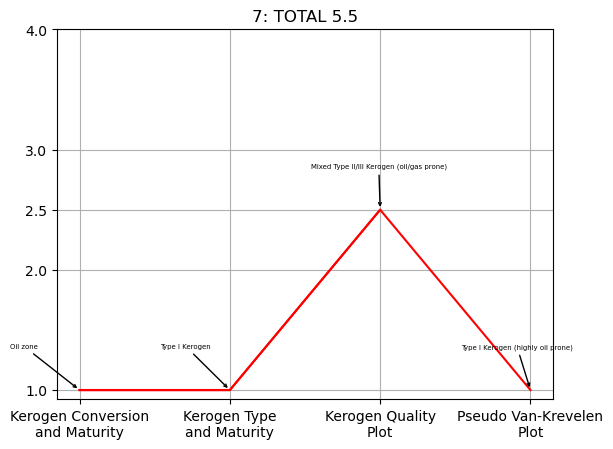

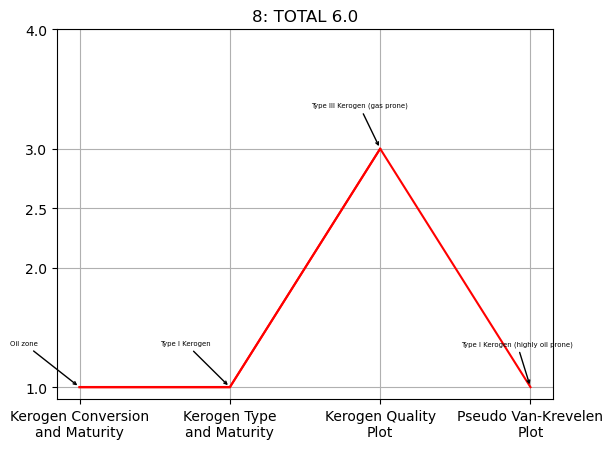

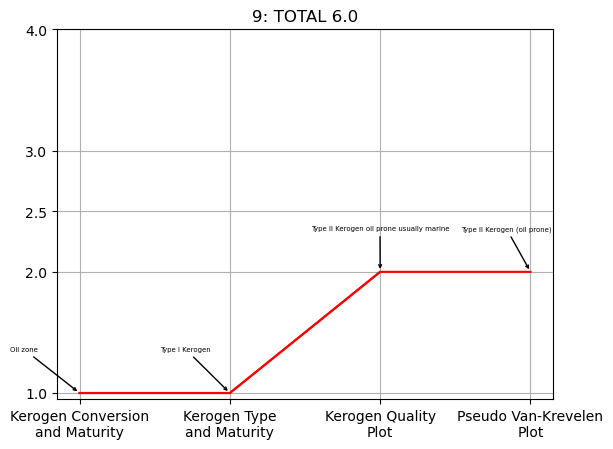

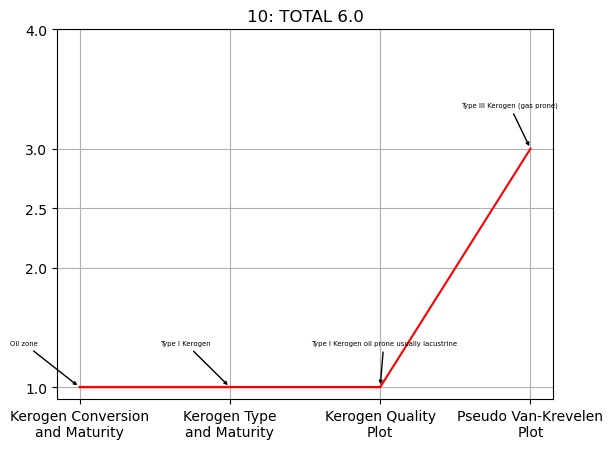

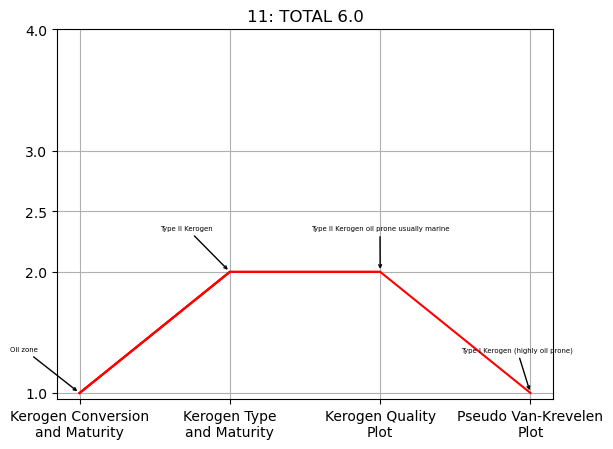

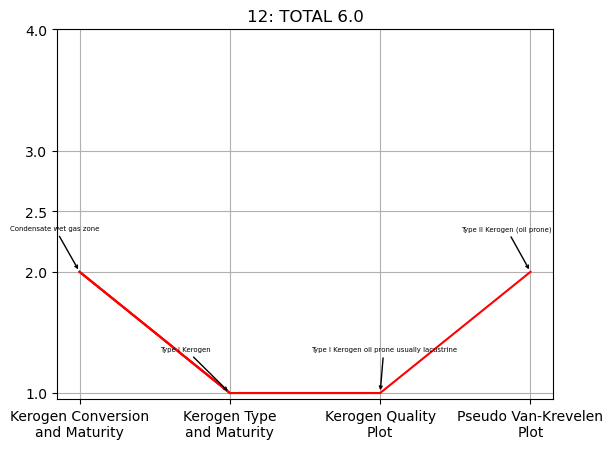

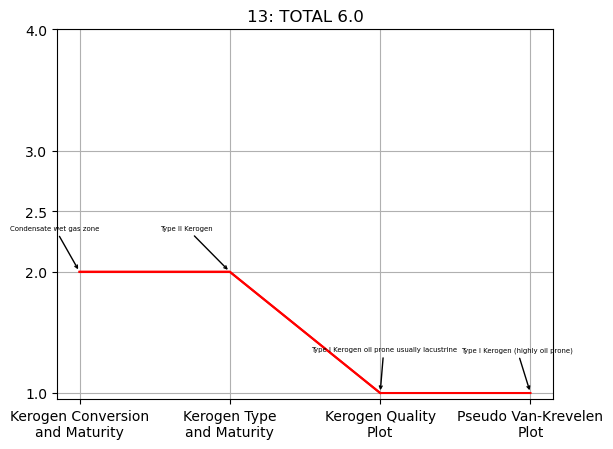

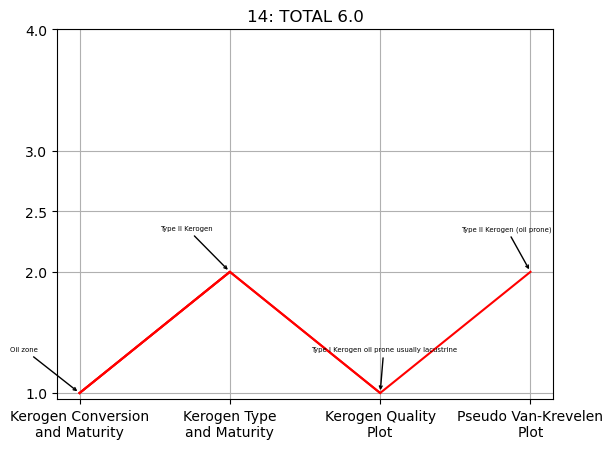

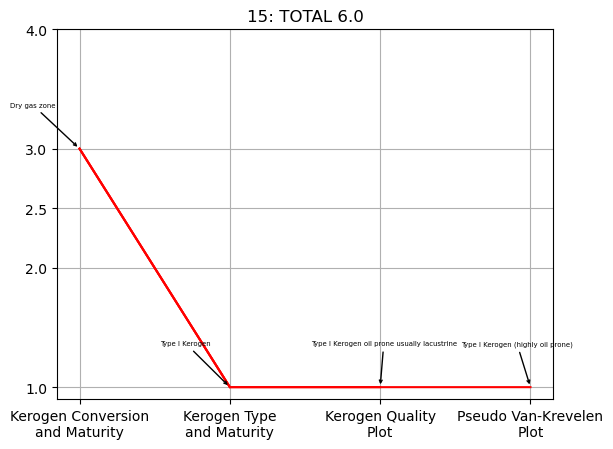

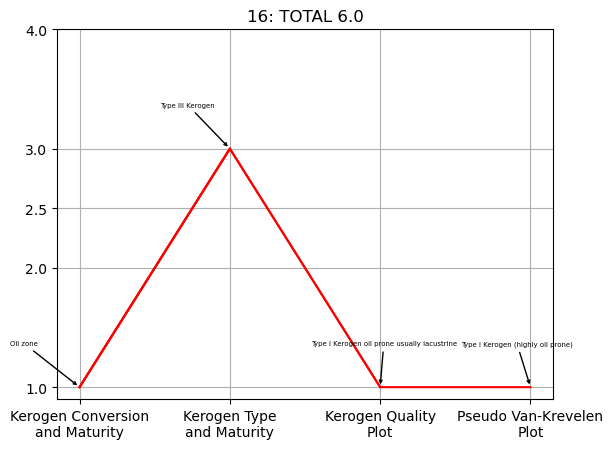

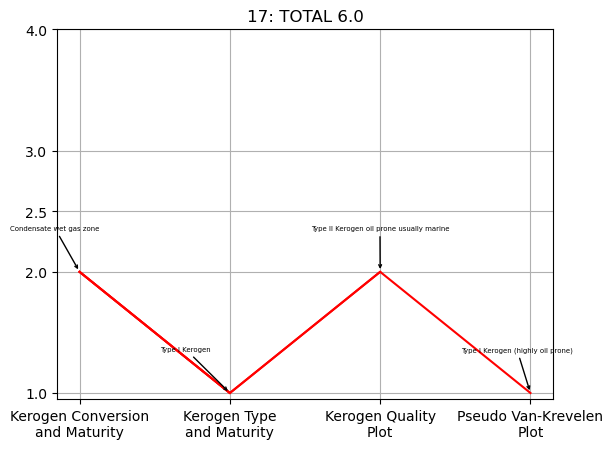

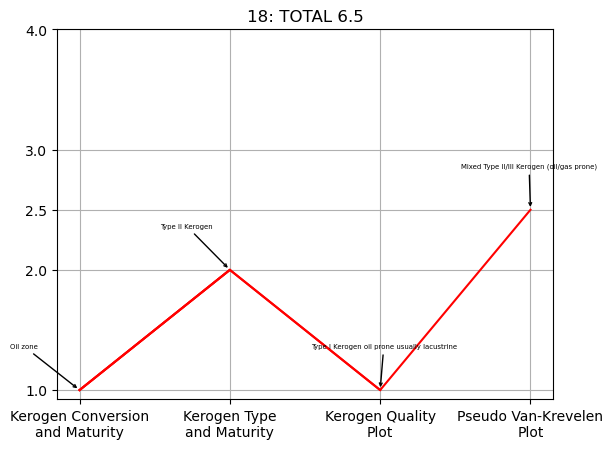

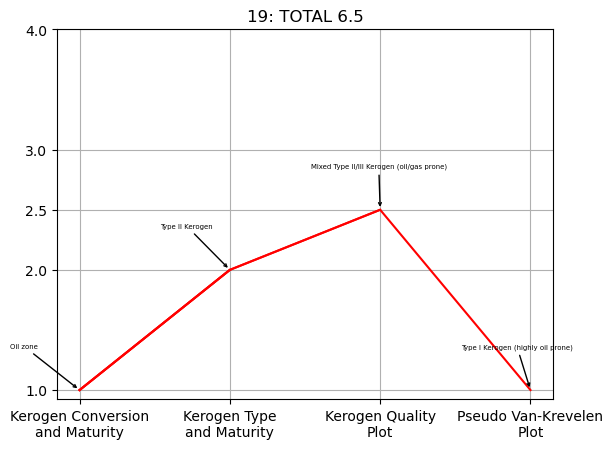

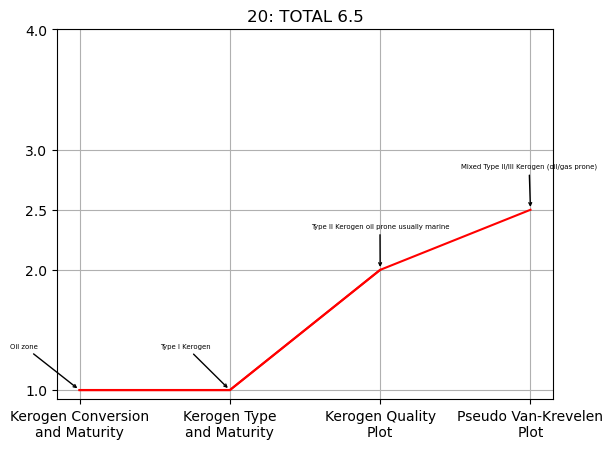

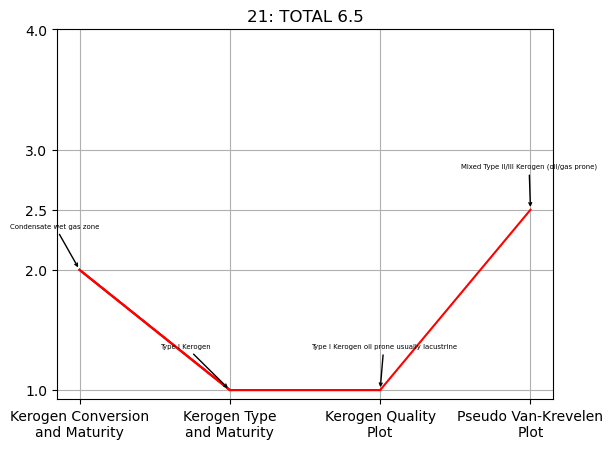

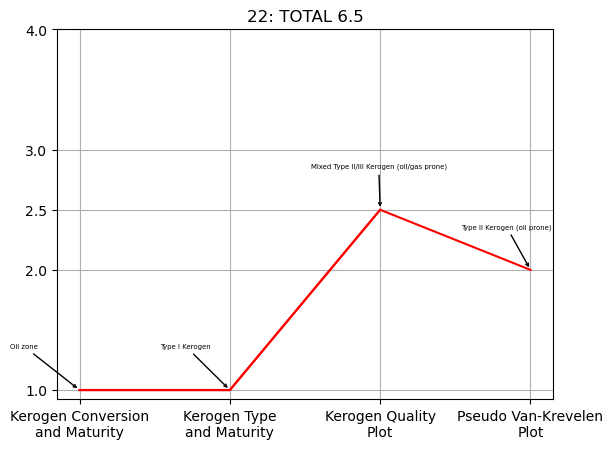

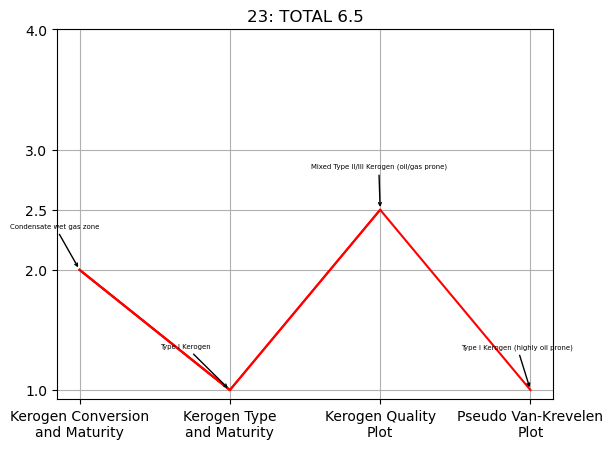

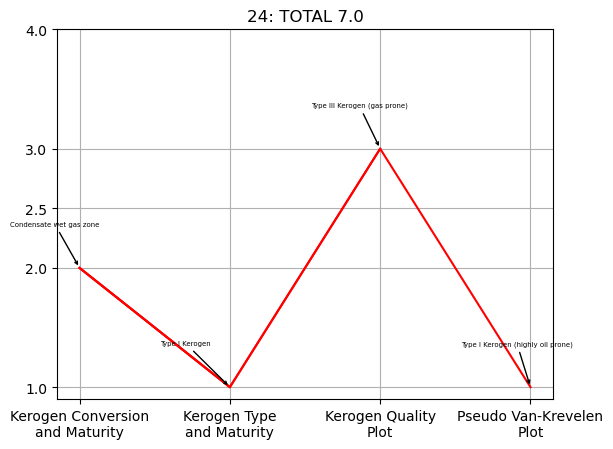

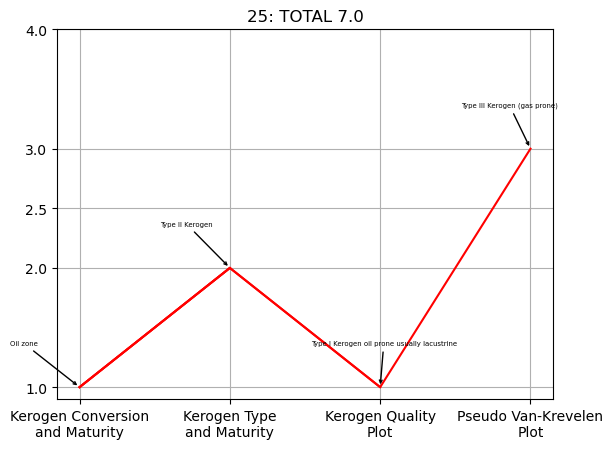

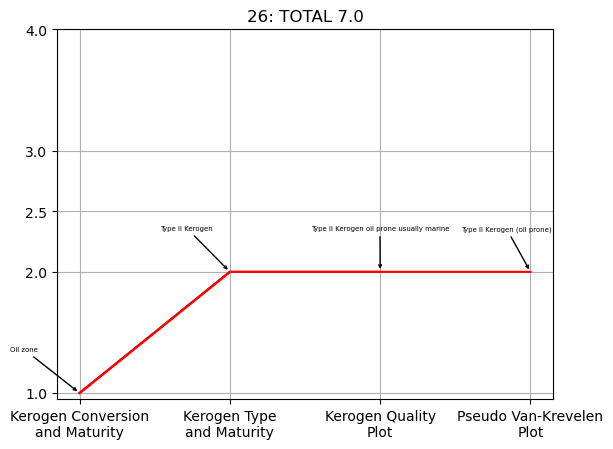

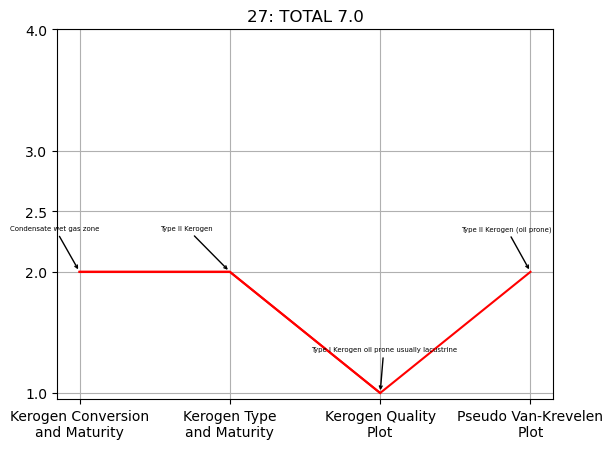

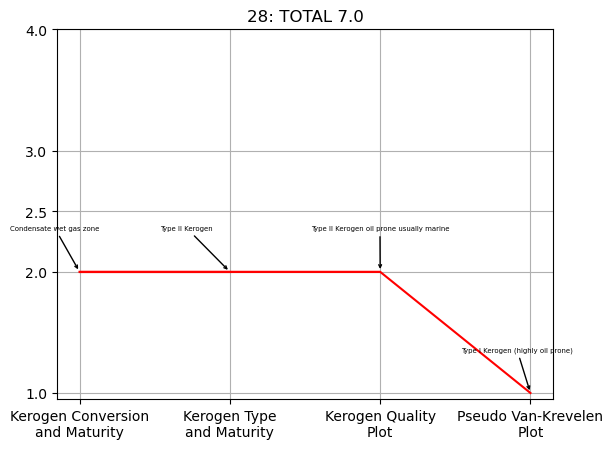

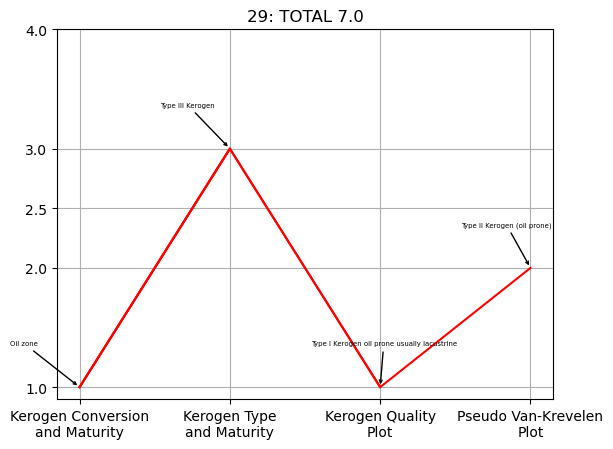

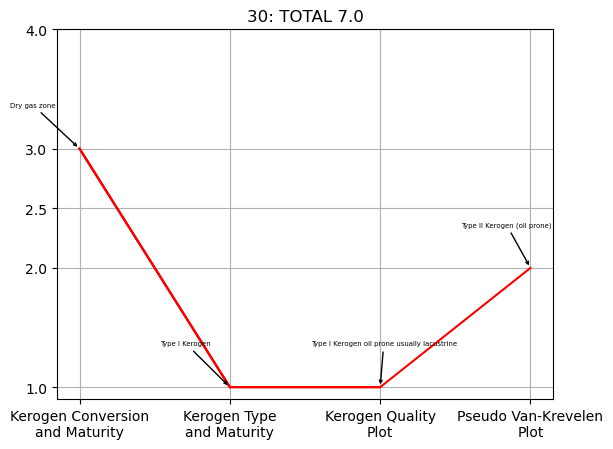

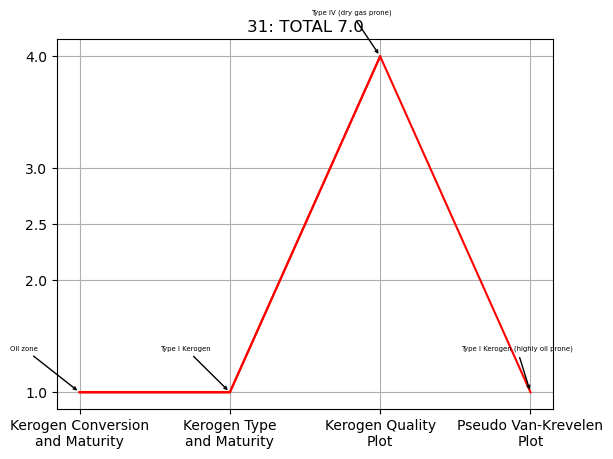

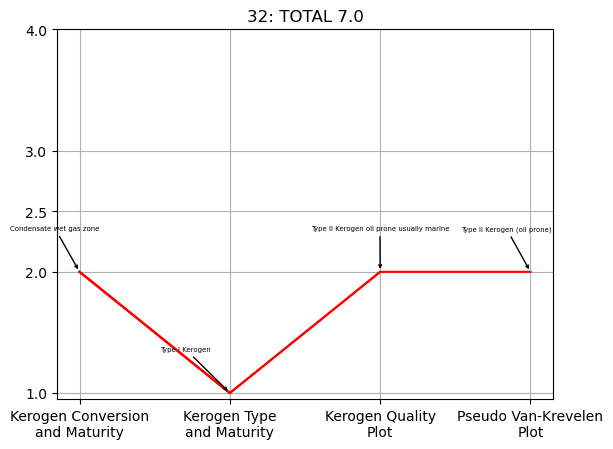

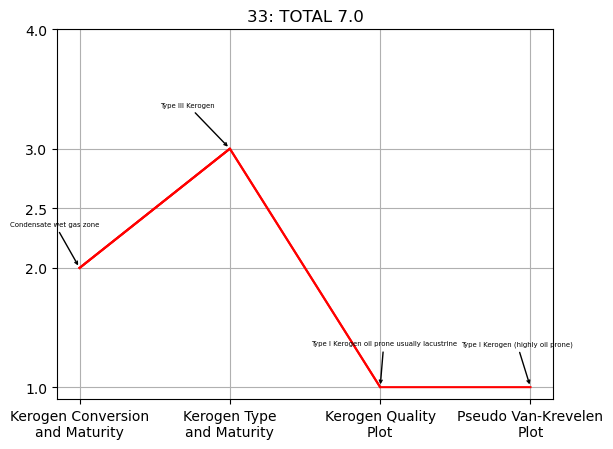

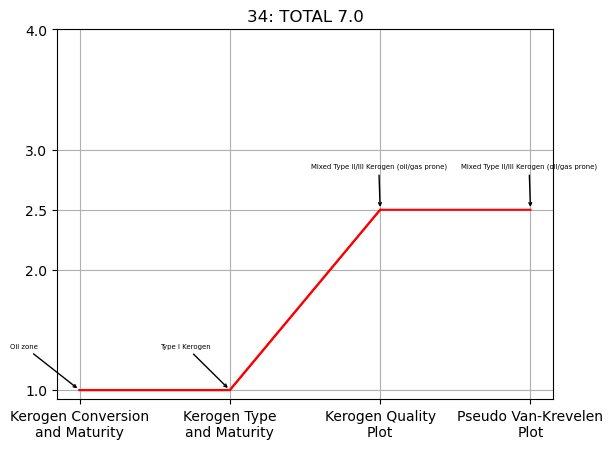

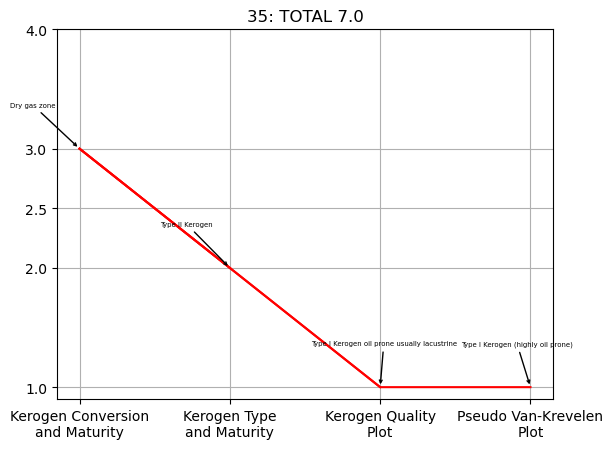

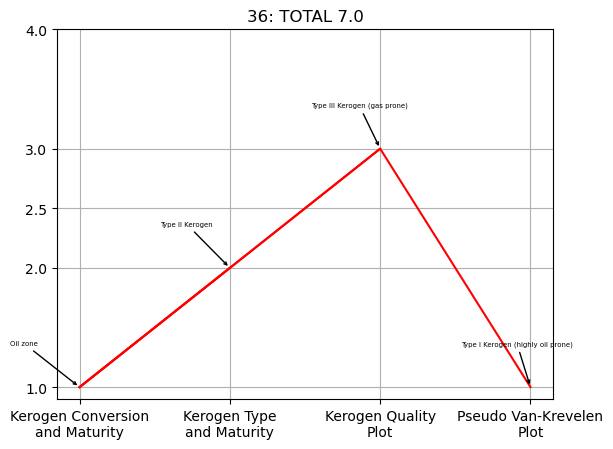

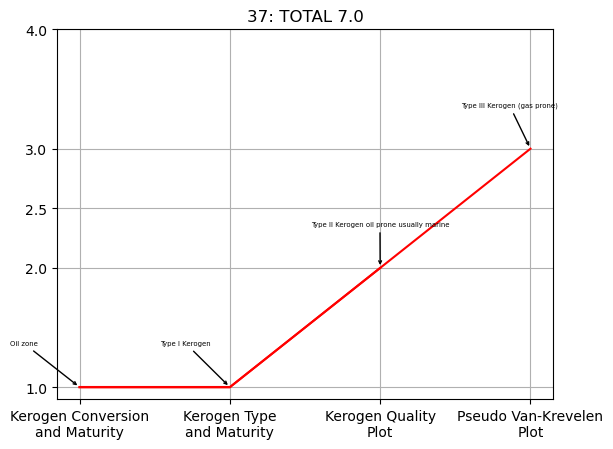

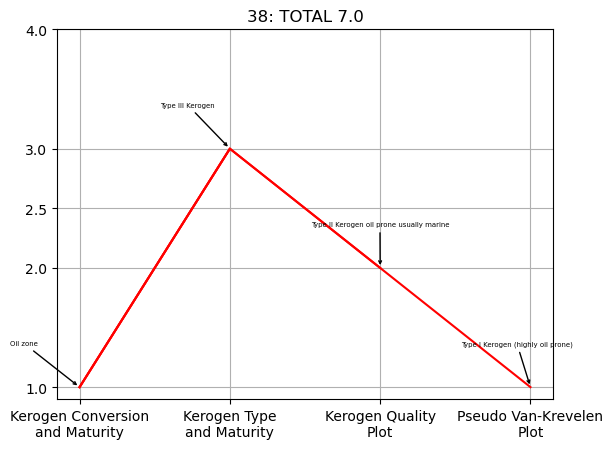

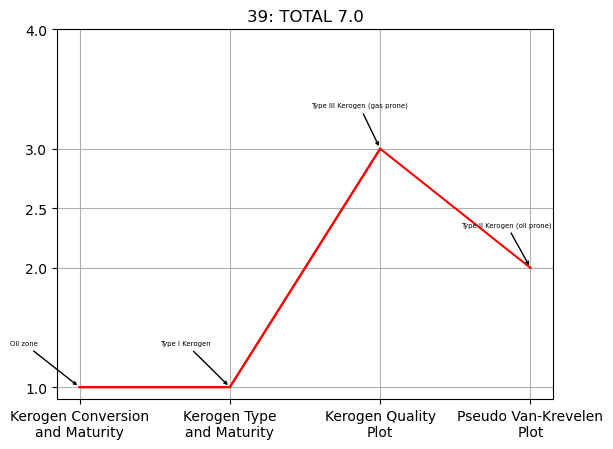

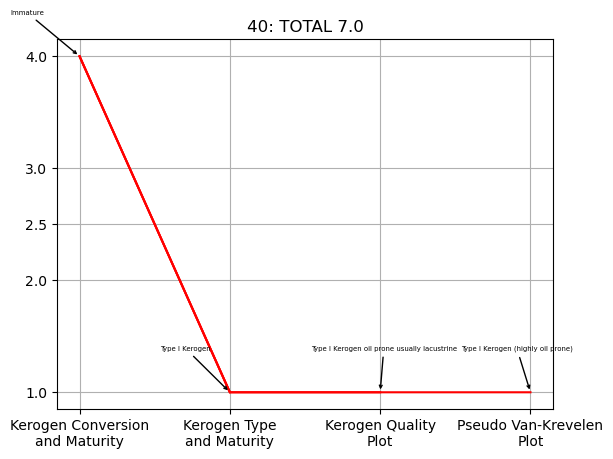

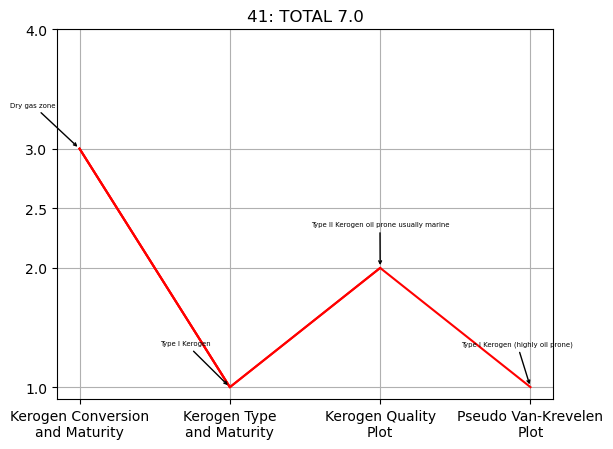

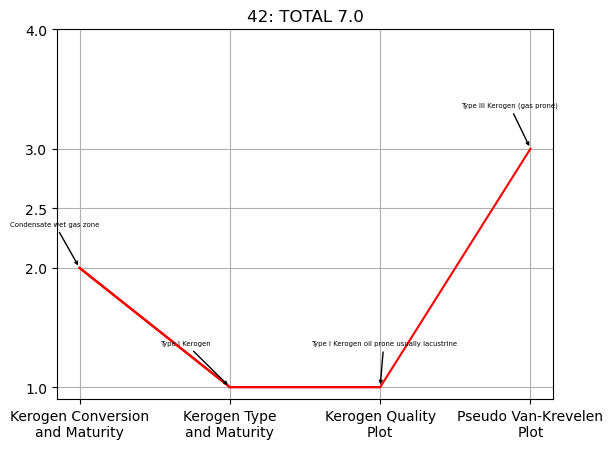

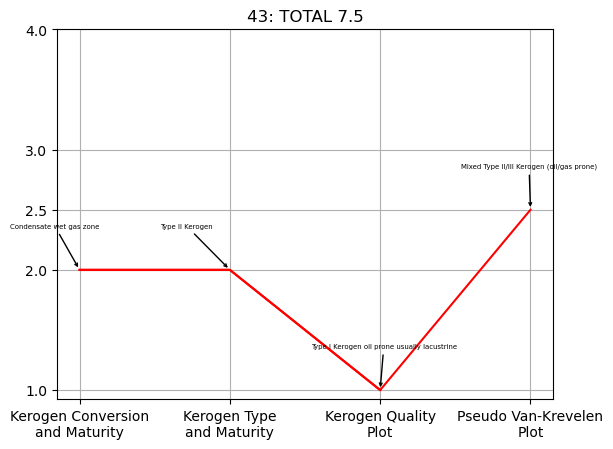

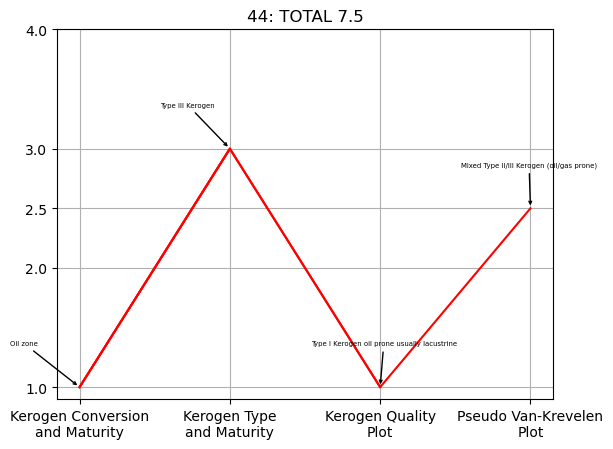

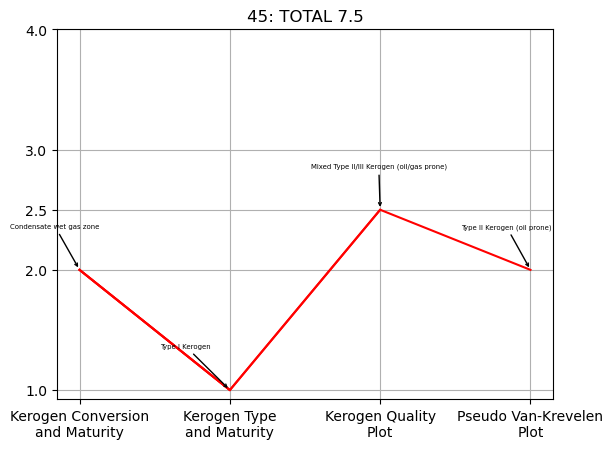

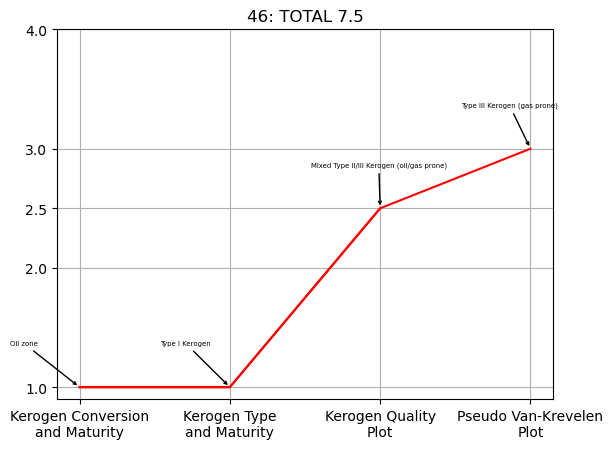

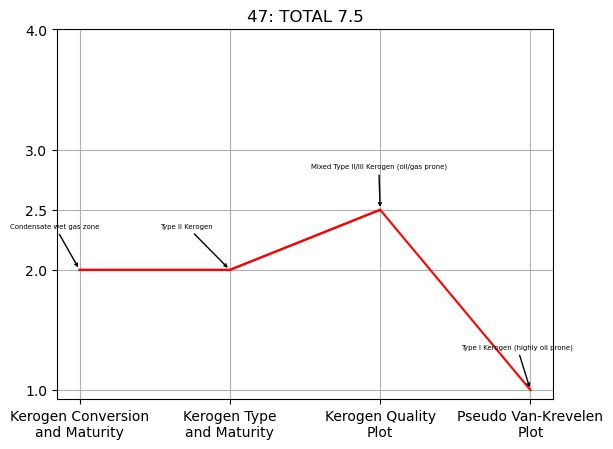

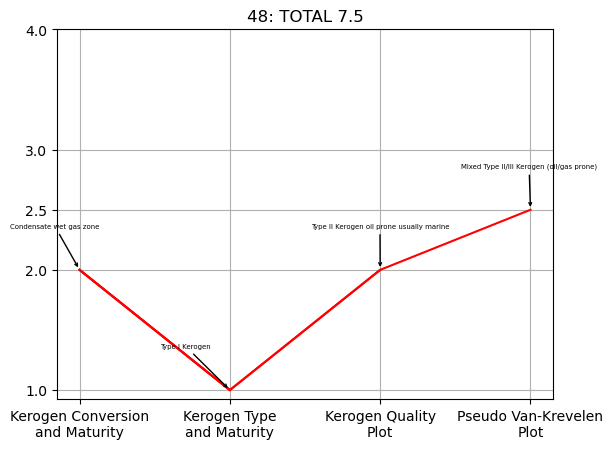

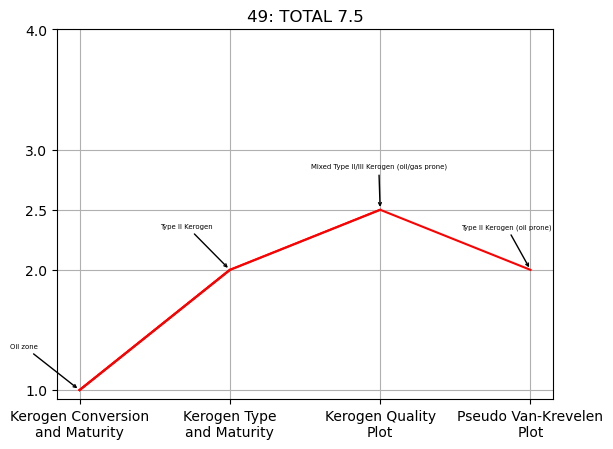

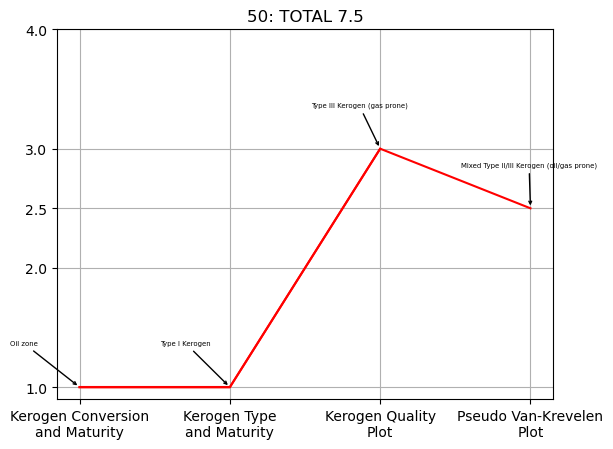

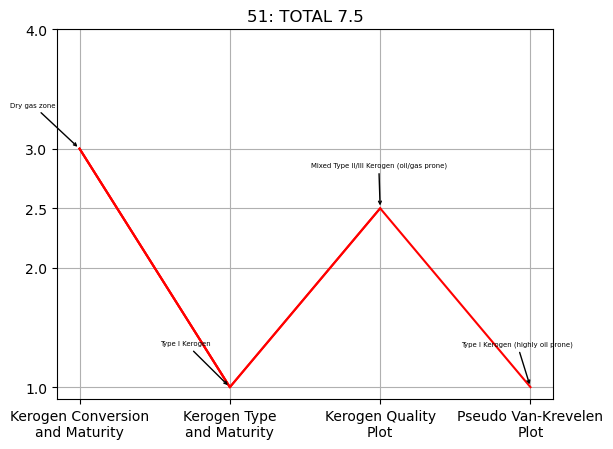

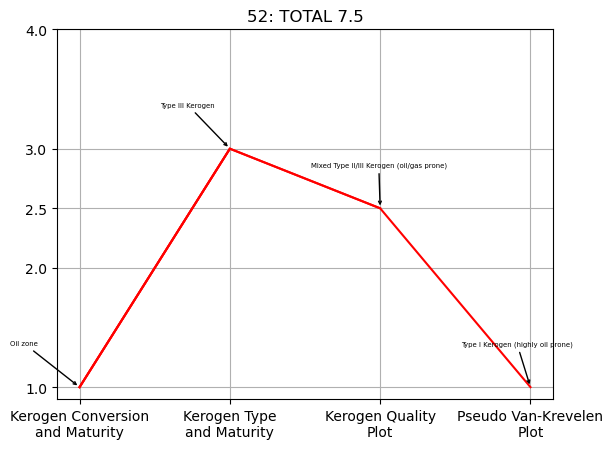

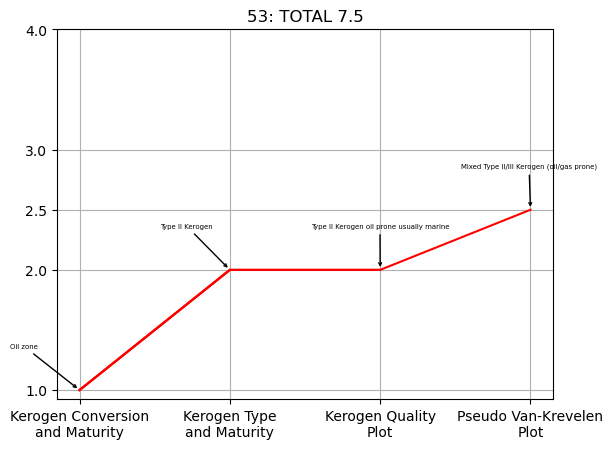

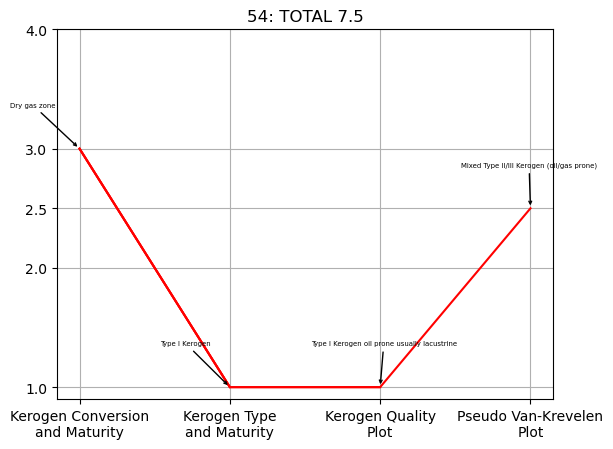

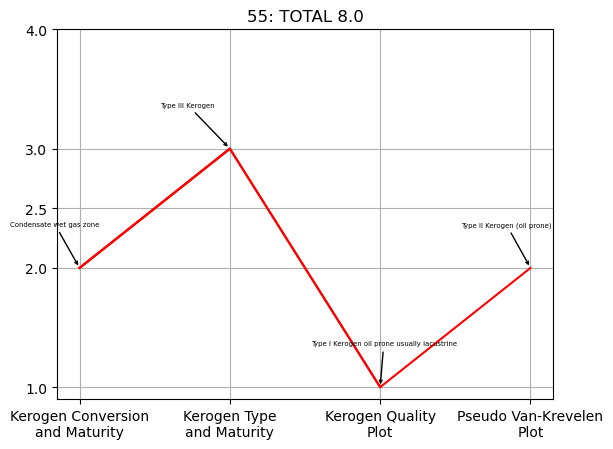

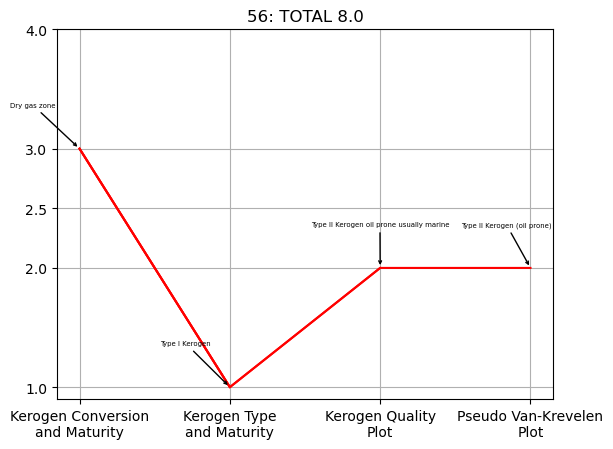

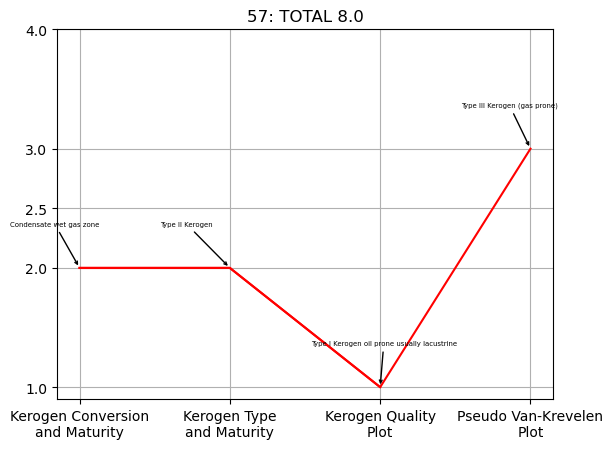

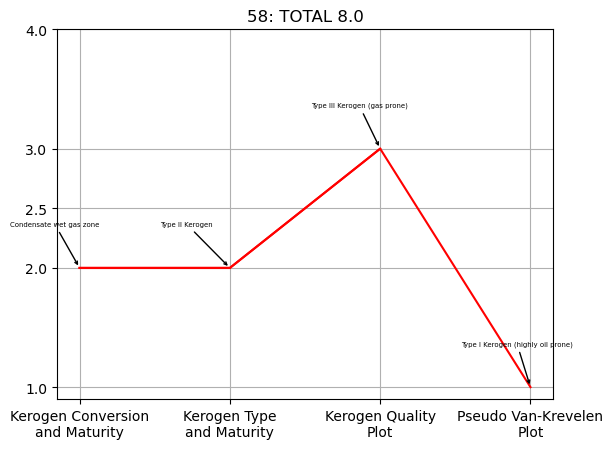

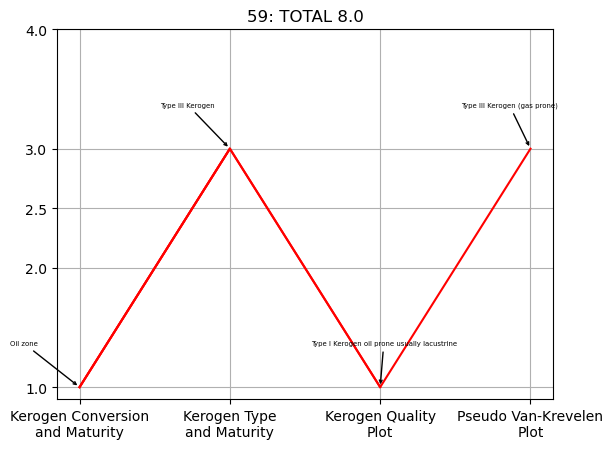

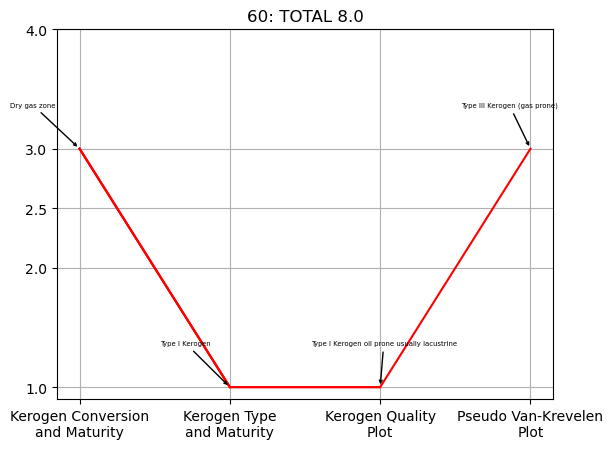

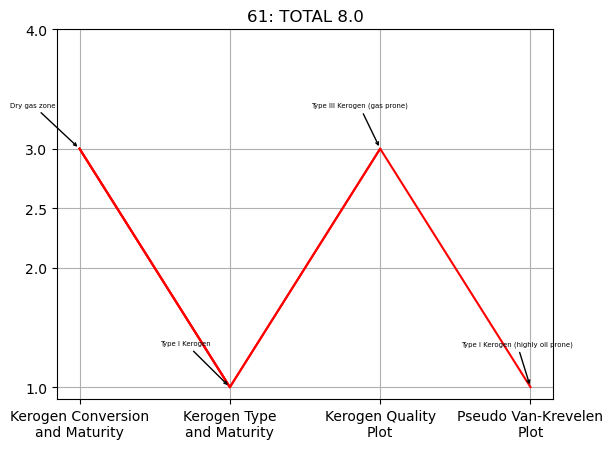

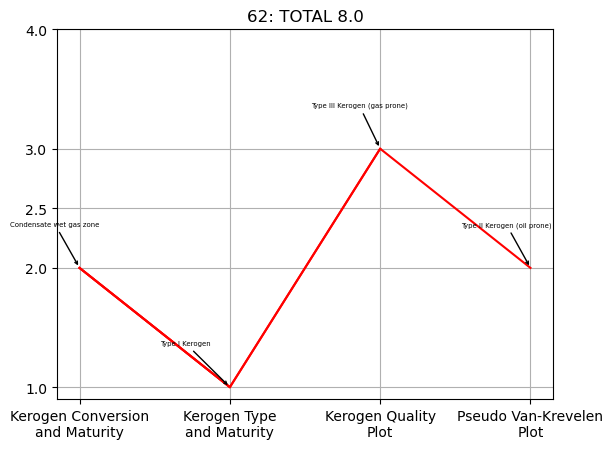

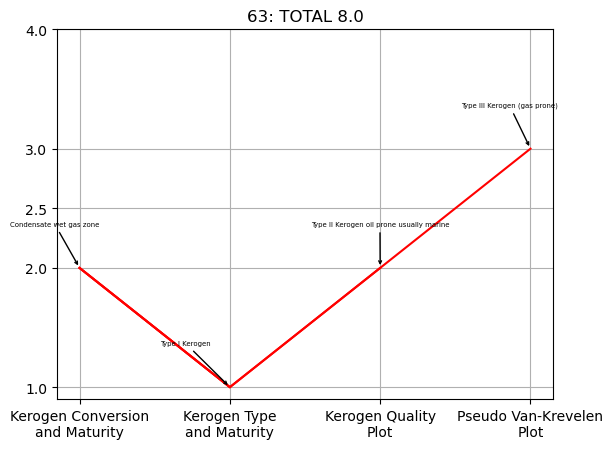

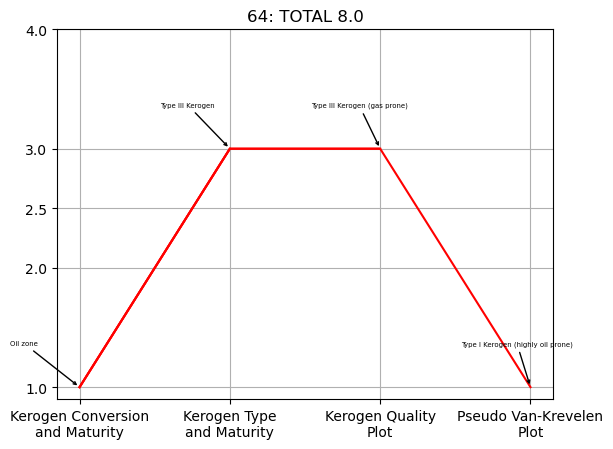

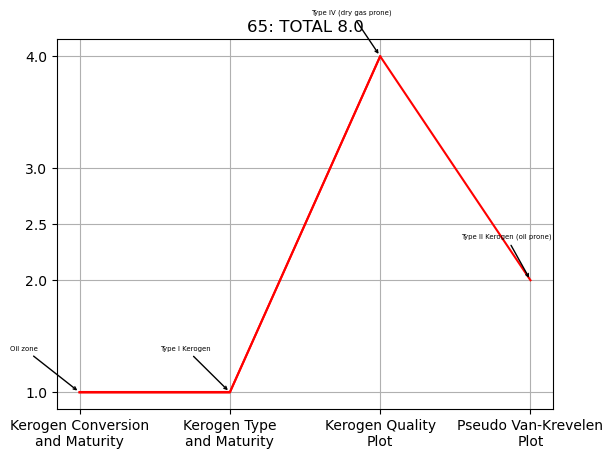

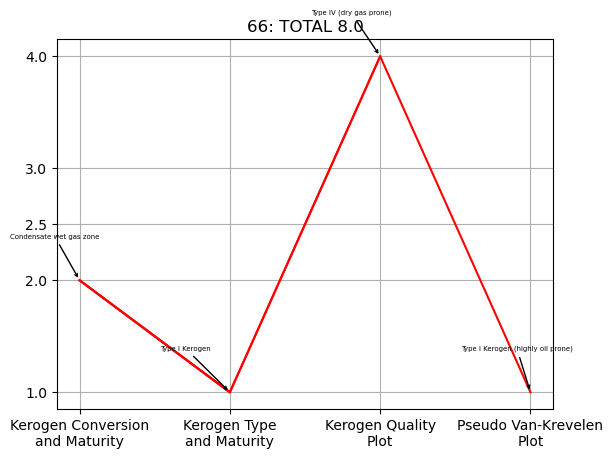

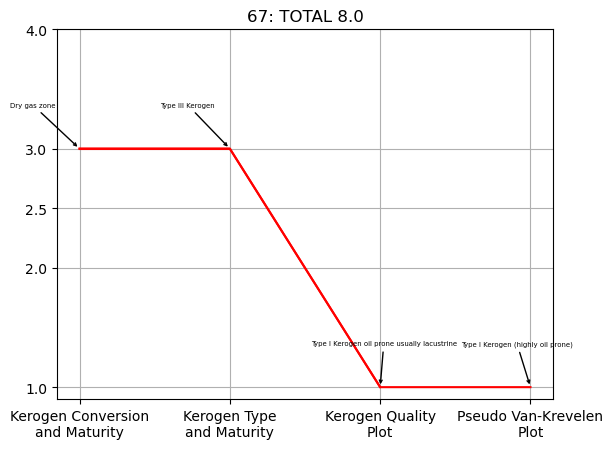

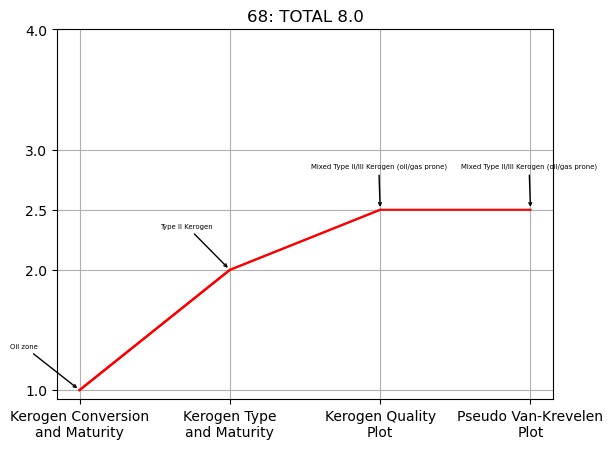

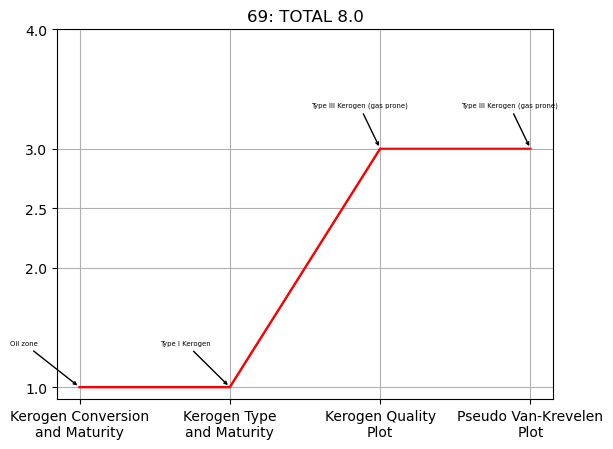

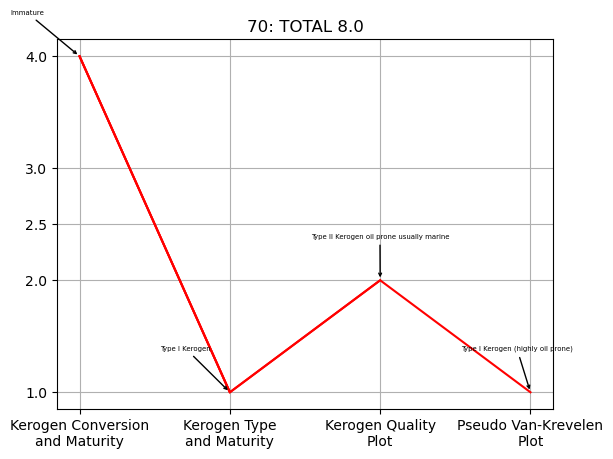

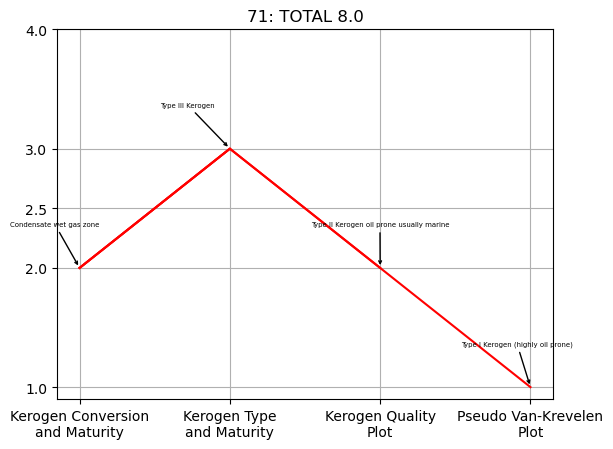

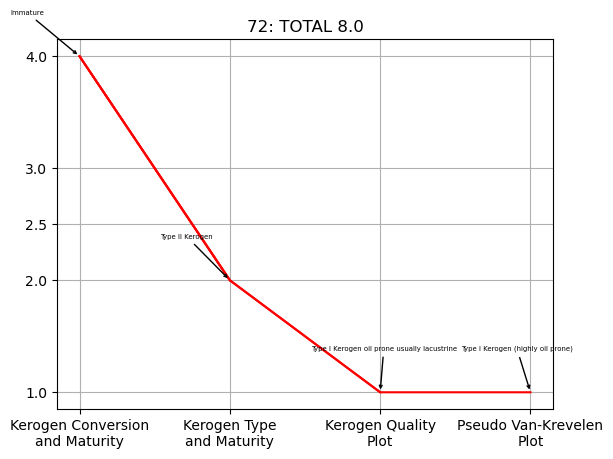

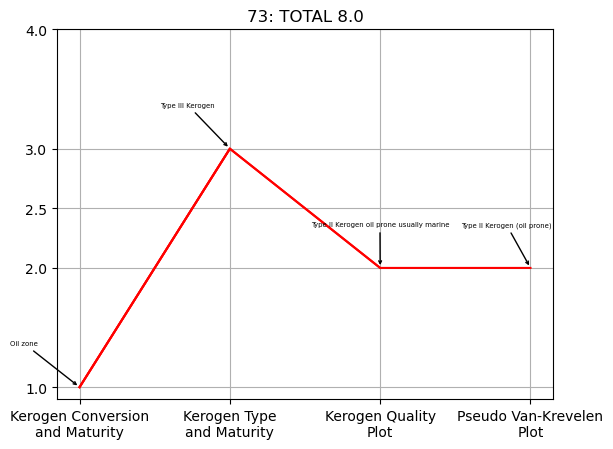

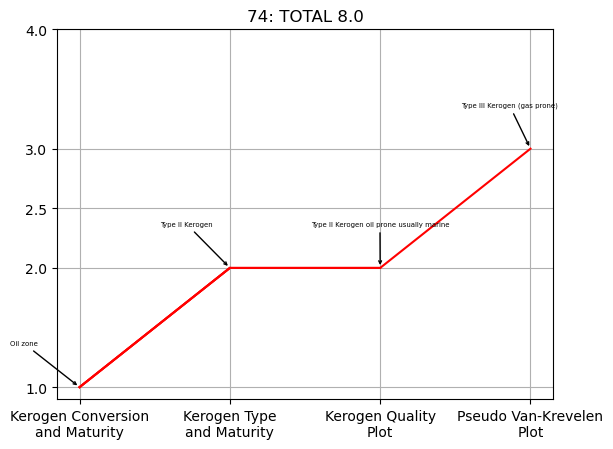

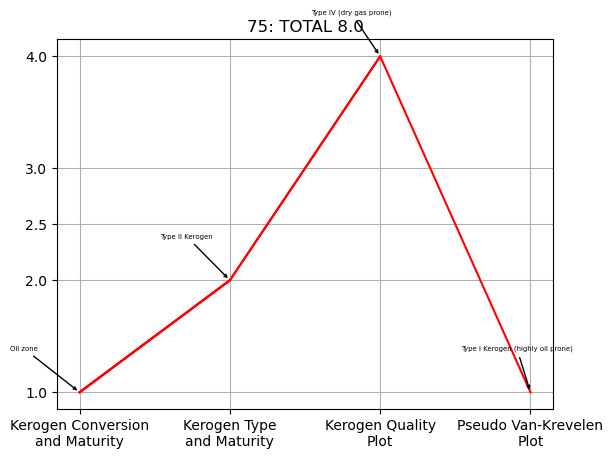

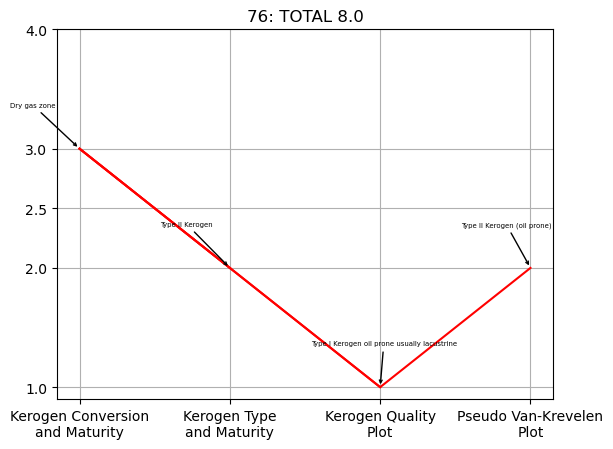

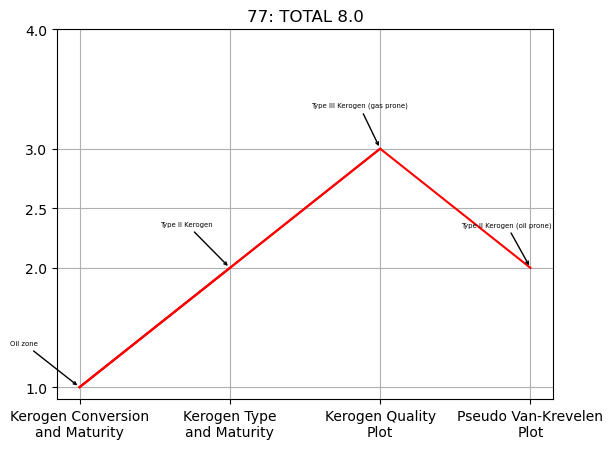

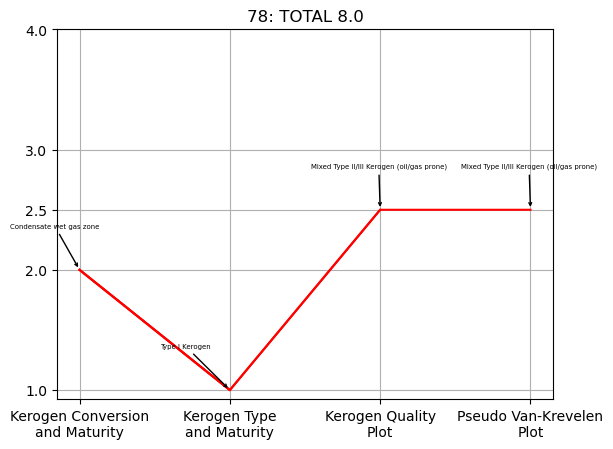

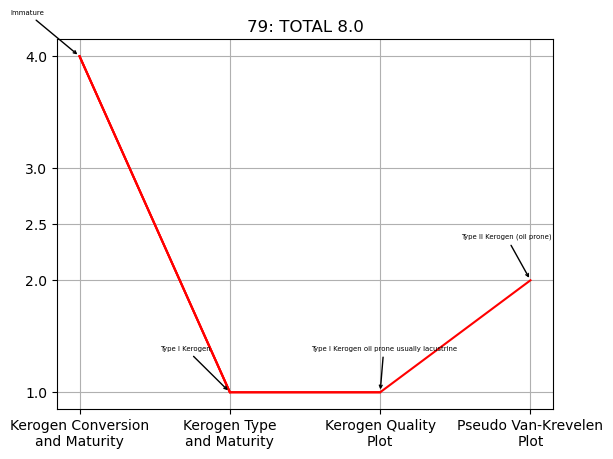

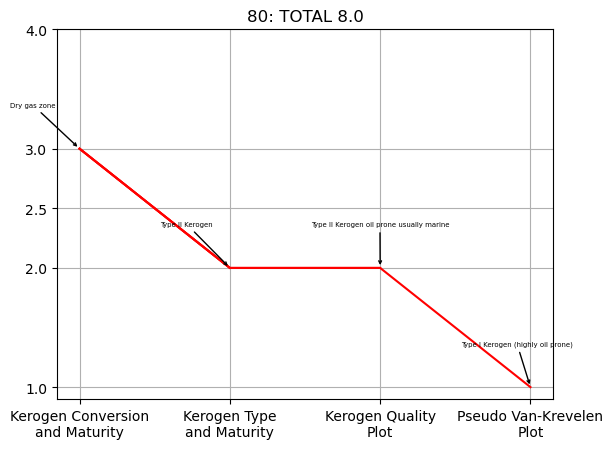

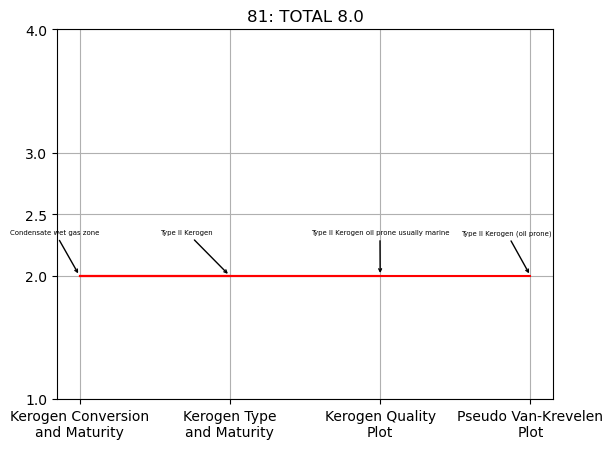

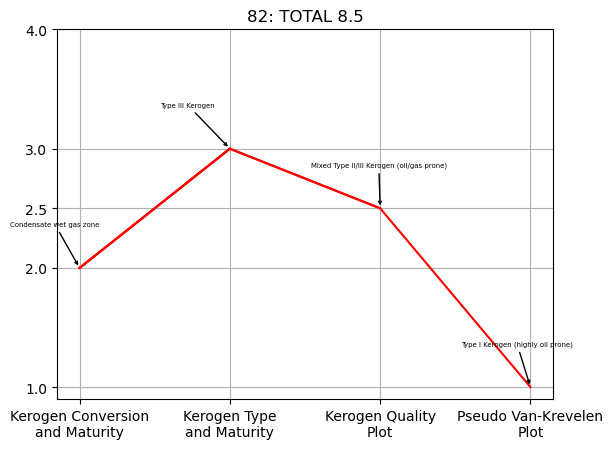

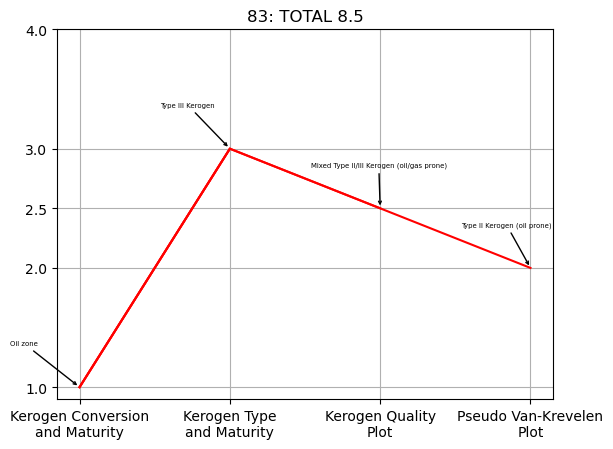

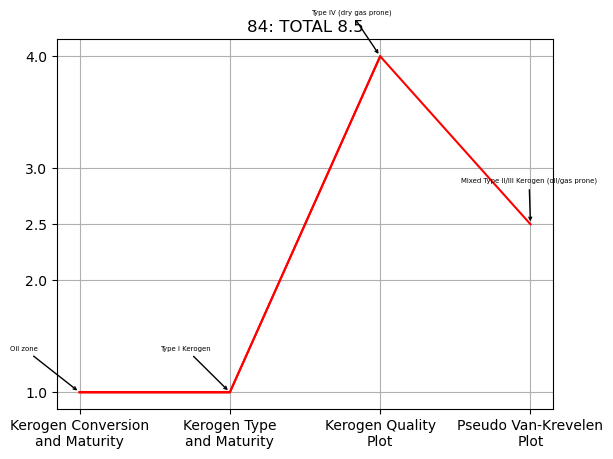

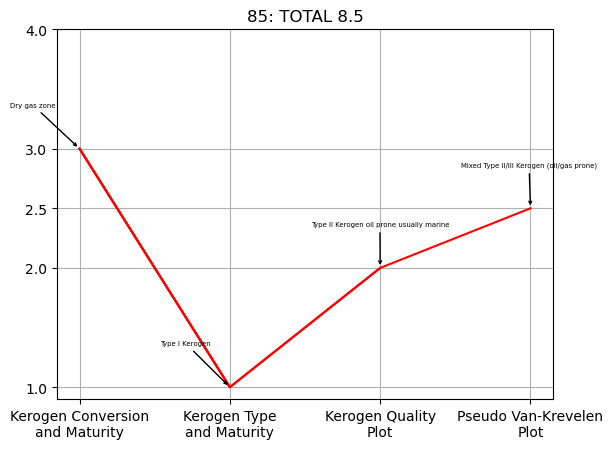

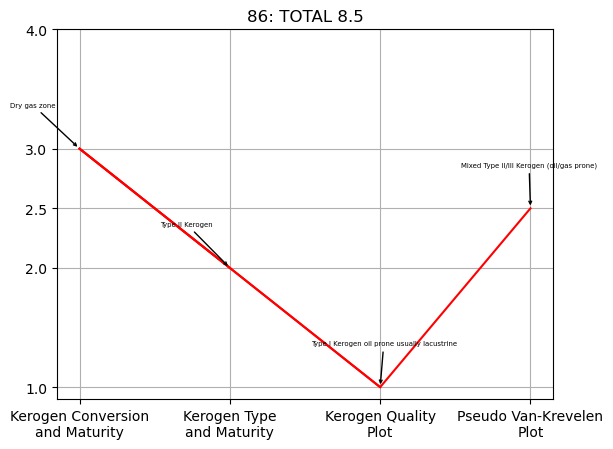

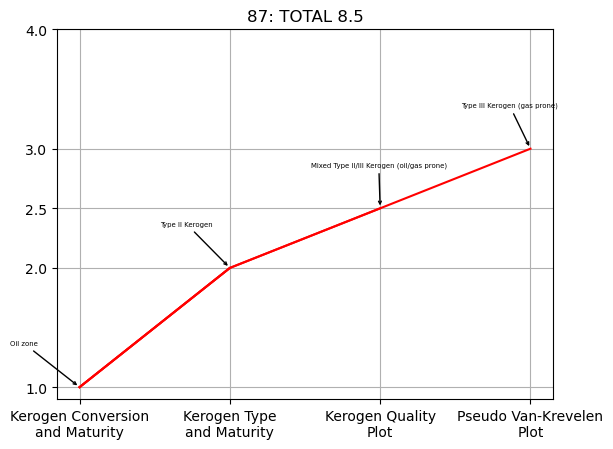

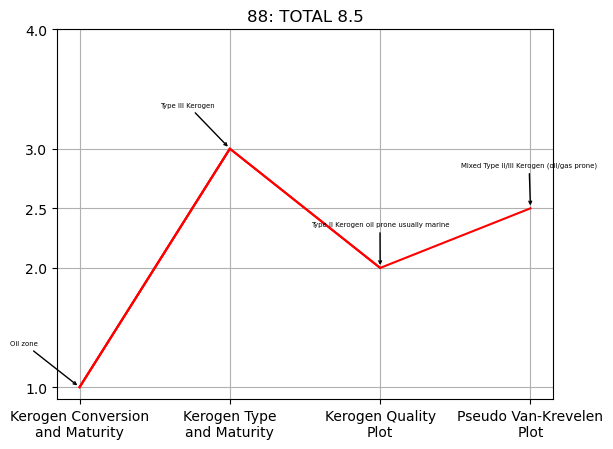

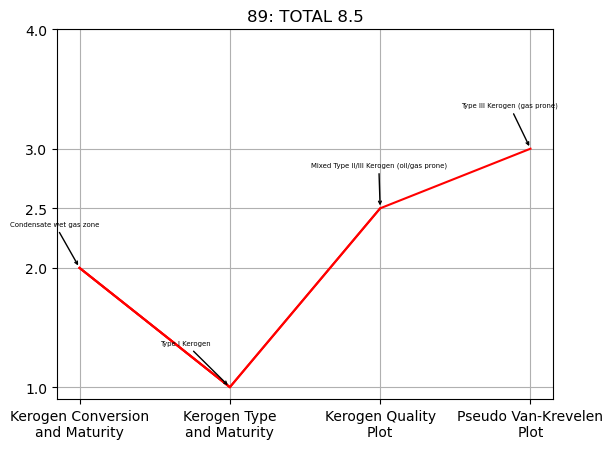

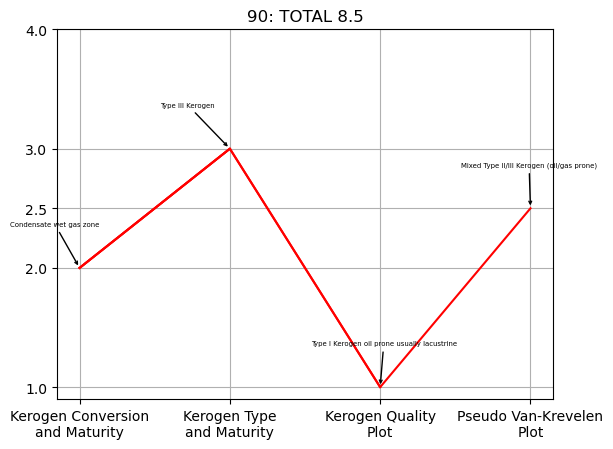

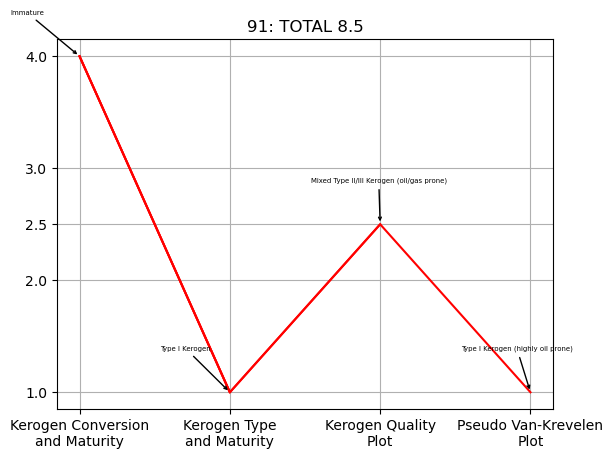

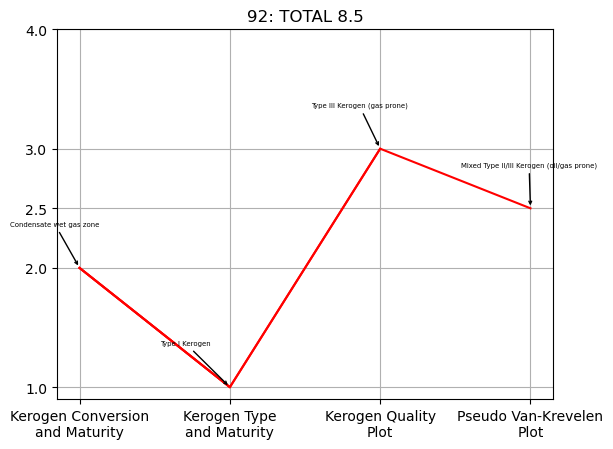

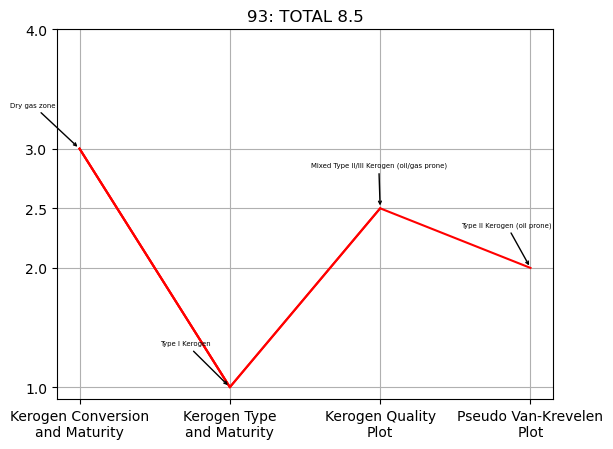

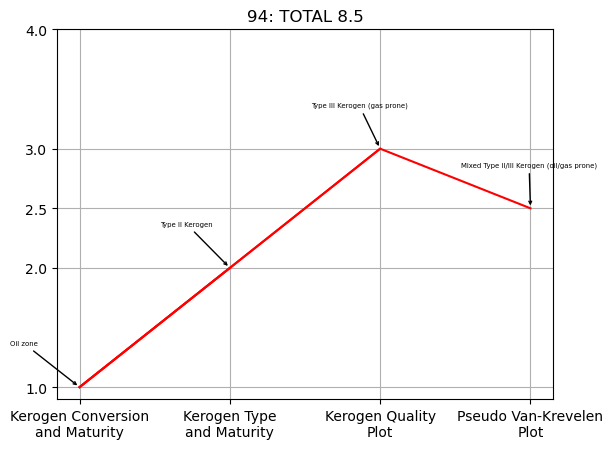

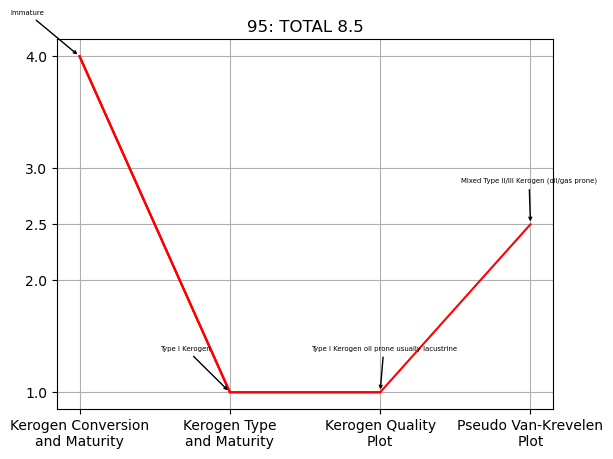

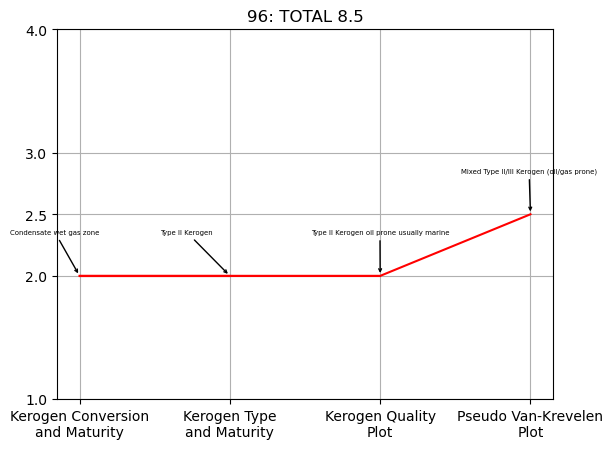

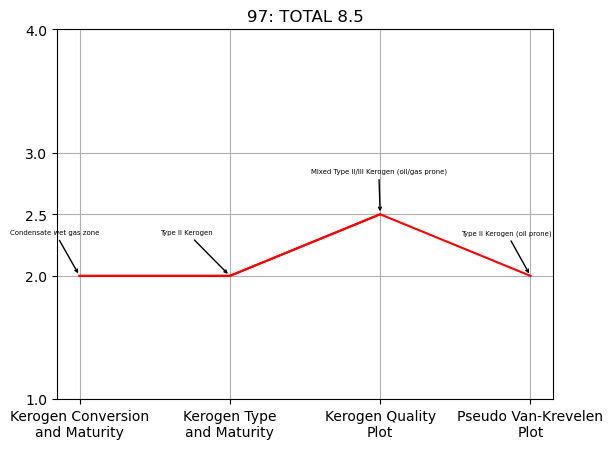

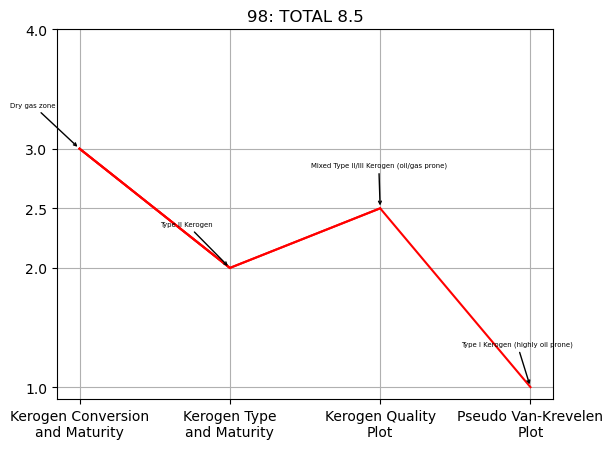

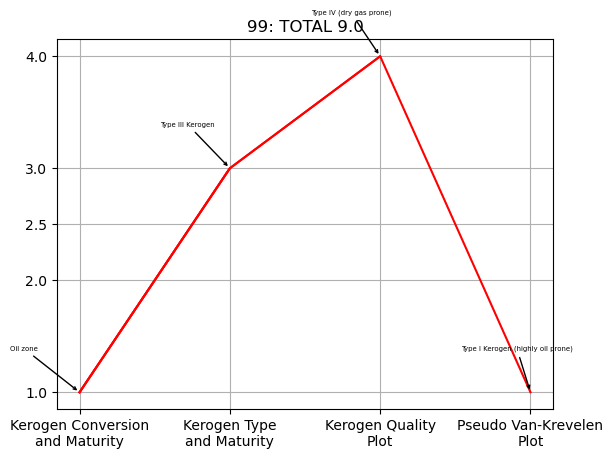

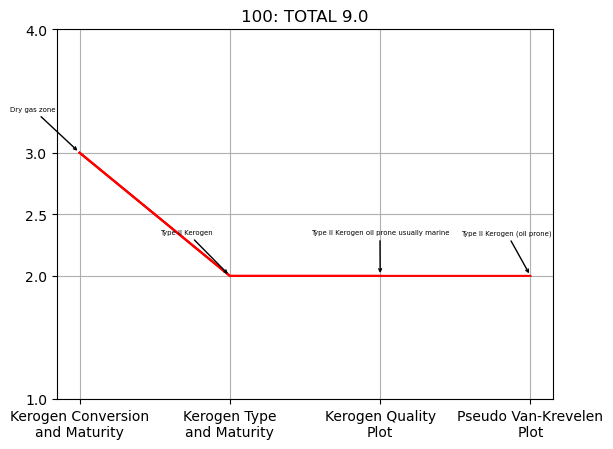

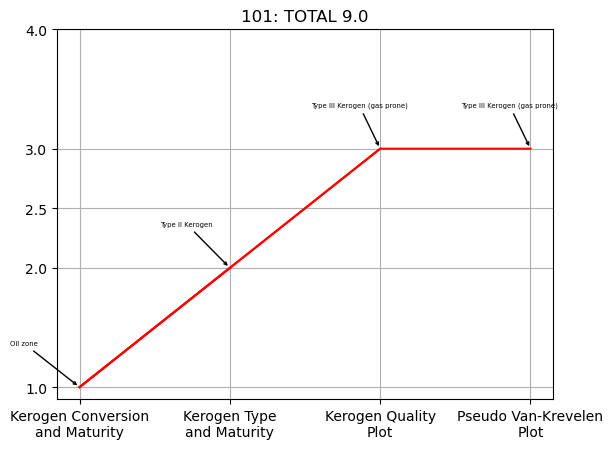

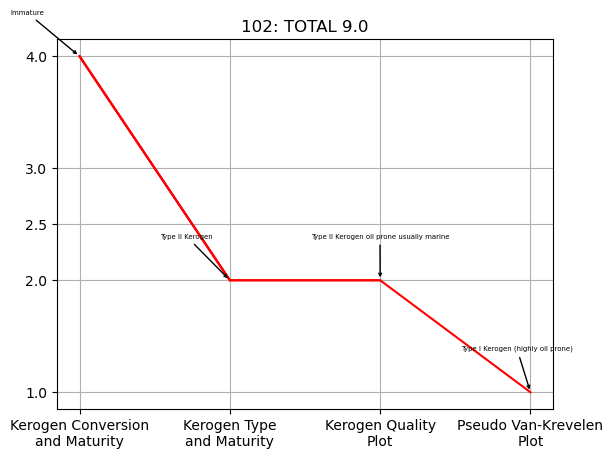

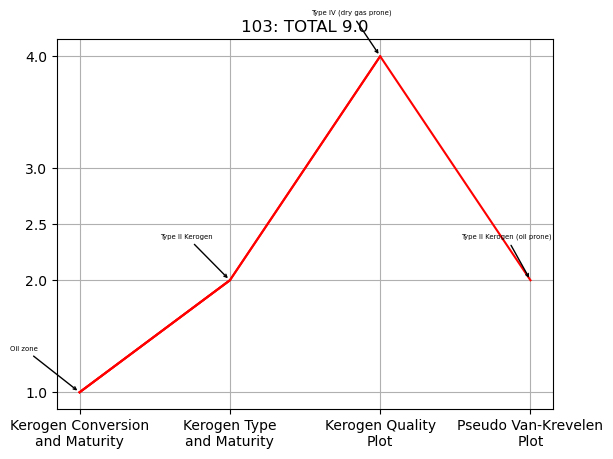

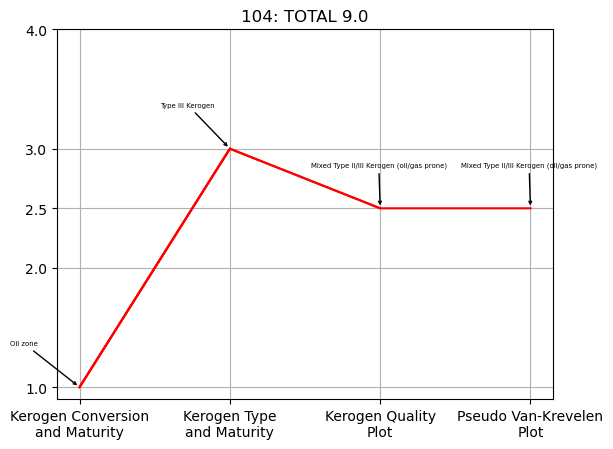

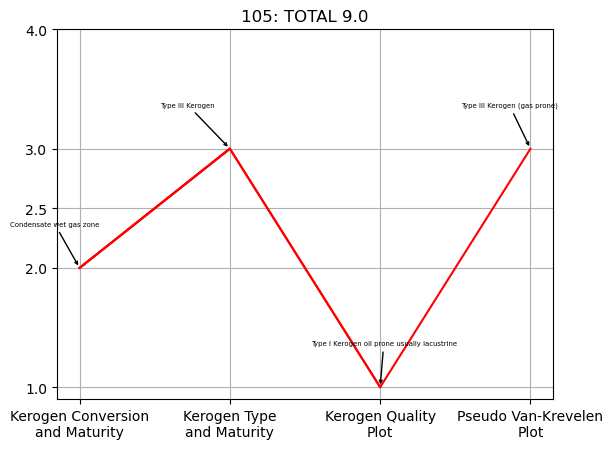

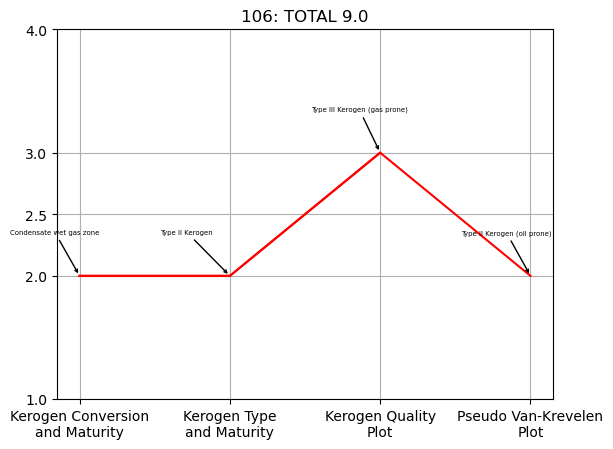

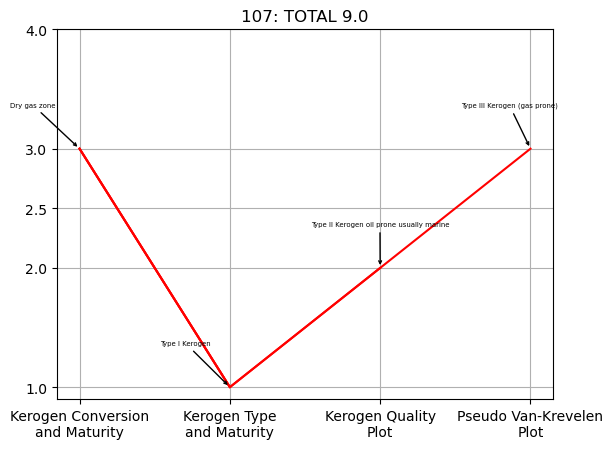

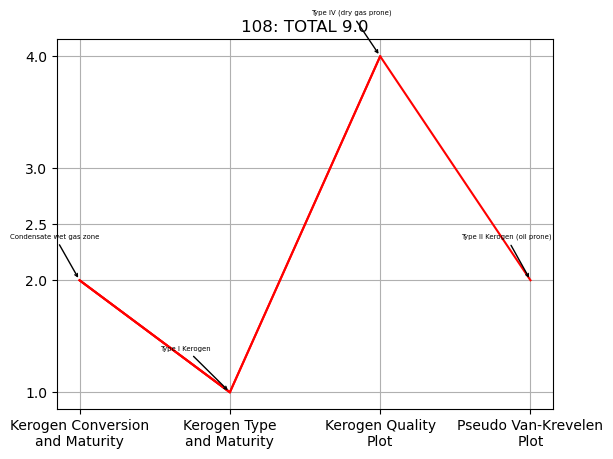

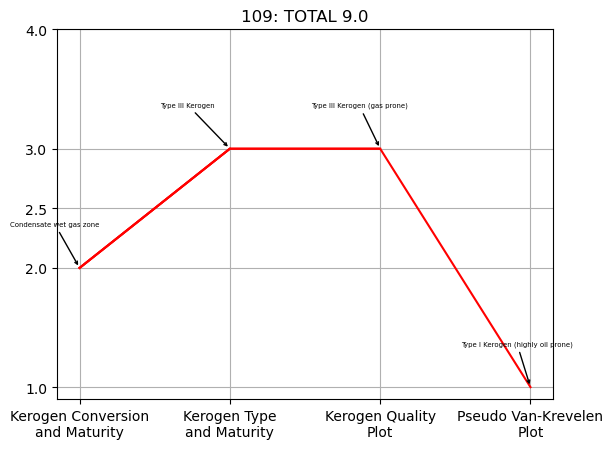

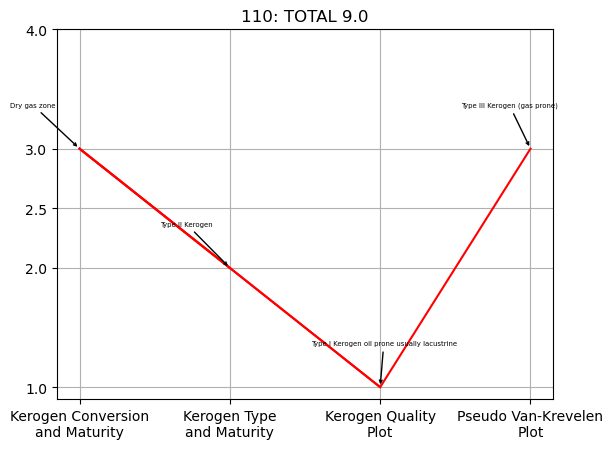

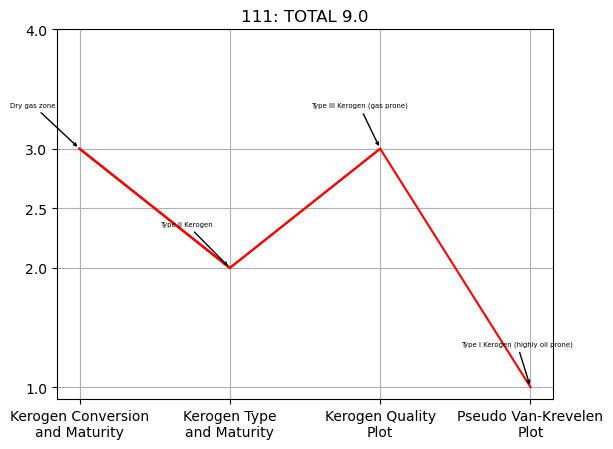

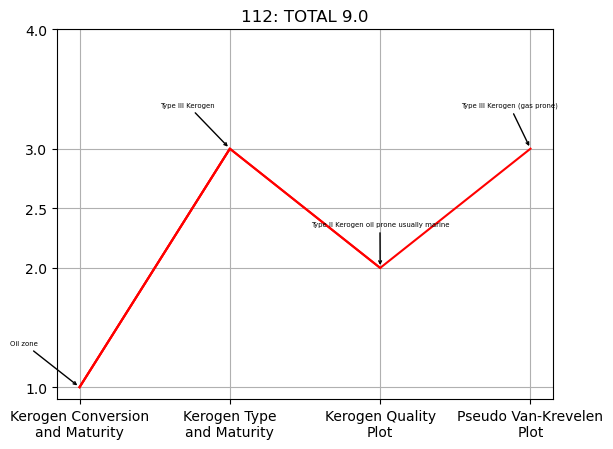

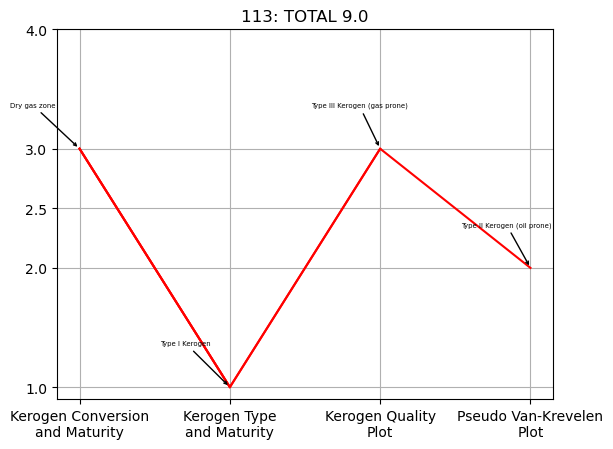

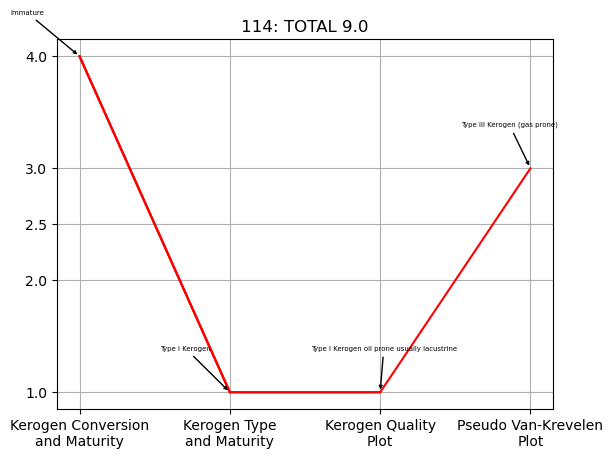

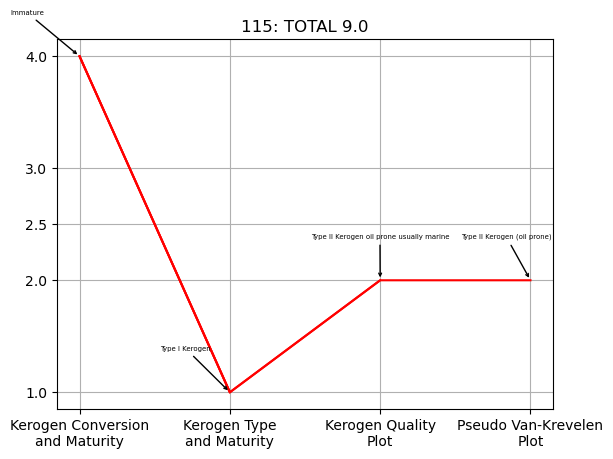

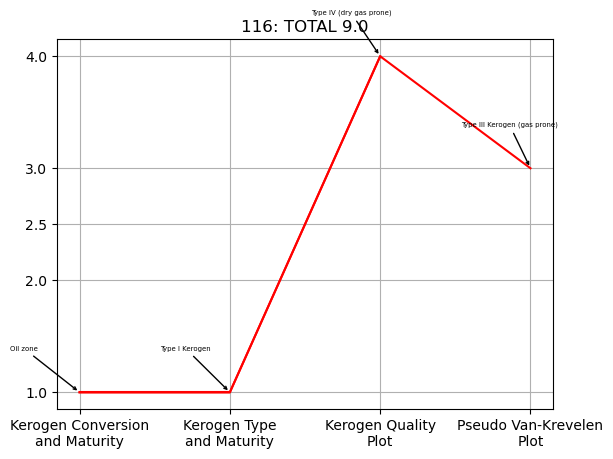

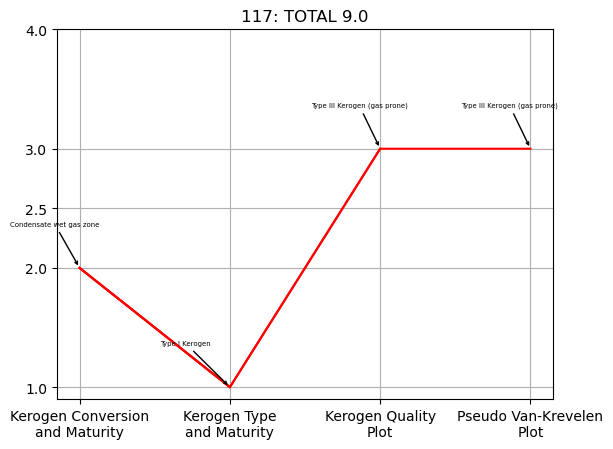

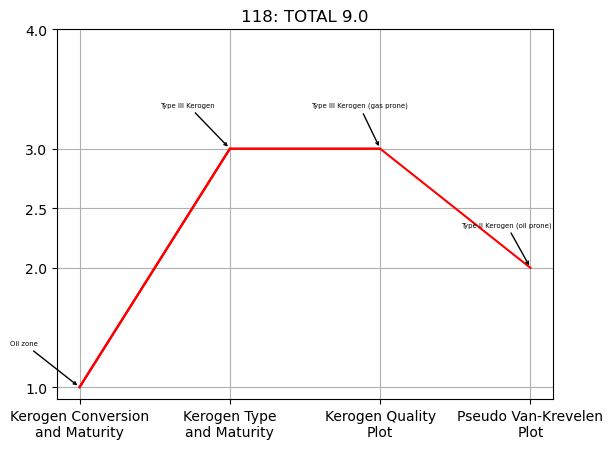

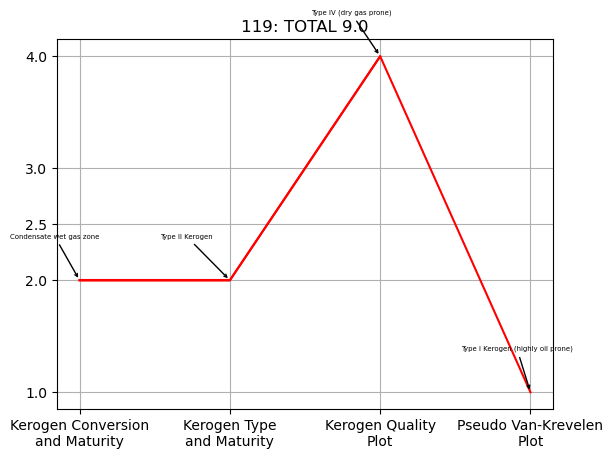

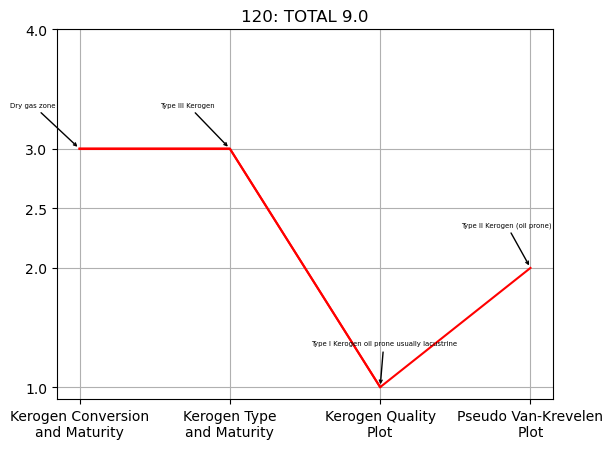

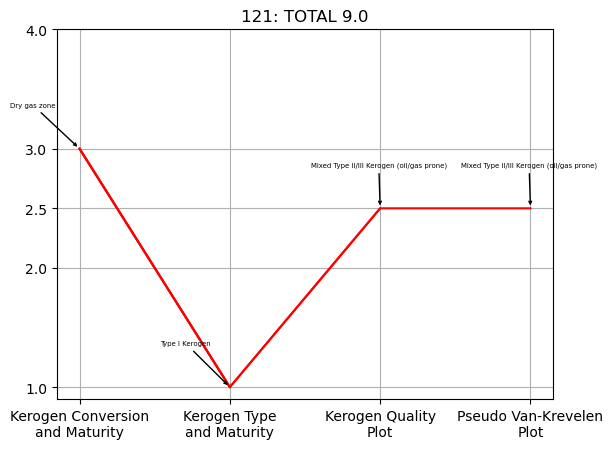

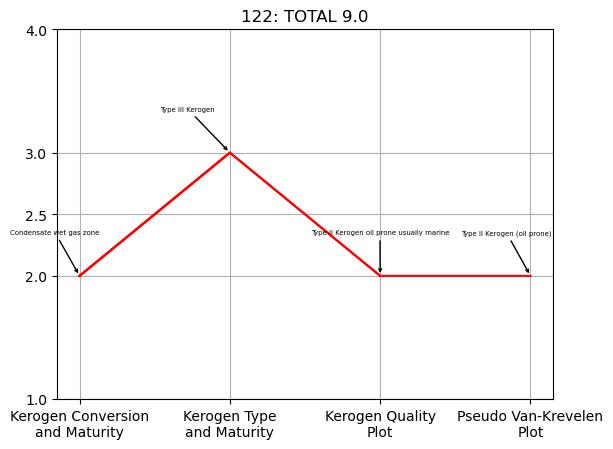

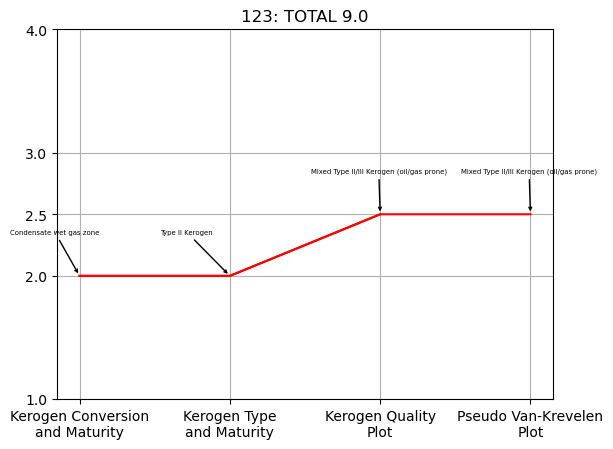

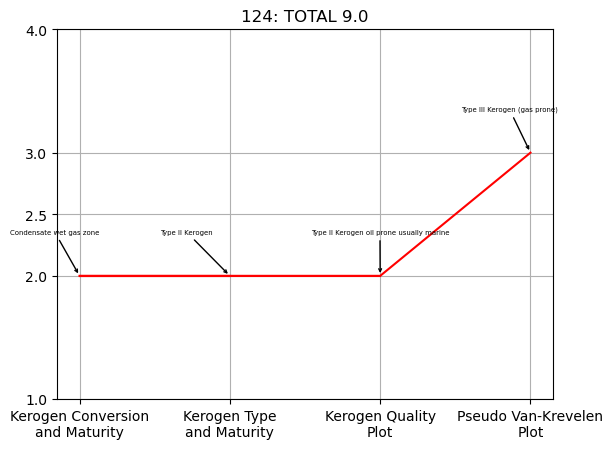

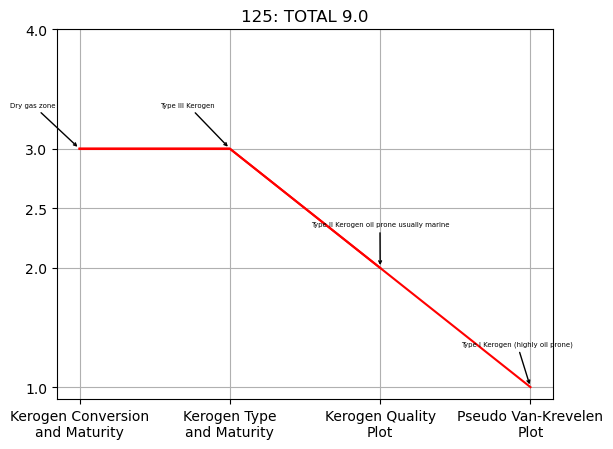

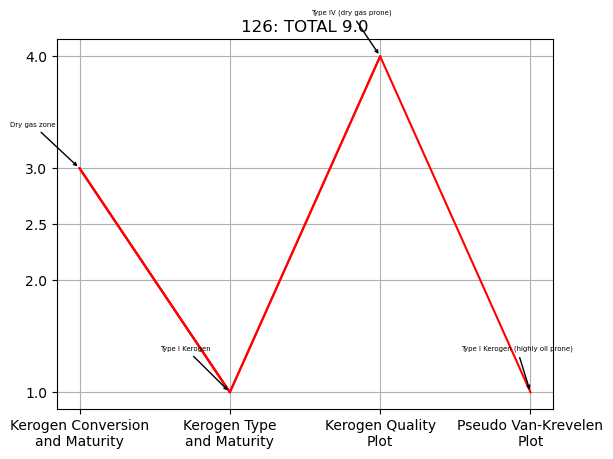

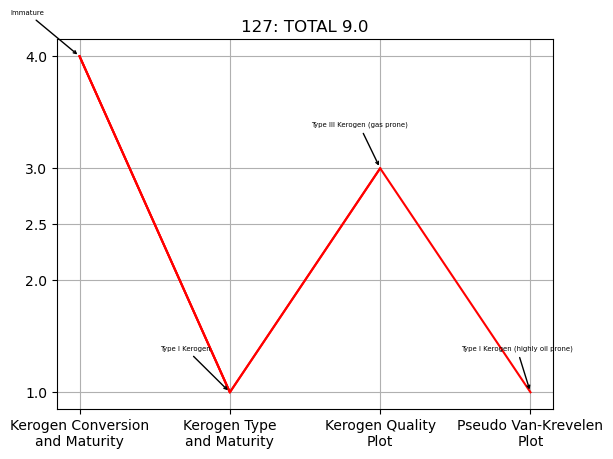

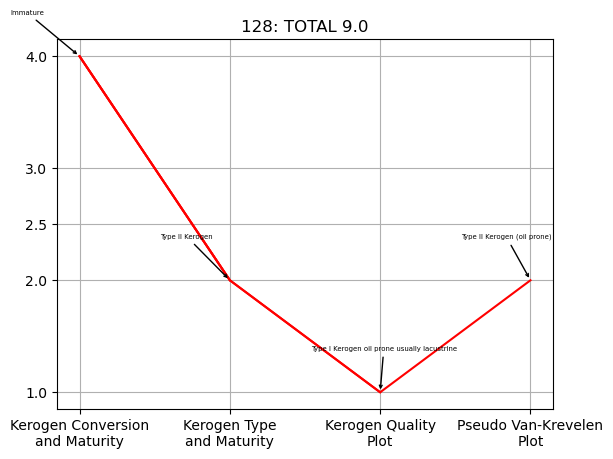

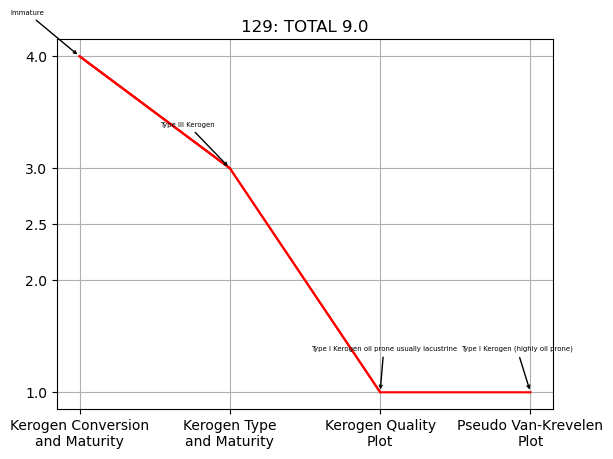

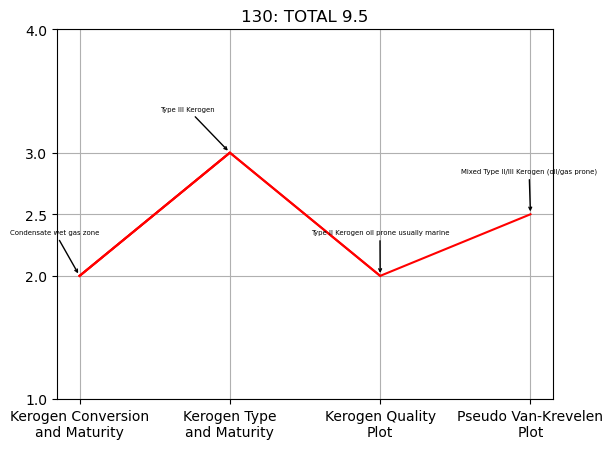

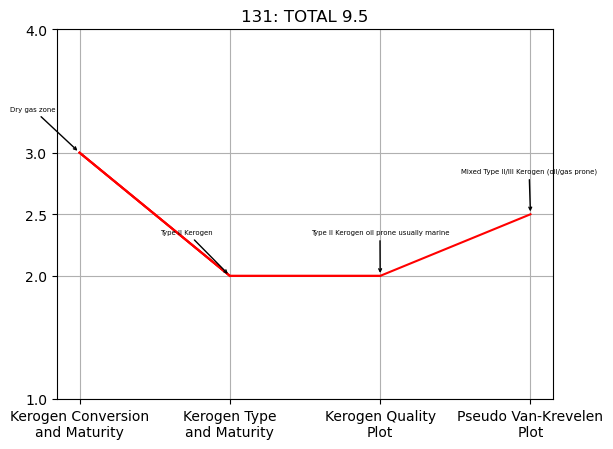

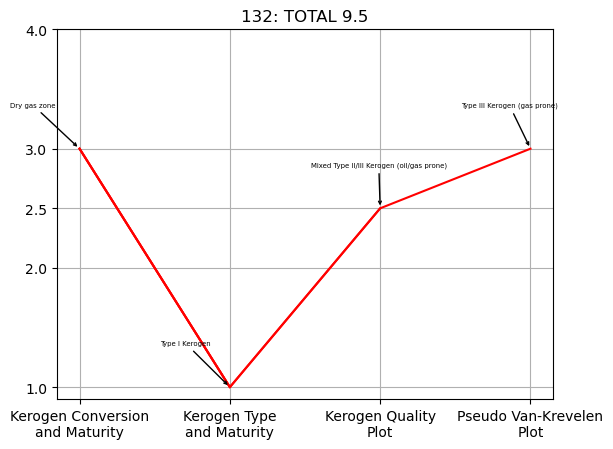

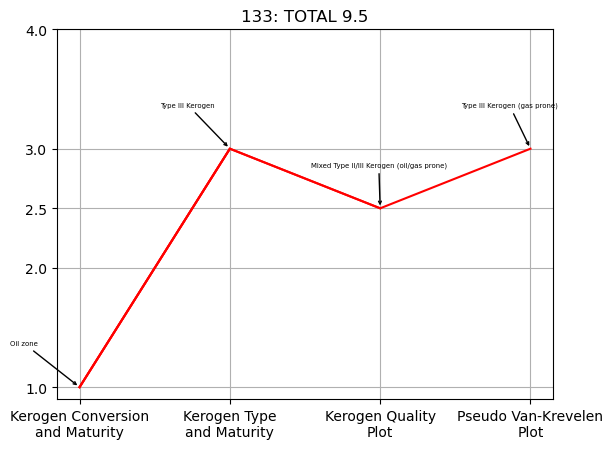

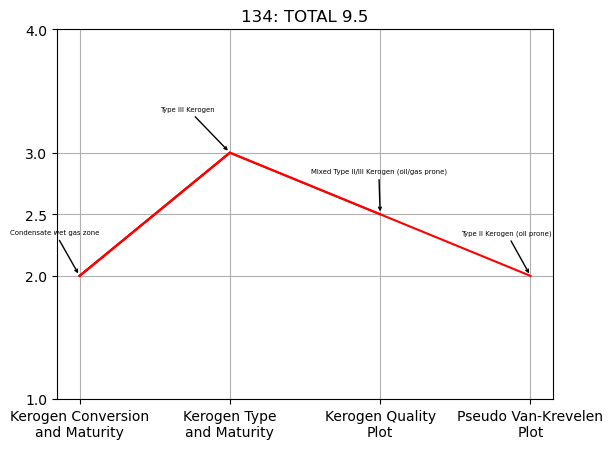

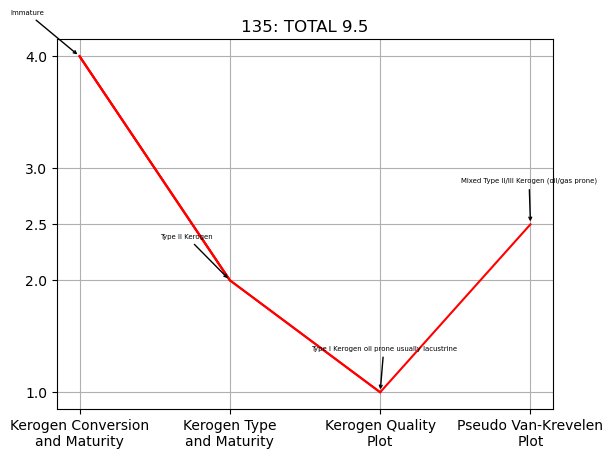

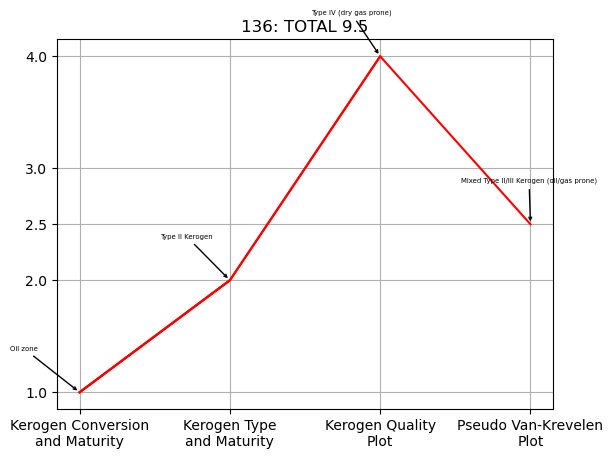

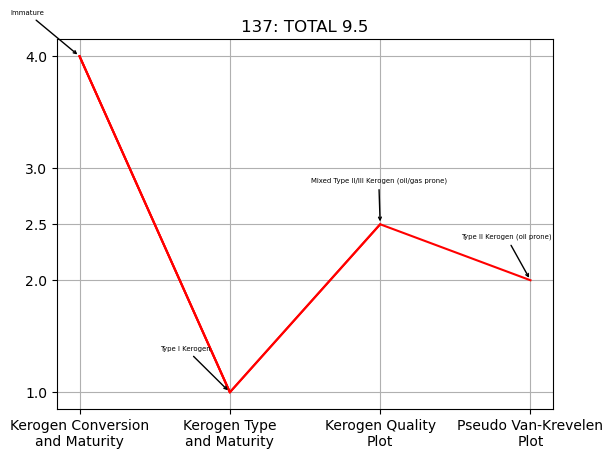

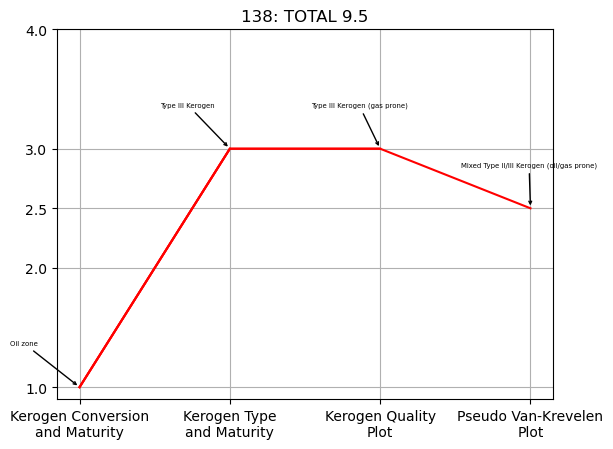

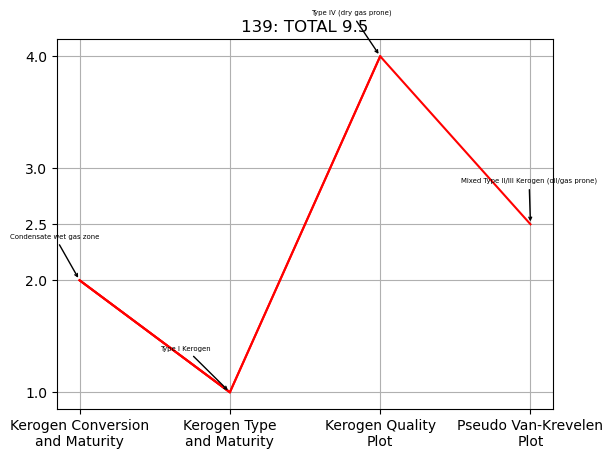

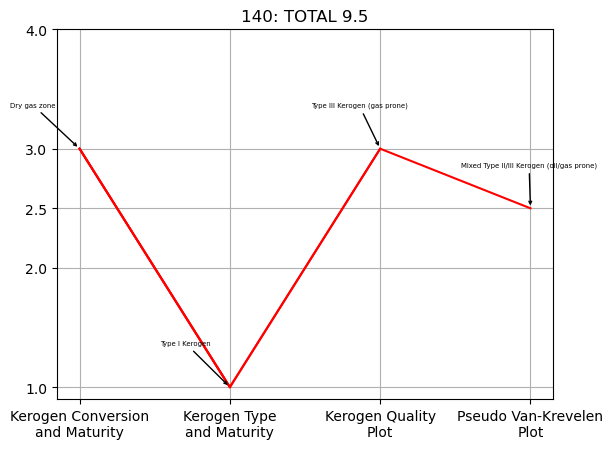

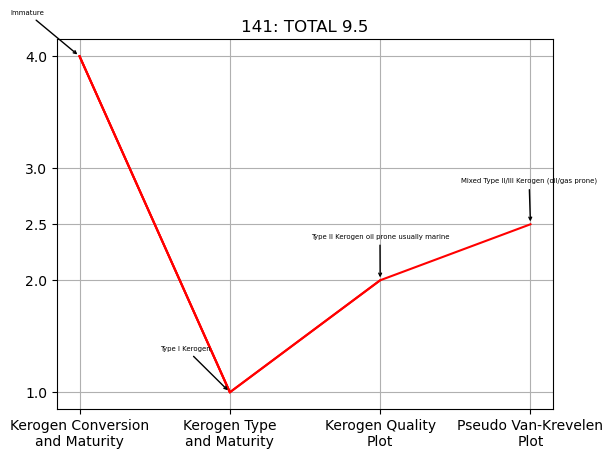

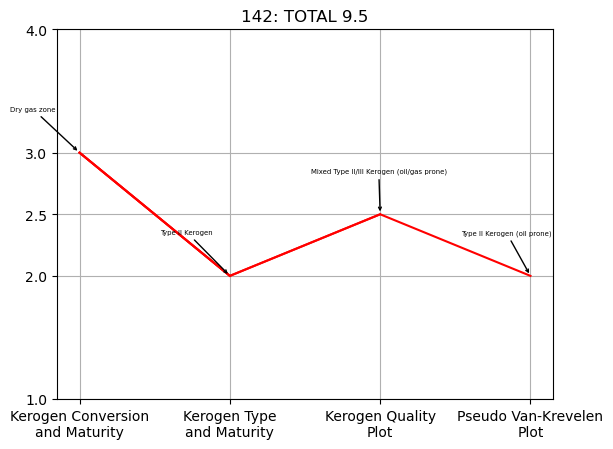

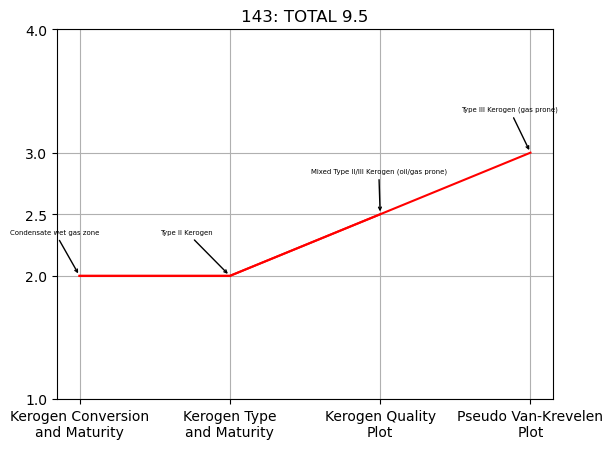

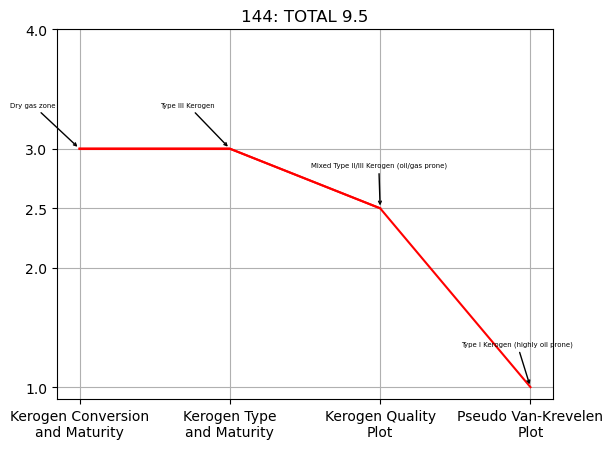

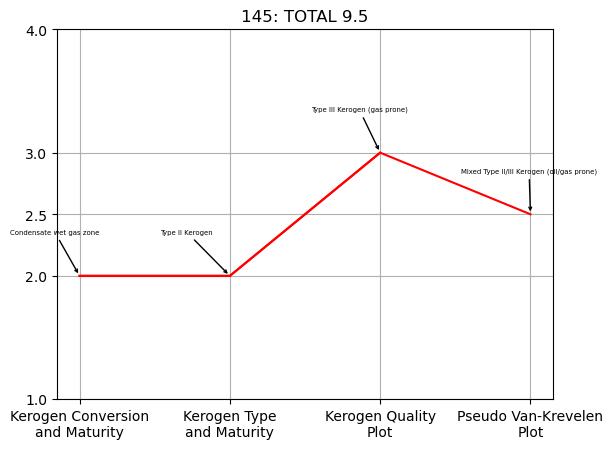

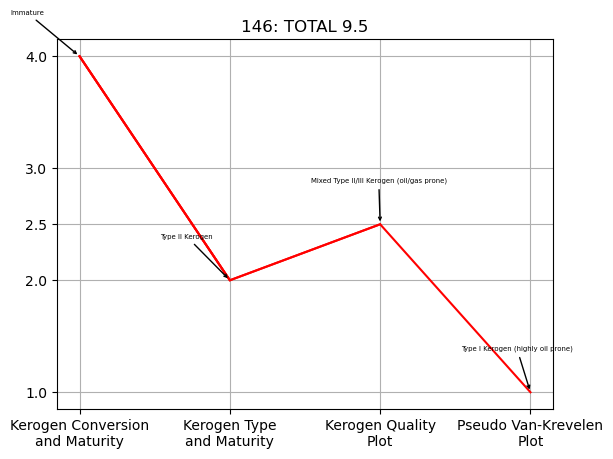

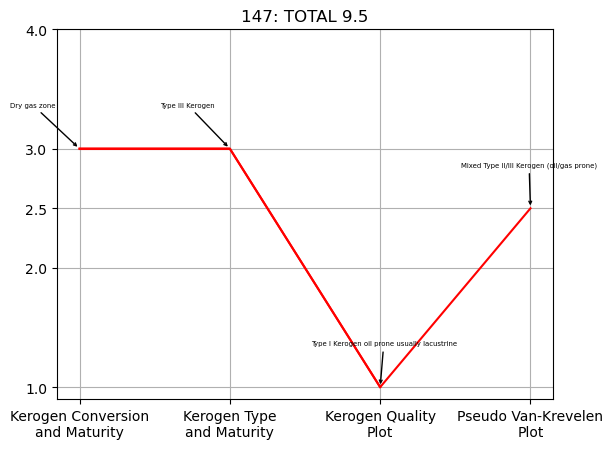

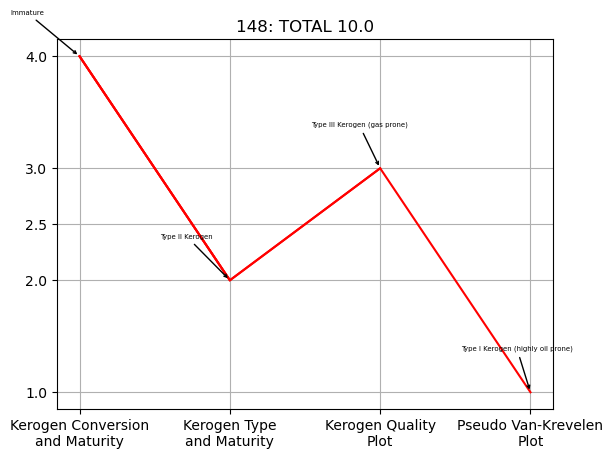

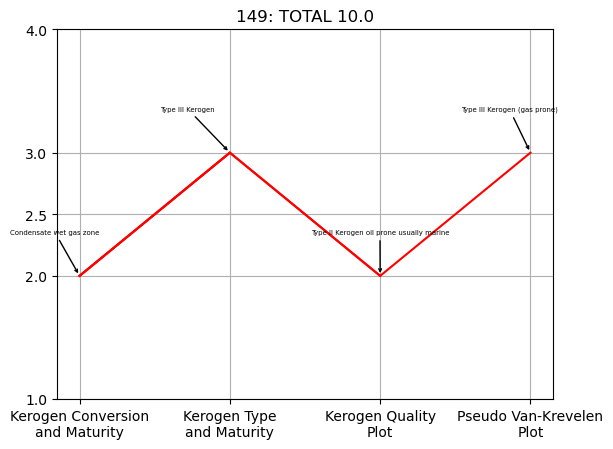

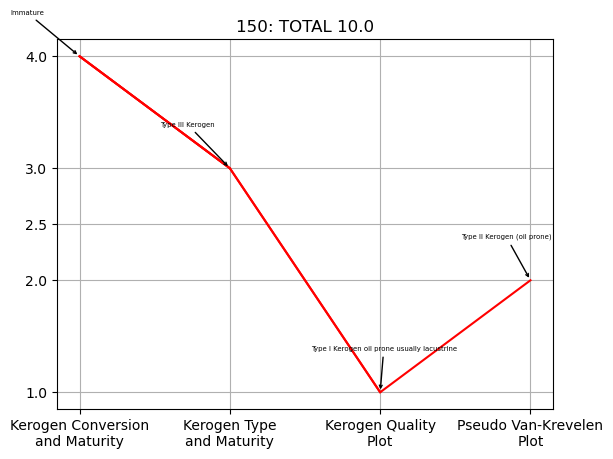

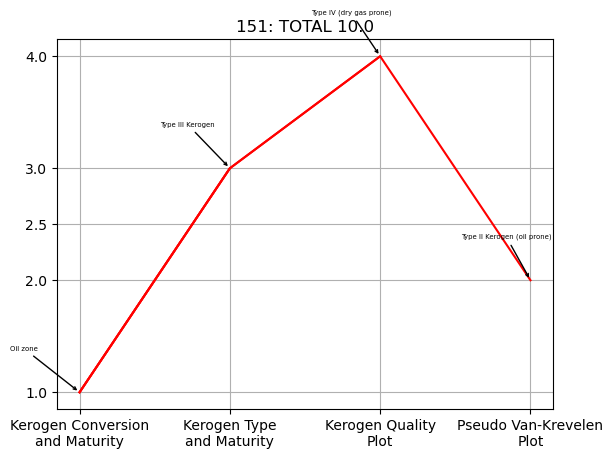

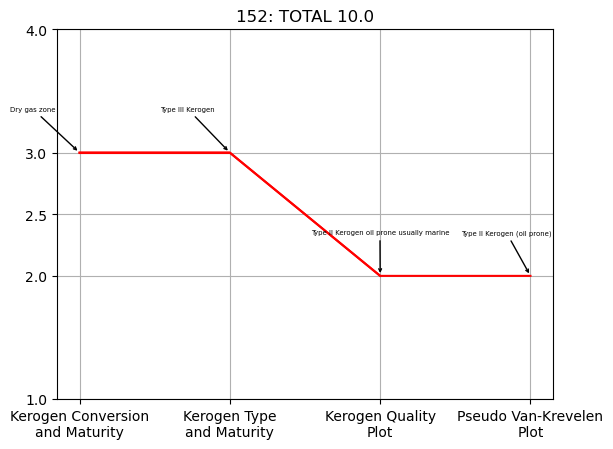

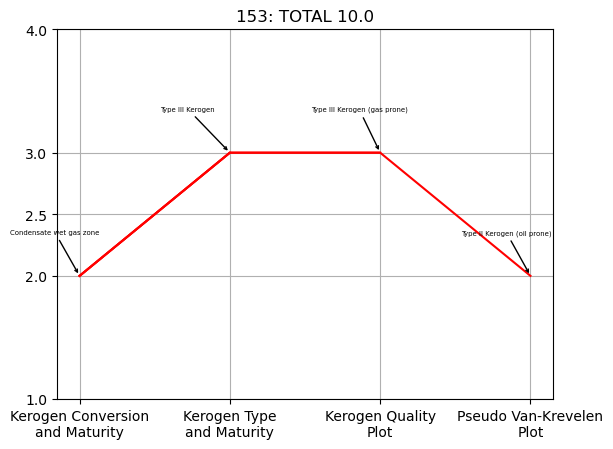

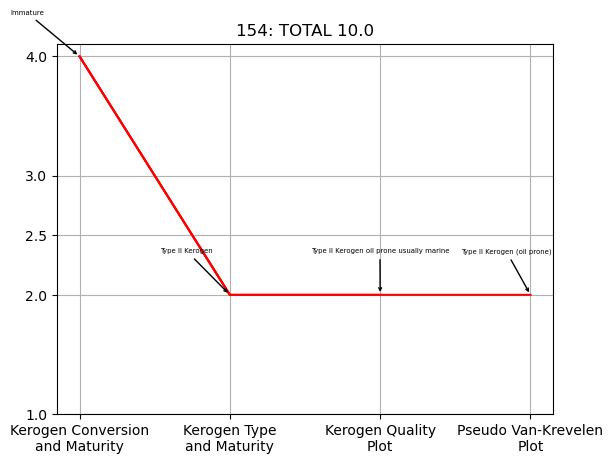

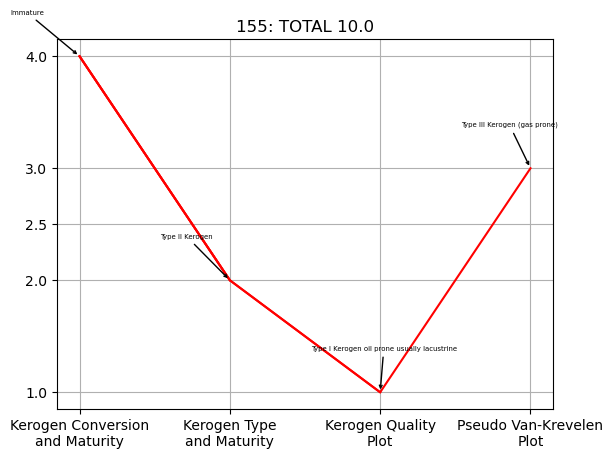

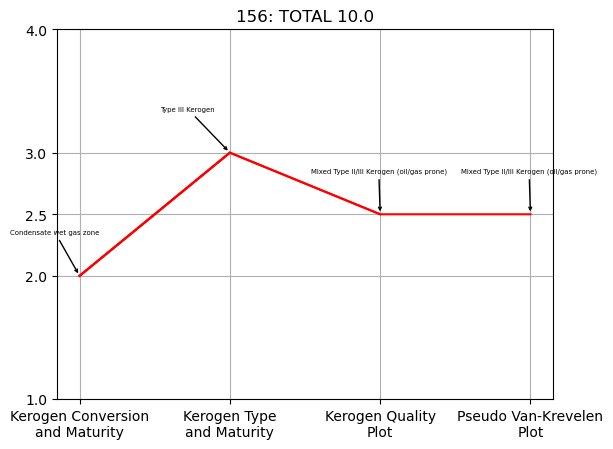

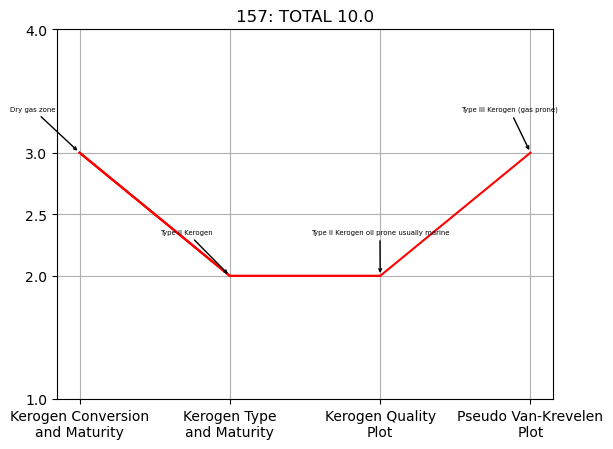

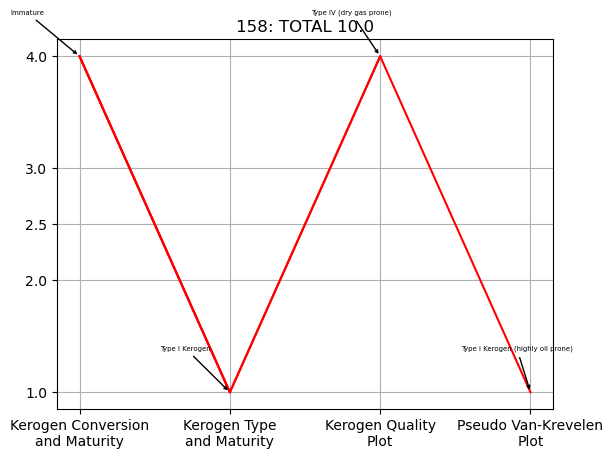

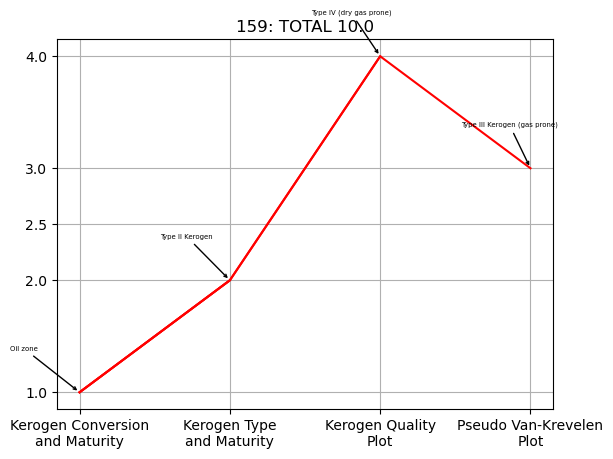

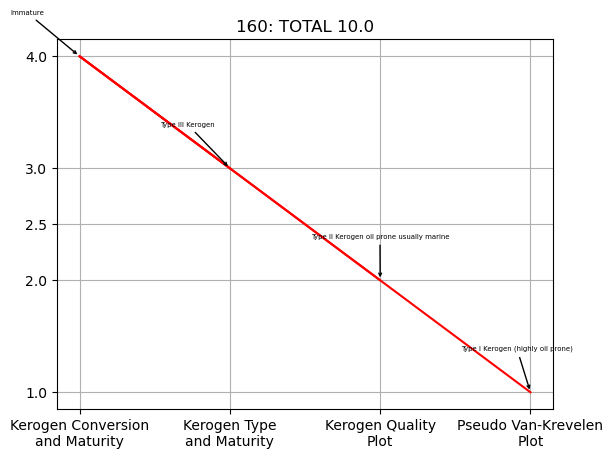

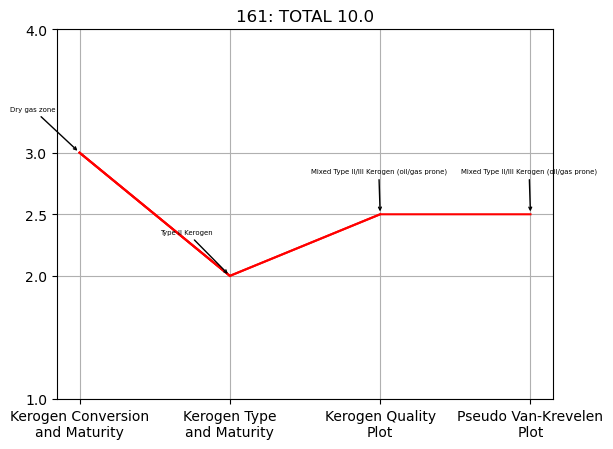

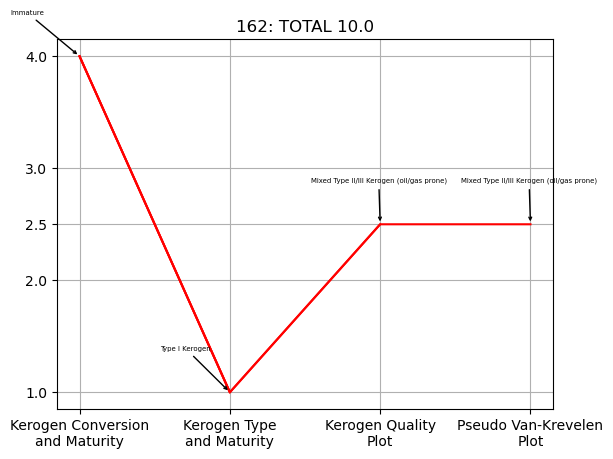

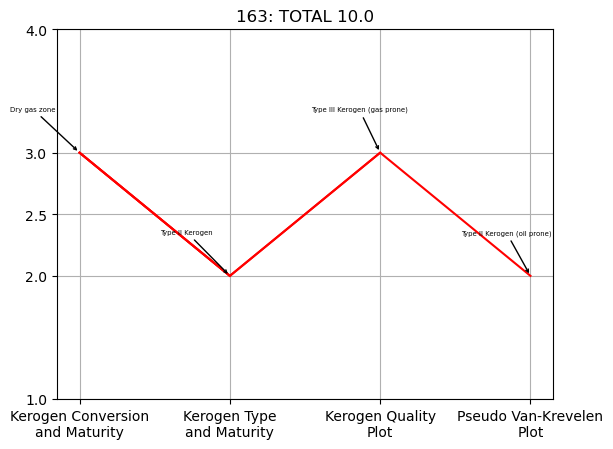

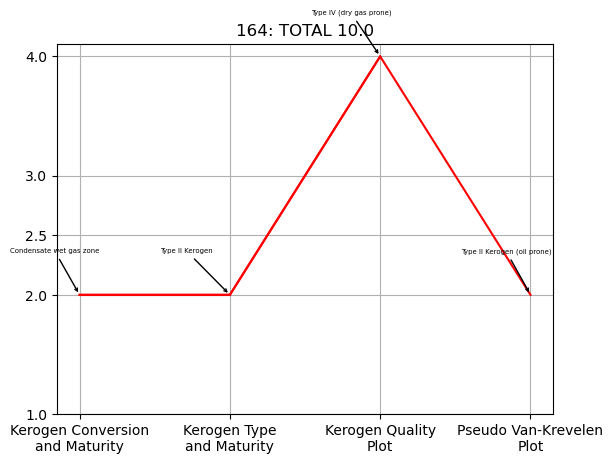

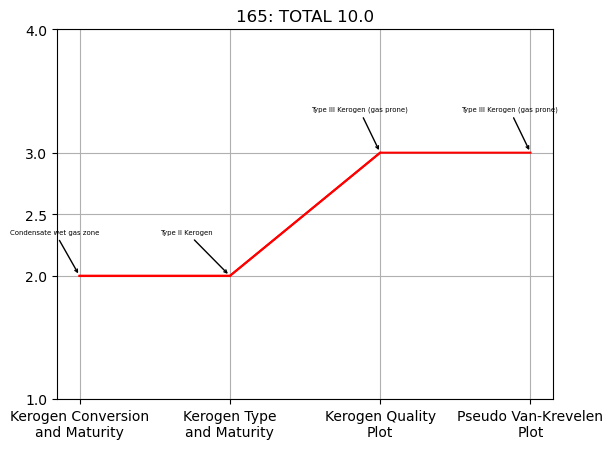

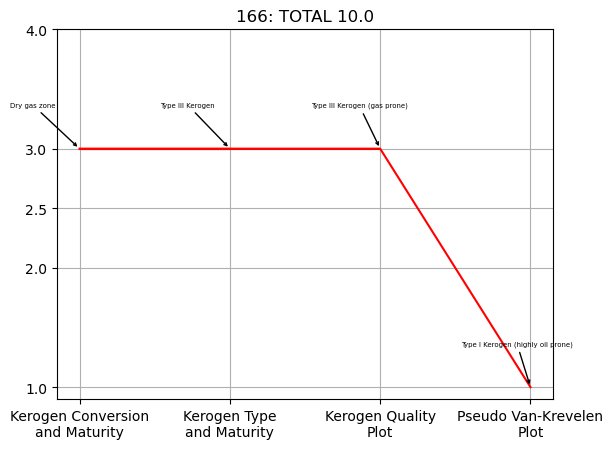

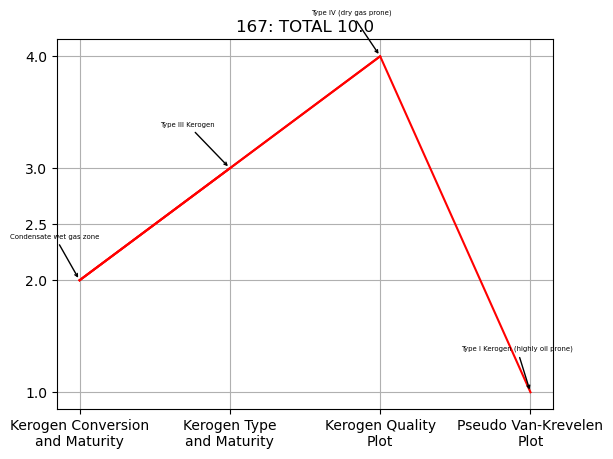

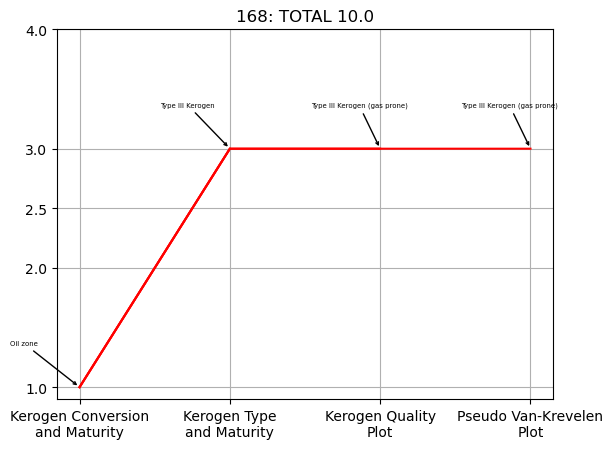

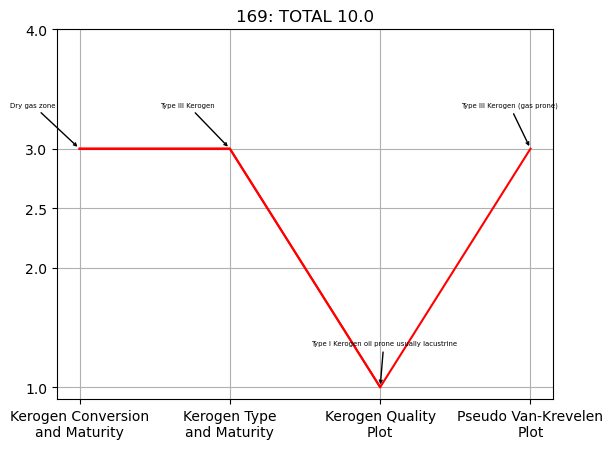

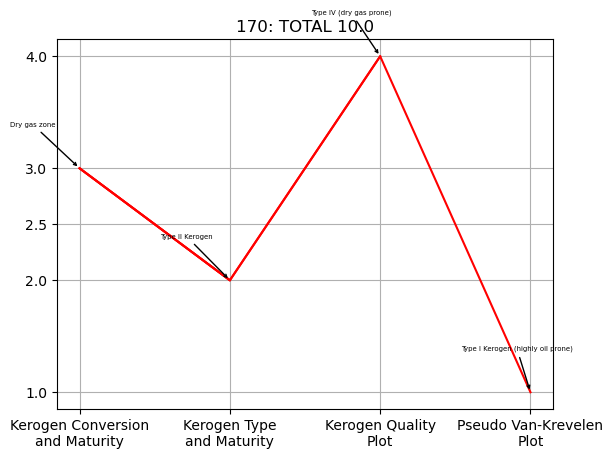

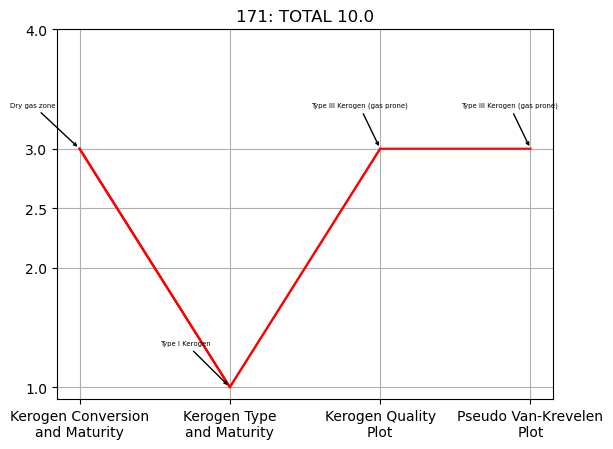

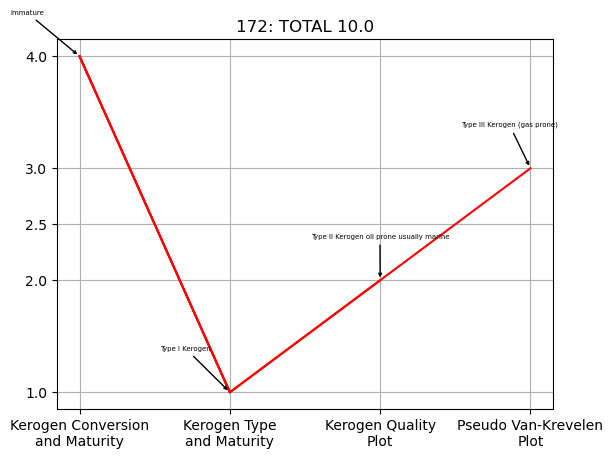

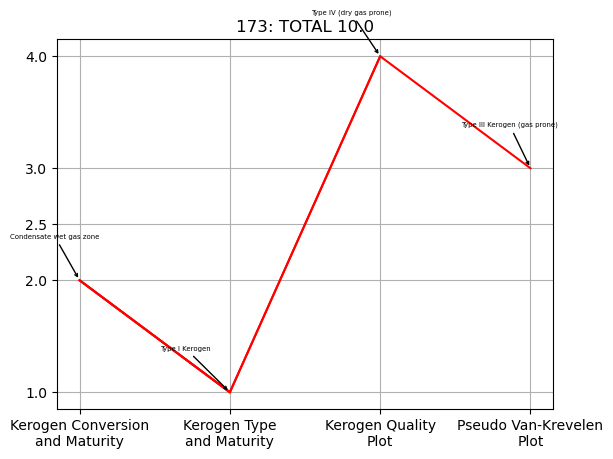

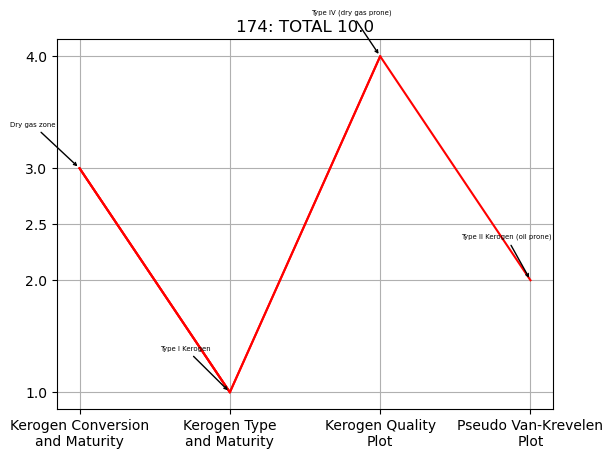

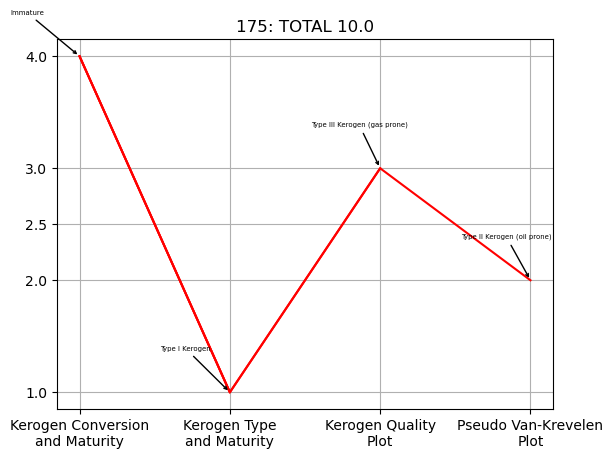

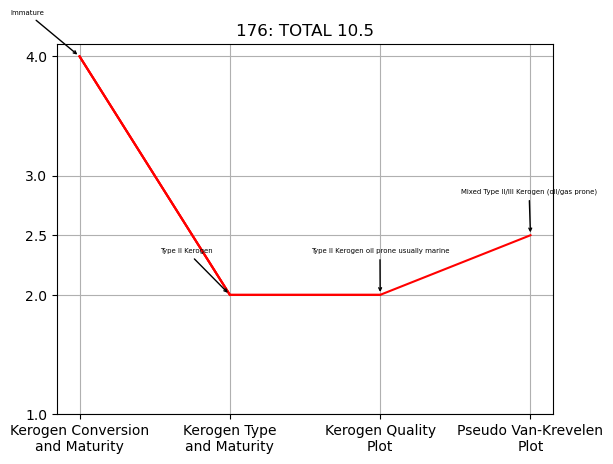

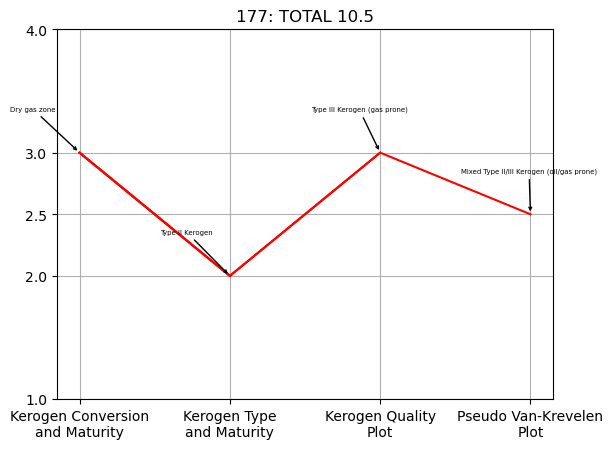

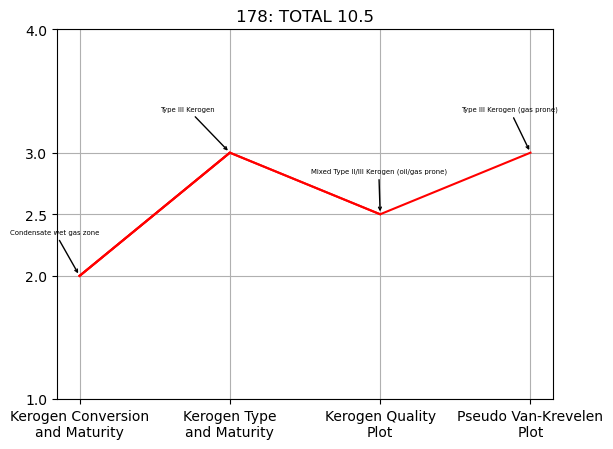

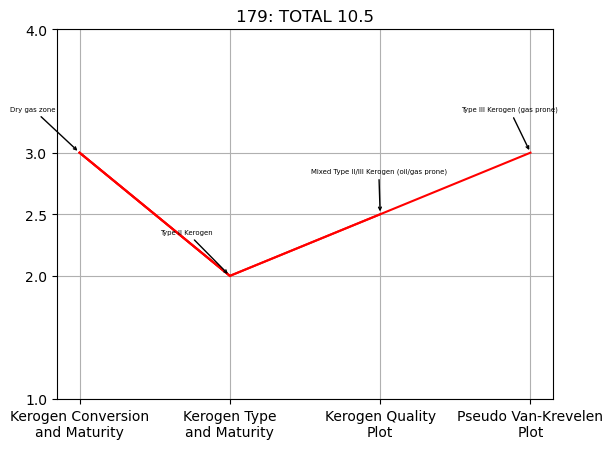

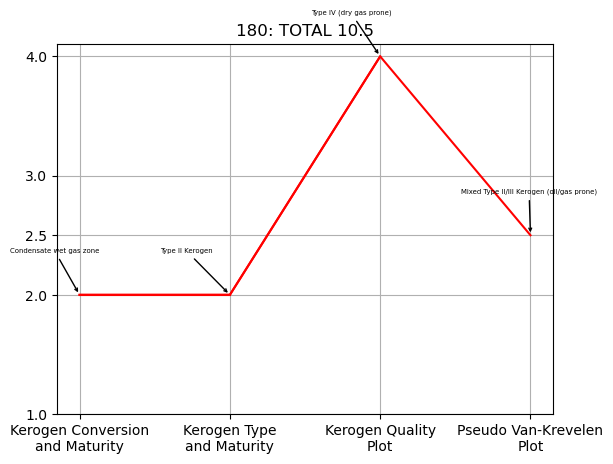

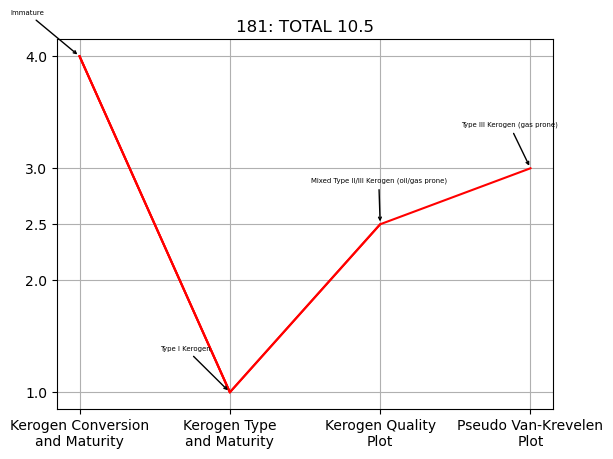

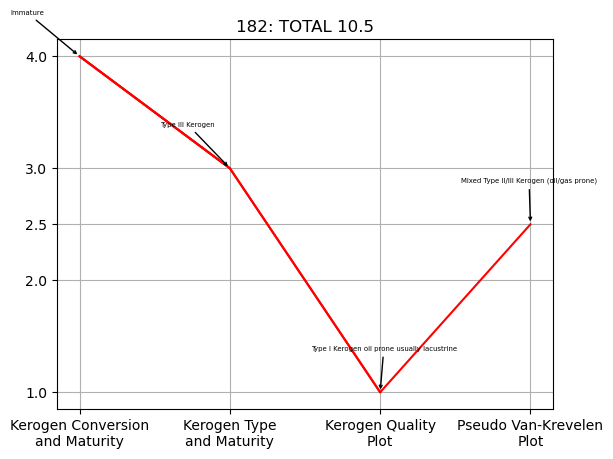

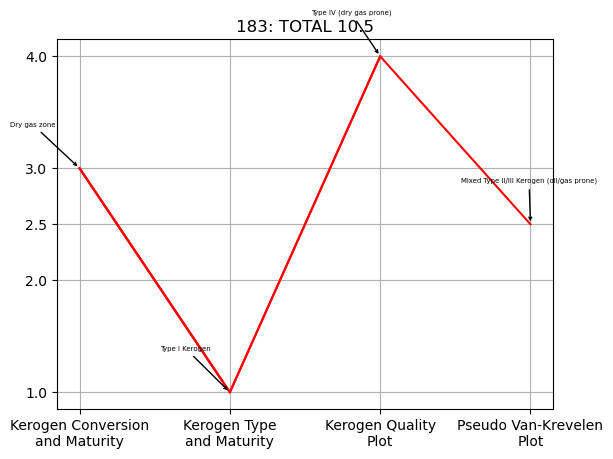

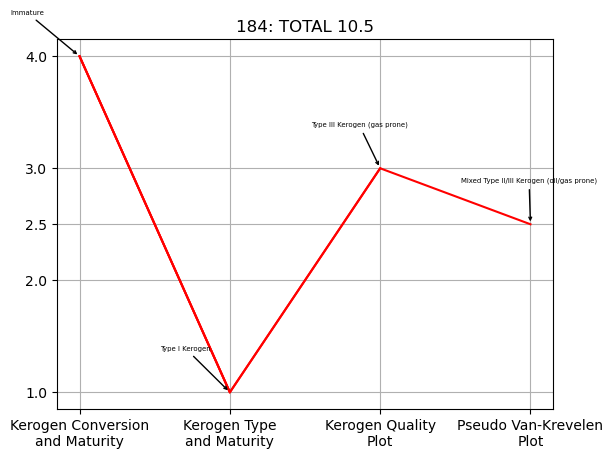

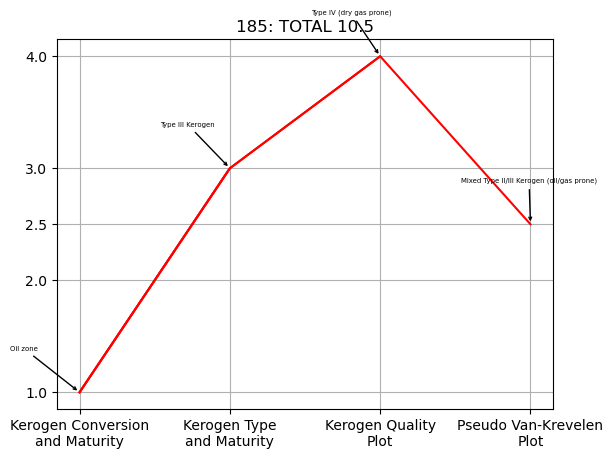

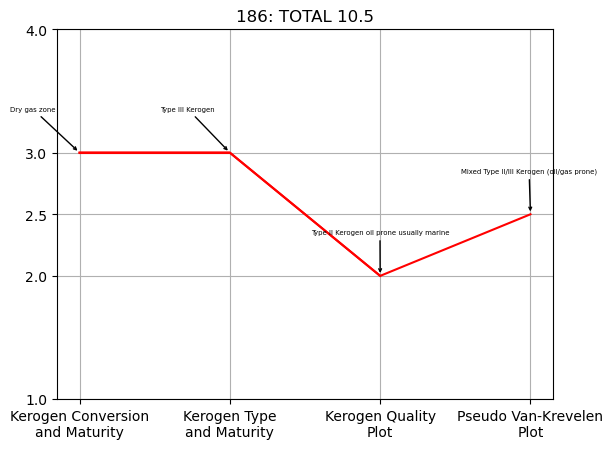

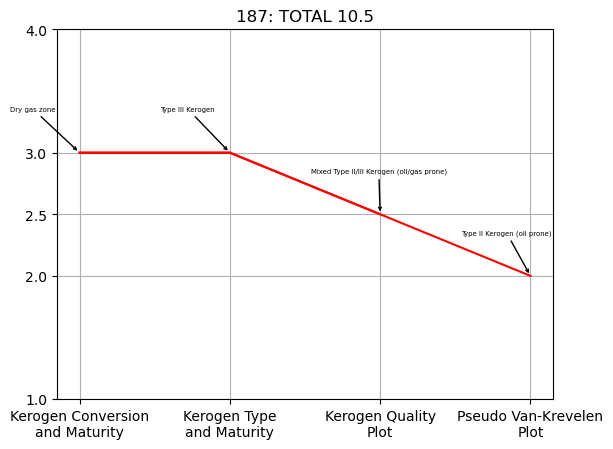

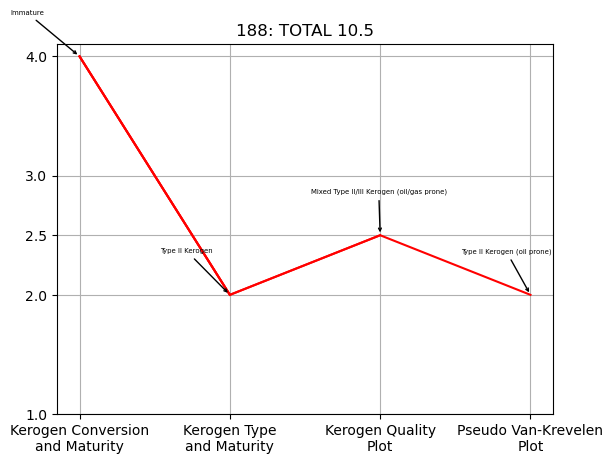

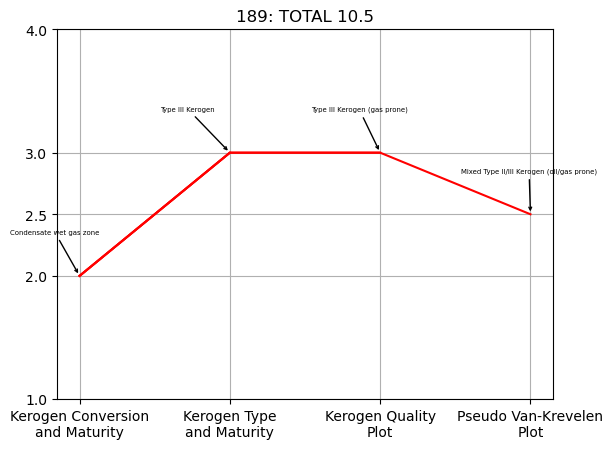

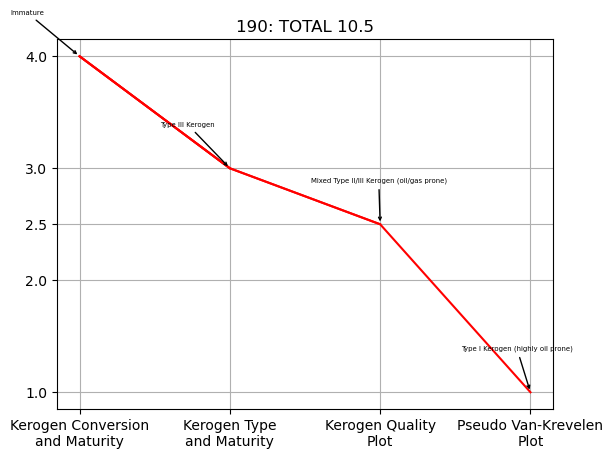

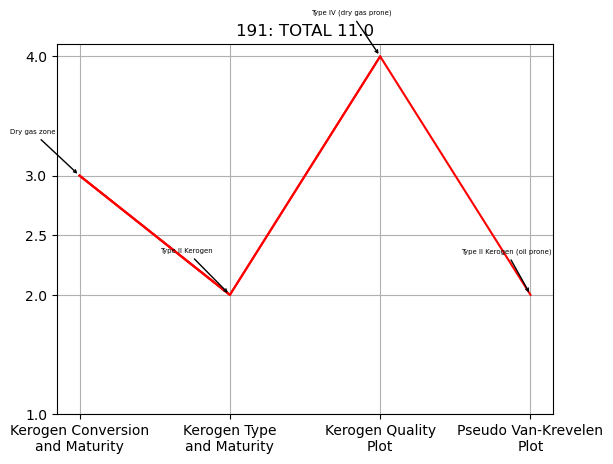

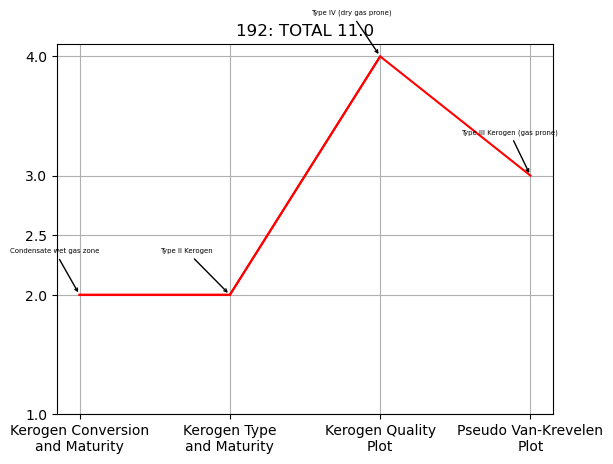

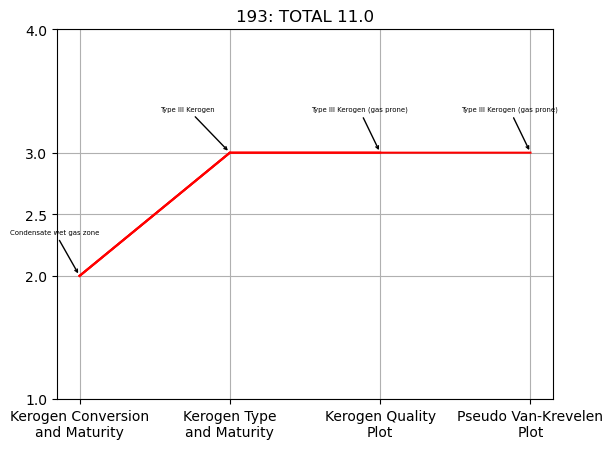

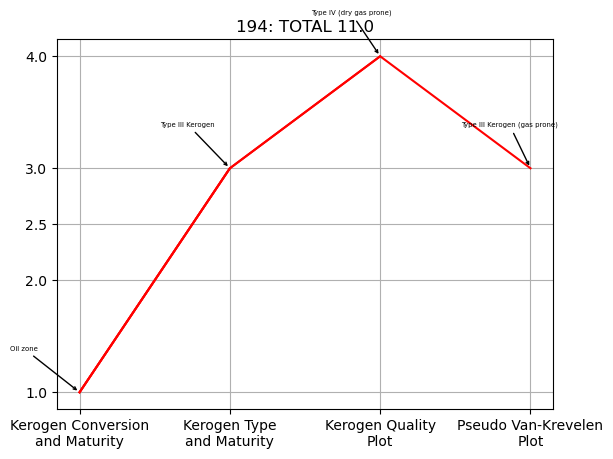

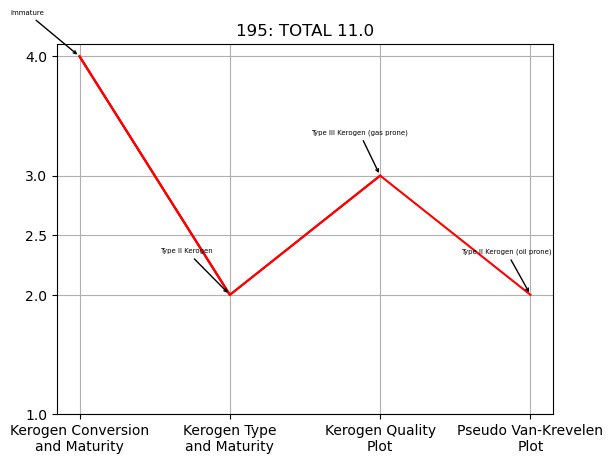

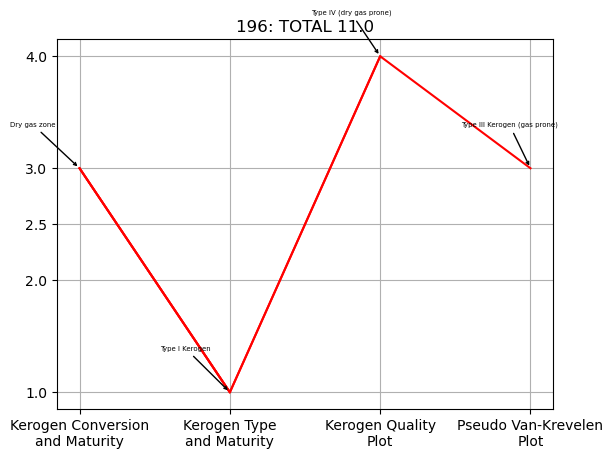

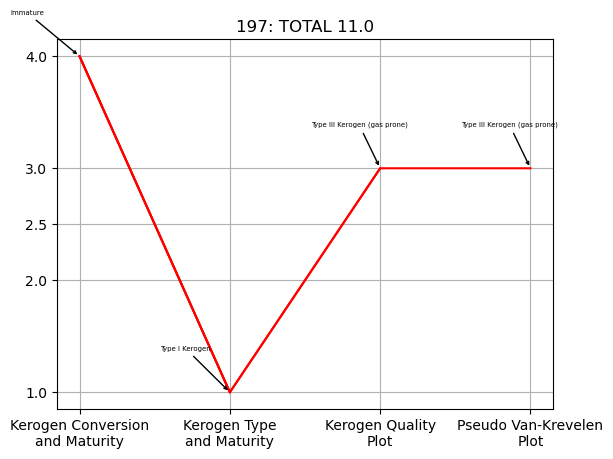

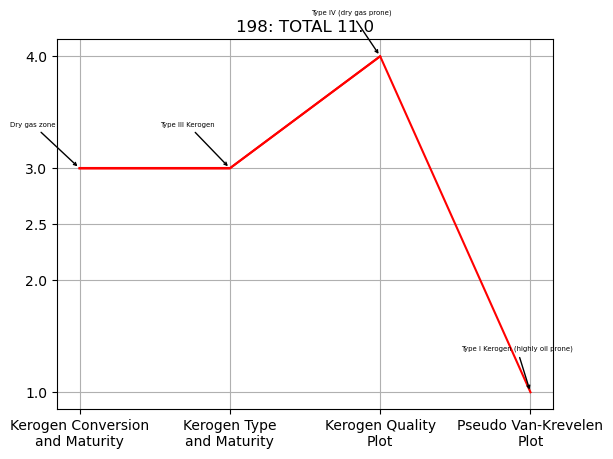

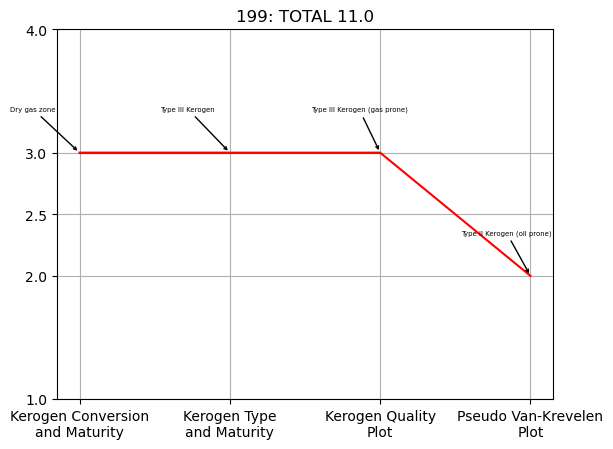

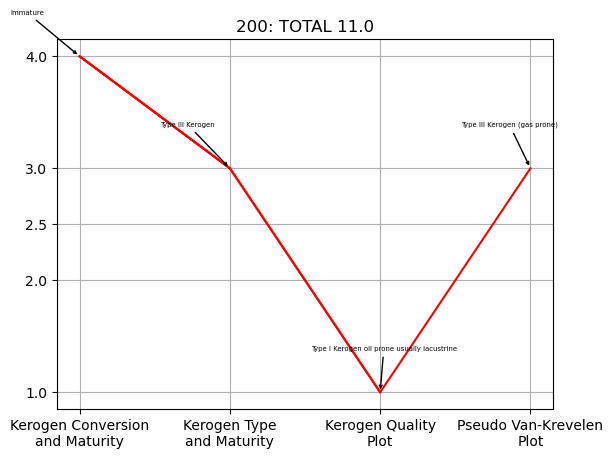

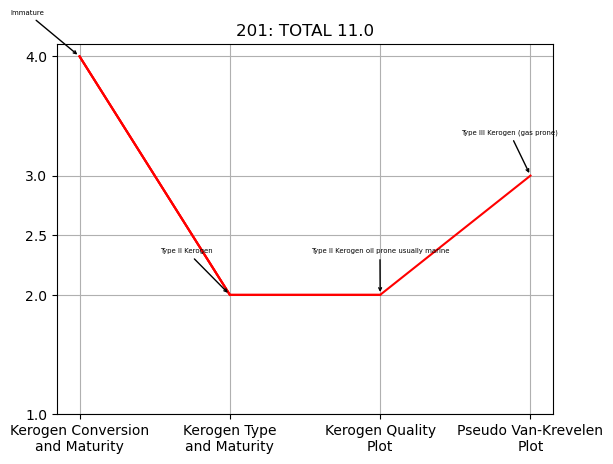

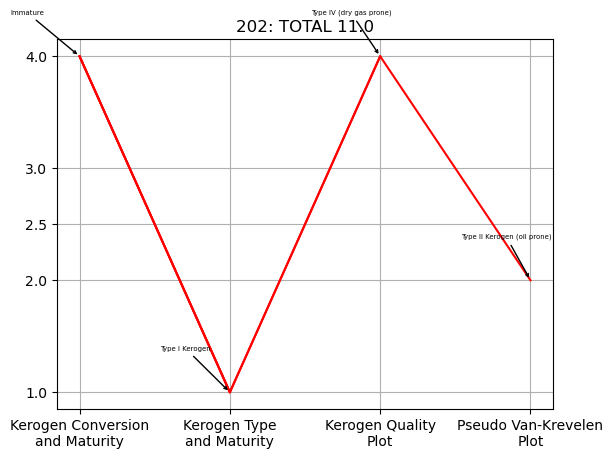

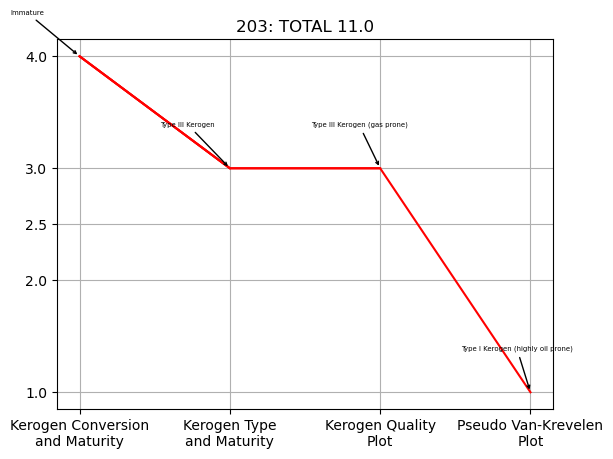

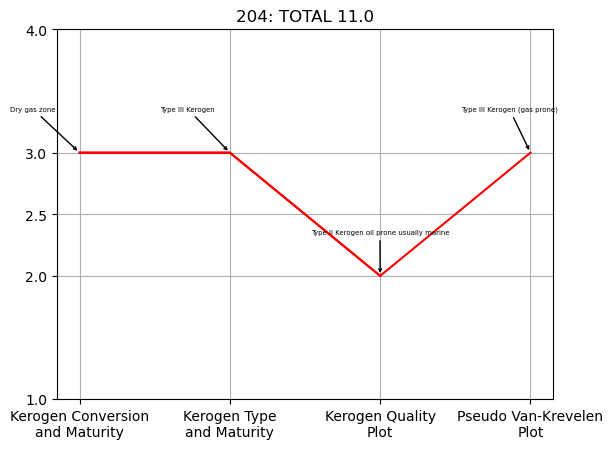

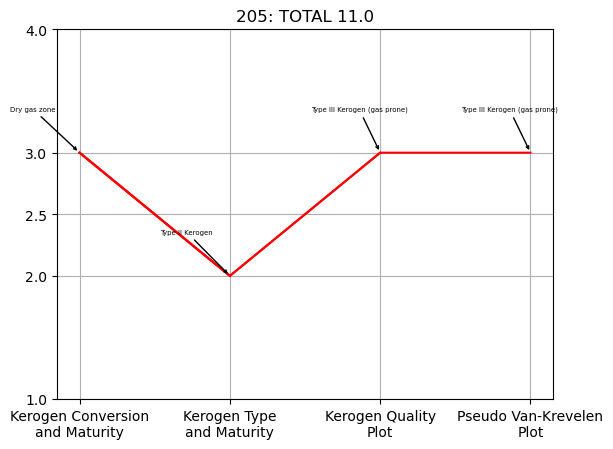

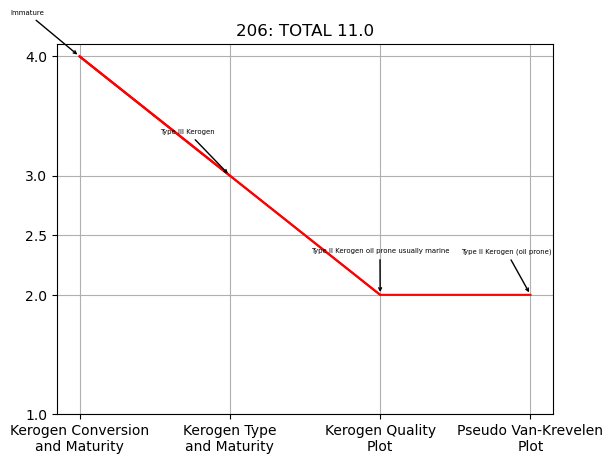

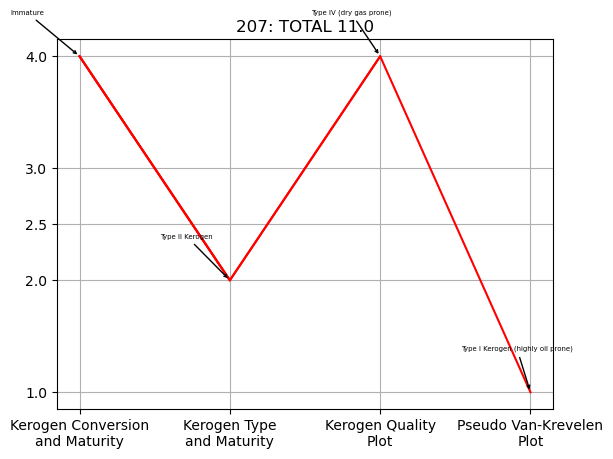

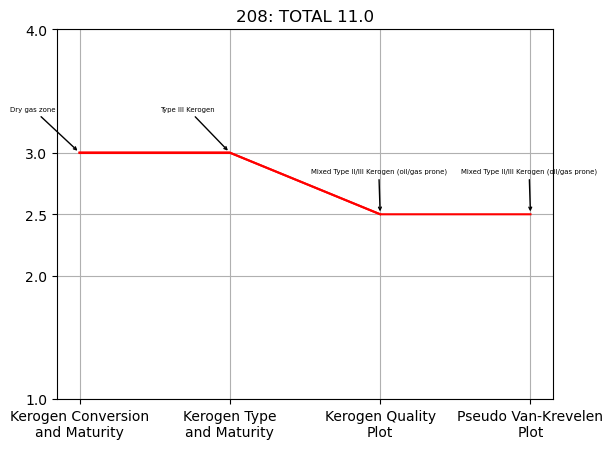

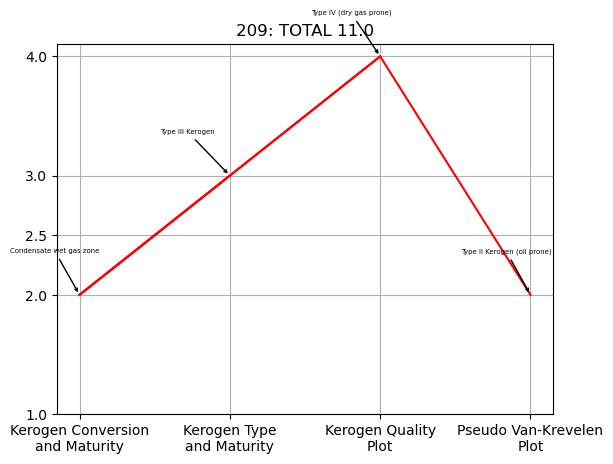

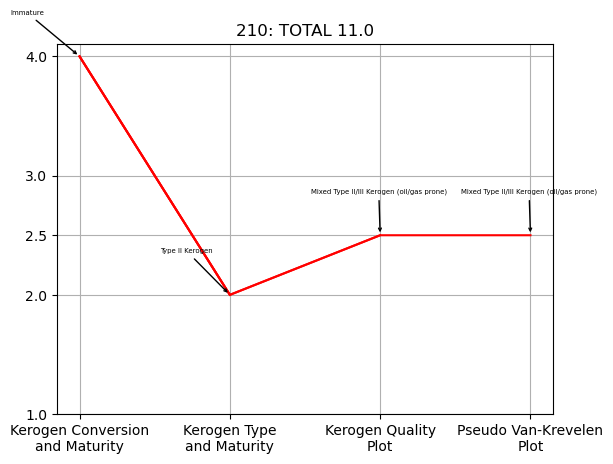

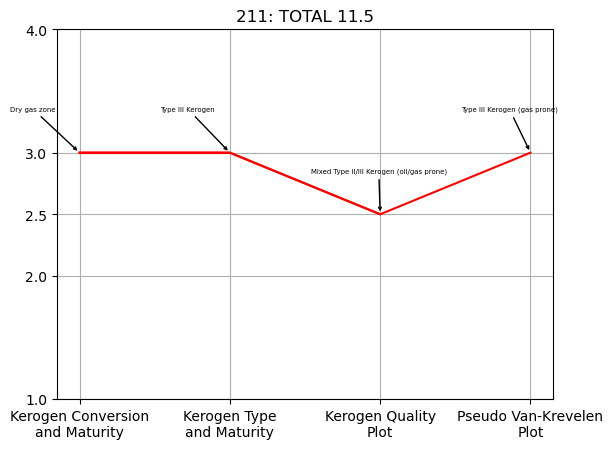

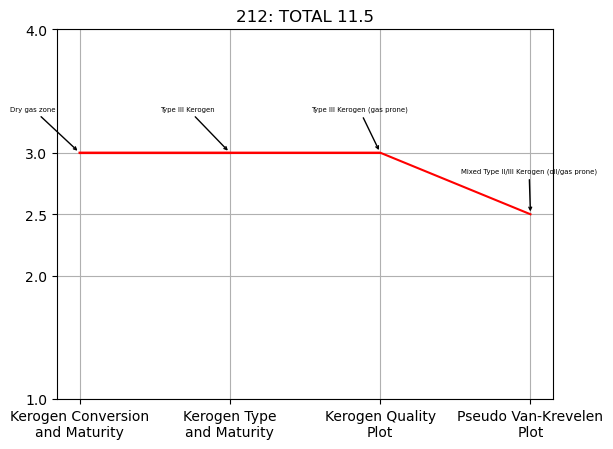

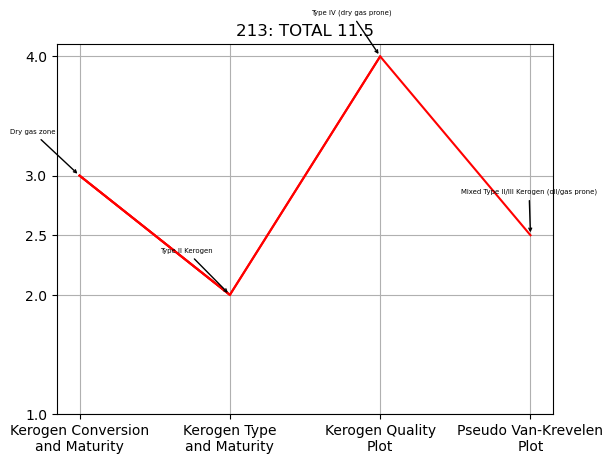

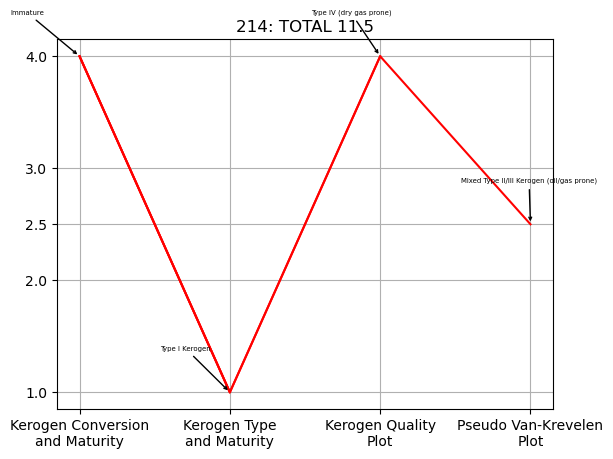

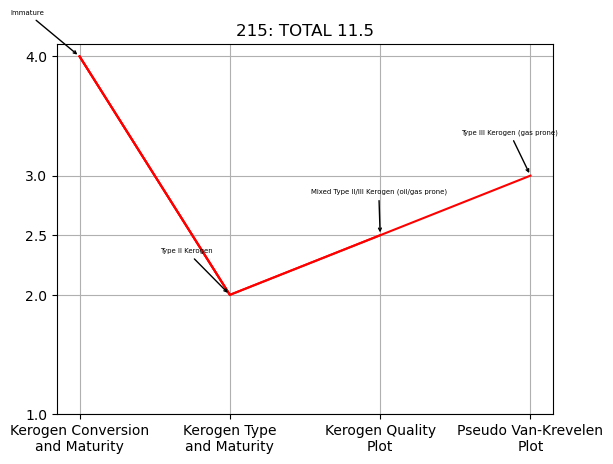

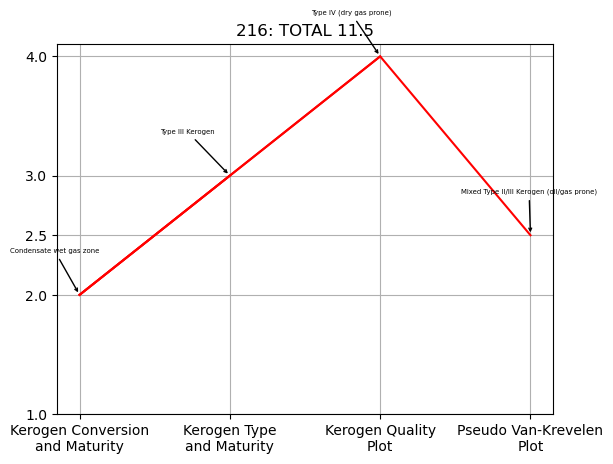

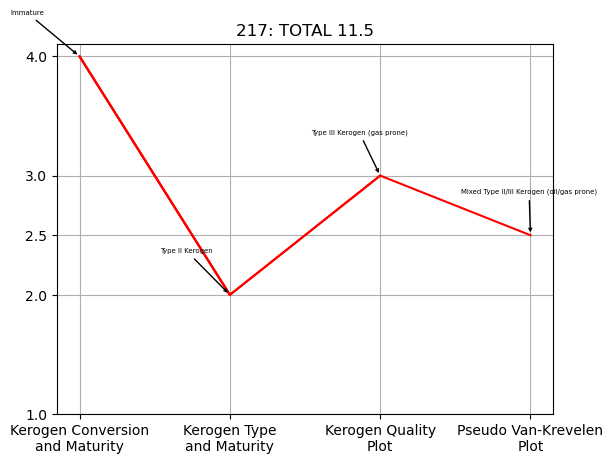

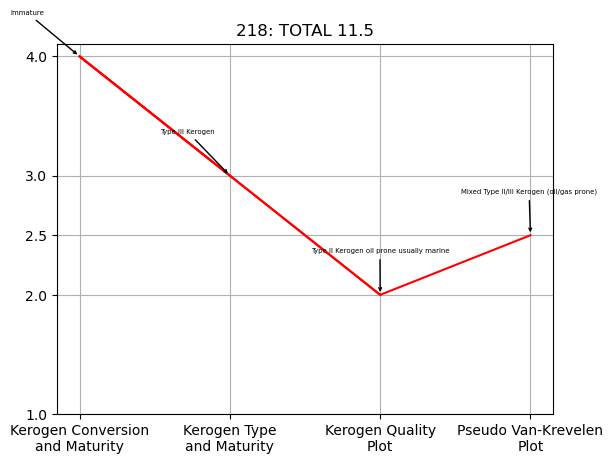

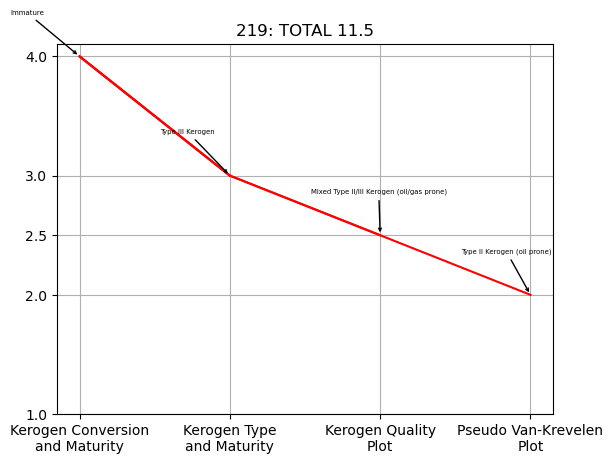

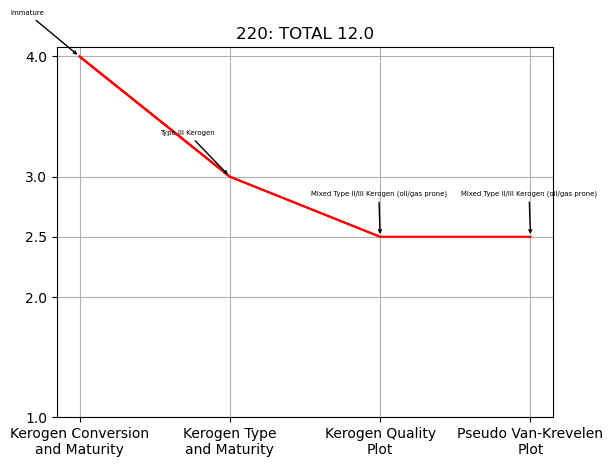

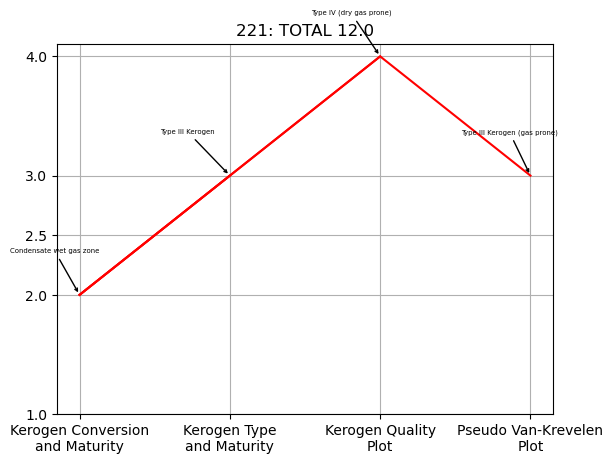

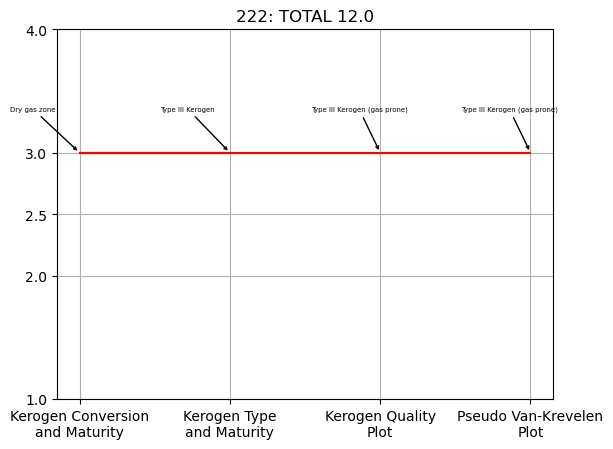

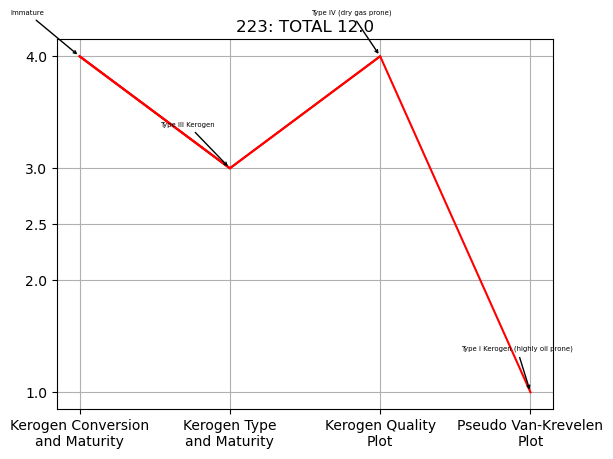

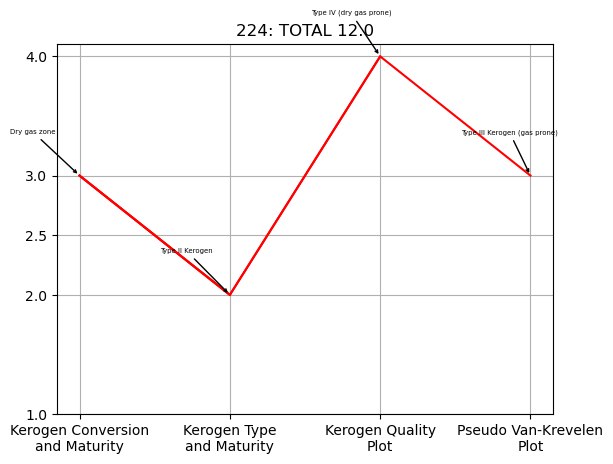

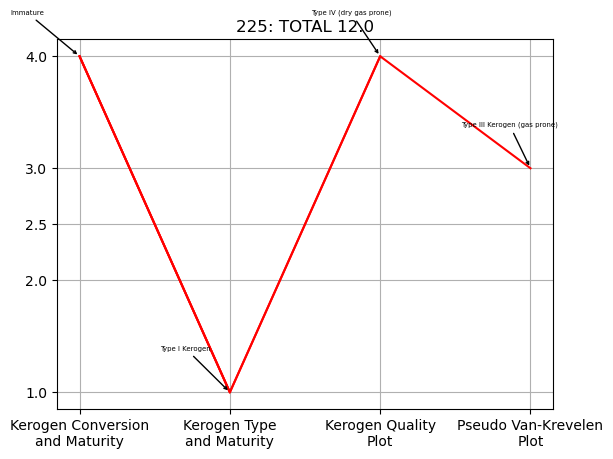

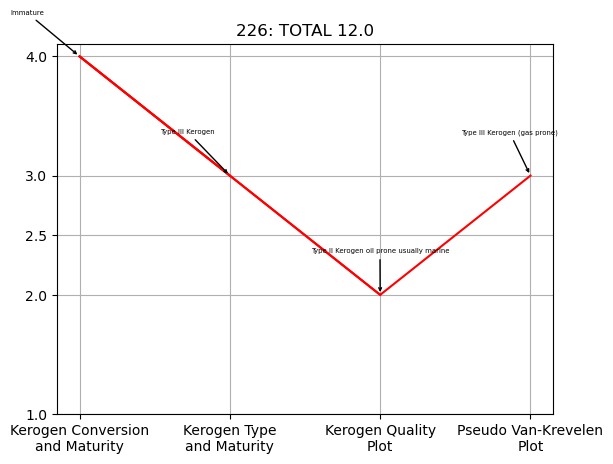

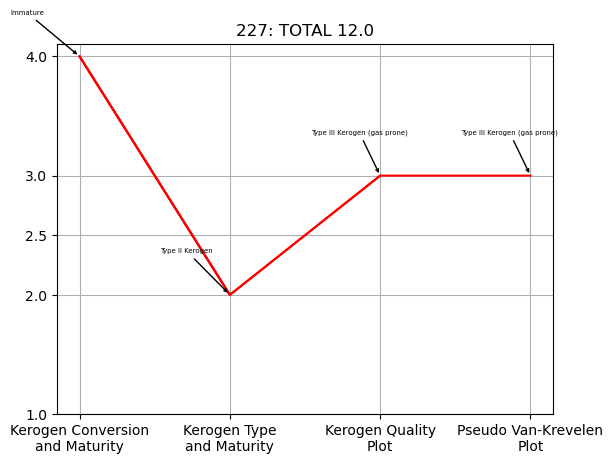

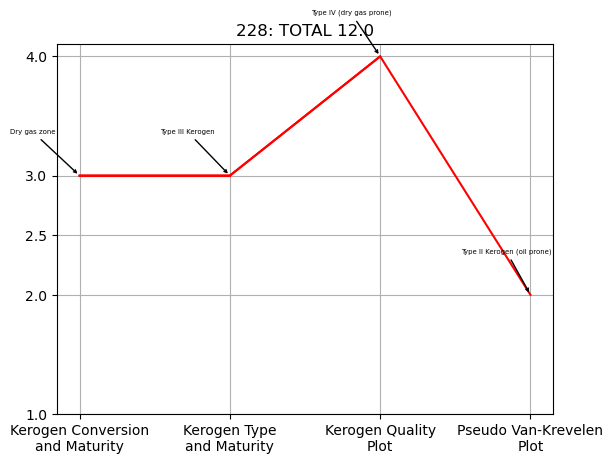

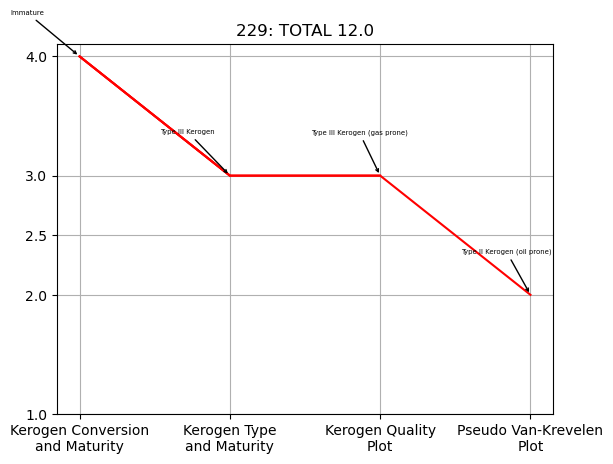

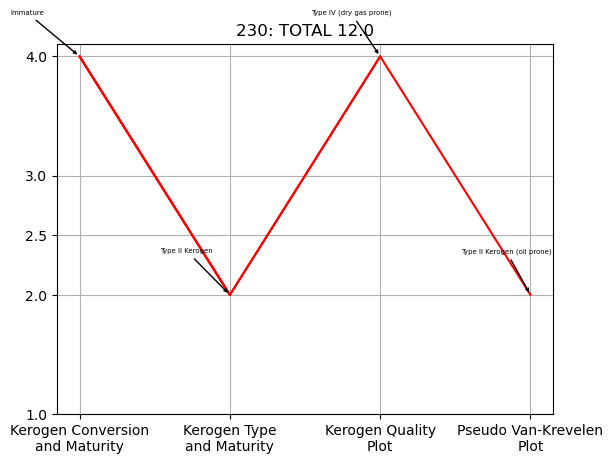

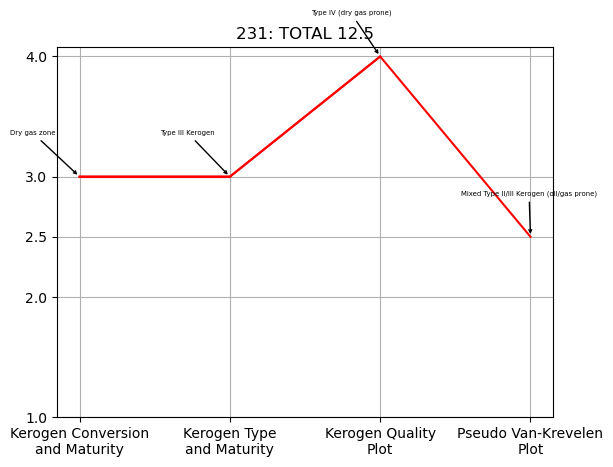

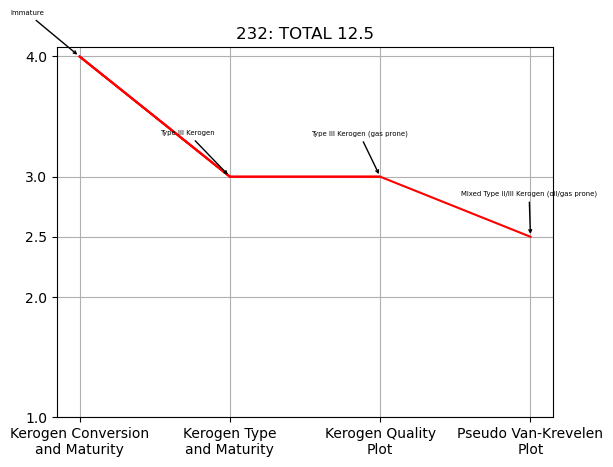

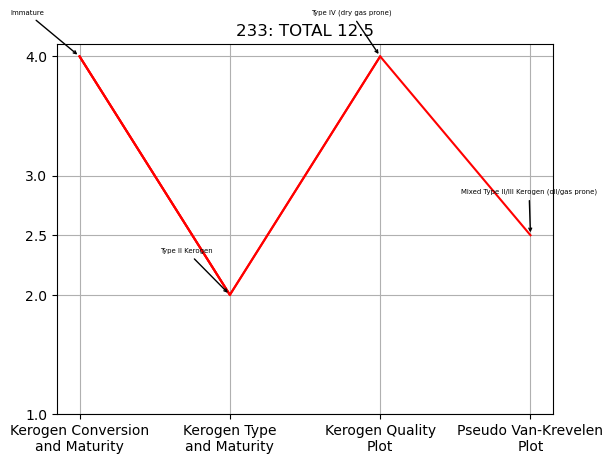

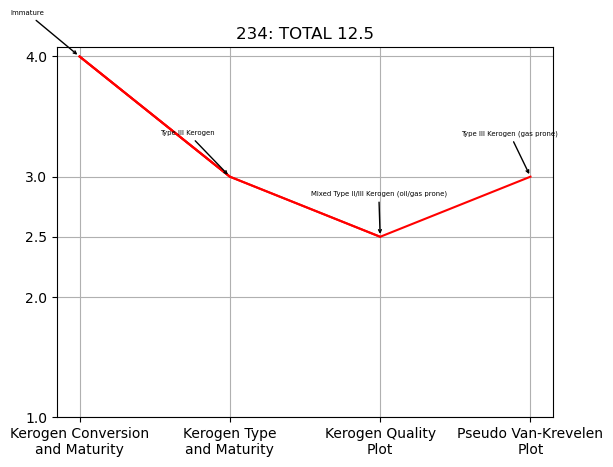

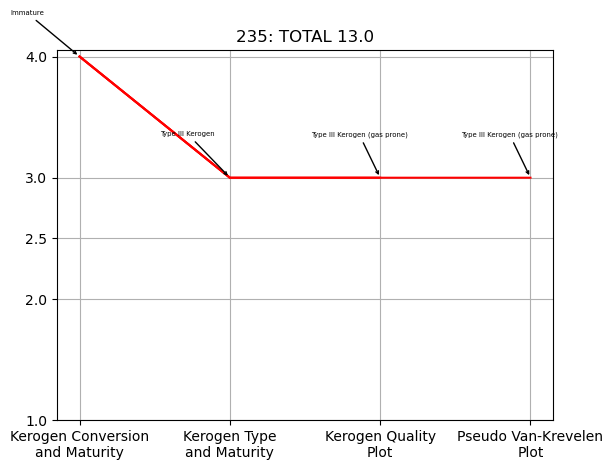

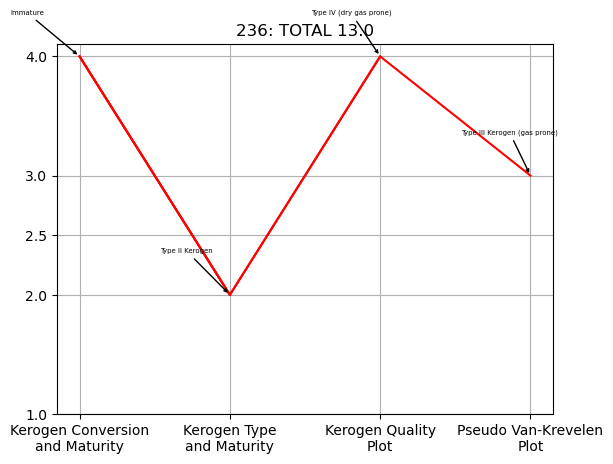

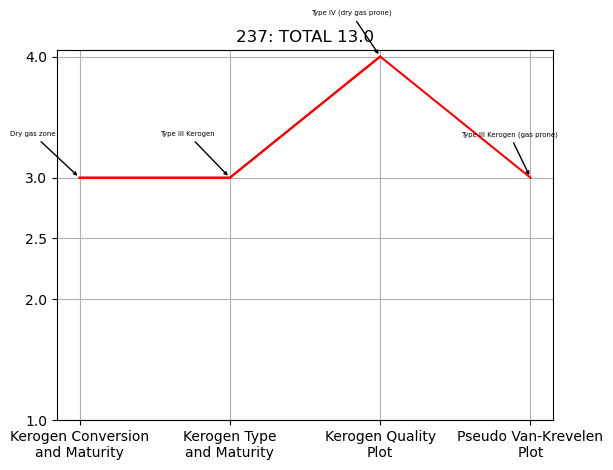

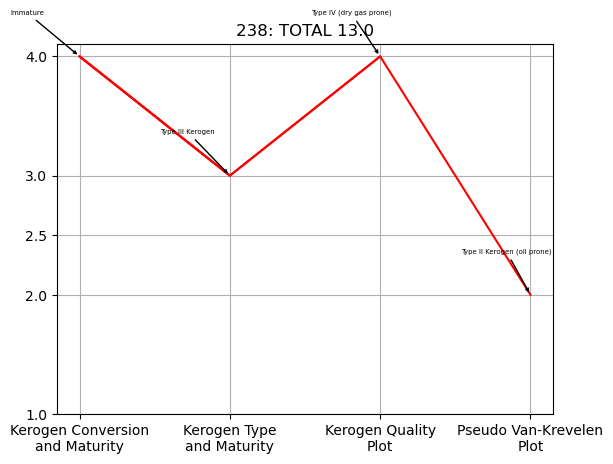

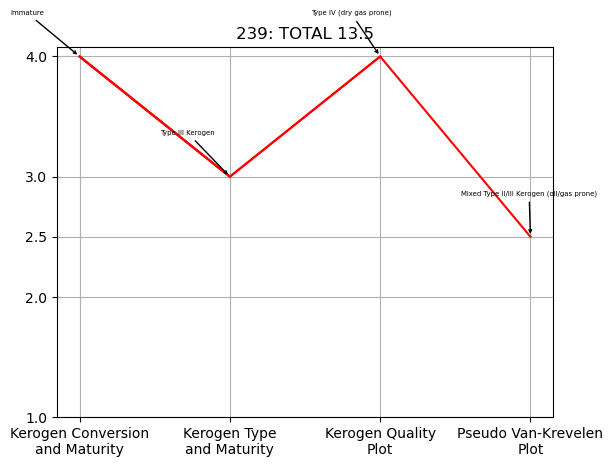

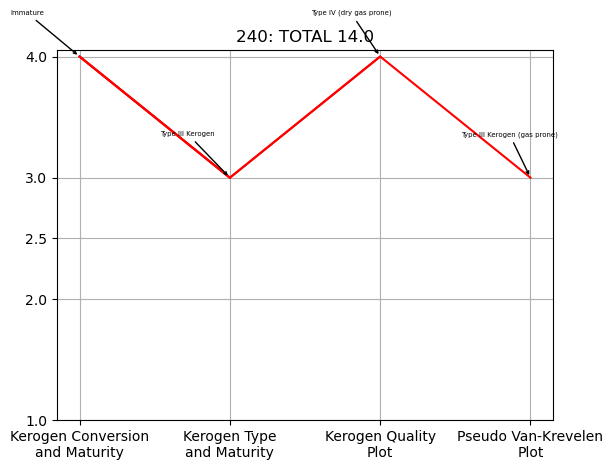

{('Oil zone : 1', 'Type I Kerogen : 1', 'Type I Kerogen oil prone usually lacustrine : 1', 'Type I Kerogen (highly oil prone) : 1'): 4.0, ('Oil zone : 1', 'Type I Kerogen : 1', 'Type I Kerogen oil prone usually lacustrine : 1', 'Type II Kerogen (oil prone) : 2'): 5.0, ('Oil zone : 1', 'Type I Kerogen : 1', 'Type II Kerogen oil prone usually marine : 2', 'Type I Kerogen (highly oil prone) : 1'): 5.0, ('Oil zone : 1', 'Type II Kerogen : 2', 'Type I Kerogen oil prone usually lacustrine : 1', 'Type I Kerogen (highly oil prone) : 1'): 5.0, ('Condensate wet gas zone : 2', 'Type I Kerogen : 1', 'Type I Kerogen oil prone usually lacustrine : 1', 'Type I Kerogen (highly oil prone) : 1'): 5.0, ('Oil zone : 1', 'Type I Kerogen : 1', 'Type I Kerogen oil prone usually lacustrine : 1', 'Mixed Type II/III Kerogen (oil/gas prone) : 2.5'): 5.5, ('Oil zone : 1', 'Type I Kerogen : 1', 'Mixed Type II/III Kerogen (oil/gas prone) : 2.5', 'Type I Kerogen (highly oil prone) : 1'): 5.5, ('Oil zone : 1', 'Type 

In [4]:
#!/usr/bin/env python3

import time
import matplotlib.pyplot as plt  ####


def combinations(rang):
	from collections import defaultdict
	adj = defaultdict(int)
	adj2 = defaultdict(int)
	lss = set()
	pool = tuple(rang)
	n = len(pool)      
	r = n 
	indices = [n]  * (n)
	cycles = [0] * (n)
	
	all_variables = [ [1,2,3,4] ,       # 4   Kerogen_Conversion_and_Maturity
		              [1,2,3] ,         # 3   Kerogen_Type_and_Maturity
					  [1,2,2.5,3,4] ,   # 5   Kerogen_Quality_Plot
					  [1,2,2.5,3] ]     # 4   Pseudo_Van_Krevelen_Plot
	########################################################
    #.   #  4 x 3 x 5 x 4 = 240 combinations 
	
	Kerogen_Conversion_and_Maturity  = [ "Oil zone" , "Condensate wet gas zone" , "Dry gas zone" , "Immature" ] # 4
	
	Kerogen_Type_and_Maturity = [ "Type I Kerogen" ,  "Type II Kerogen" ,  "Type III Kerogen"  ] # 3
	
	Kerogen_Quality_Plot =  [  "Type I Kerogen oil prone usually lacustrine" , 
							"Type II Kerogen oil prone usually marine" , "Mixed Type II/III Kerogen (oil/gas prone)" ,
							"Type III Kerogen (gas prone)" , "Type IV (dry gas prone)" ]  # 5
	
	Pseudo_Van_Krevelen_Plot  = [ "Type I Kerogen (highly oil prone)"  , "Type II Kerogen (oil prone)"  ,
								"Mixed Type II/III Kerogen (oil/gas prone)" , "Type III Kerogen (gas prone)" ] # 4
	
	variables = [Kerogen_Conversion_and_Maturity]+[Kerogen_Type_and_Maturity]+[Kerogen_Quality_Plot]+[Pseudo_Van_Krevelen_Plot]
	
	
	
	lim = ['Kerogen Conversion\nand Maturity' , 'Kerogen Type\nand Maturity' , 'Kerogen Quality\nPlot' , 'Pseudo Van-Krevelen\nPlot' ]
	##########################################
	
	mp = []
	longest = []
	for i in all_variables:
		if mp != [] and len(i) > max(mp) :
			longest = i
		mp.append(len(i) )
	print(longest)
	
	##
	
	lin=[len(i) for i in all_variables] ## OR [ 4 , 3 , 5 , 4 ]
	mx = max(lin)  ## 5
	mat = [[0]* len(all_variables) for _ in range(mx)]
	mat2 = [[0]* len(all_variables) for _ in range(mx)]
	
	cn = 0
	for row in lin:
		for col in range(row):                                     # 0-4
			mat[col][cn] = 	all_variables[cn][col]				   # 0-3
			mat2[col][cn]	= 	variables[cn][col]				   # 0-5
											                       # 0-4
		cn += 1
		"""
		[1, 1, 1,  1]
		[2, 2, 2,  2]
		[3, 3, 2.5,2.5]
		[4, 0, 3,  3]
		[0, 0, 4,  0]
		
    #    Transpose all_variables
    #    4  3  5   4
		"""
		##########################################
		
	cyc = [ sum(i) for i in all_variables ] 
	#rang = [i+1 for i in rang ]
	
	while n:
		for i in reversed(range(r )):
			temp = []
			cn = 0
			q = []
			qw = []
			sm = 0
			
			for c in cycles:
				temp.append(  mat[c][cn] )
				q.append( mat2[c][cn] +" : "  +  str( mat[c][cn])   )
				qw.append( mat2[c][cn])
				cn+=1
				
			#print()
			sm = sum( temp )   
			cn = 0
			adj[  tuple(q) ] = float(sm)
			adj2[  tuple(qw) ] = float(sm)
			lss.add( tuple(cycles + [sm])   )##^^^^^^^^^^^^^^^^^^^^^^^
			cycles[i] += 1
			if cycles[i] == rang[i]:  #######
				cycles[i] = 0
			else:
				break 
		else:
			break
	sorted_dict = dict(sorted(adj.items(), key=lambda x: x[1]))
	sorted_dict2 = dict(sorted(adj2.items(), key=lambda x: x[1]))
	#lss.sort(key=lambda e: e[-1])
	CN = 0
	for cycles in sorted(lss, key=lambda x: x[-1]):
		CN +=1
		temp = []
		cn=0
		q = []
		qw = []
		sm = 0
	
	
		fig = plt.figure()       # <<<<<
		ax = fig.add_subplot()   # <<<<<
		fig.show()               # <<<<<
	
		cccc = []         # <<<<<
		for c in cycles[:-1]:
	#cccc.append(c)   # <<<<<
			cccc.append(  mat[c][cn] )
		
	#plt.plot(cn , c)
			ax.plot(cccc,color="r") # <<<<<
			ax.set_xticks([i for i in range(len(cccc))])  # <<<<<
	#ax.set_yticks([i for i in range(mx)])  # <<<<<
			ax.set_yticks( longest) 
			ax.set_xticklabels([lim[i] for i in range(len(cccc))], fontsize=10)
	#ax.set_yticklabels([i+1 for i in range(mx)])
		
			fig.canvas.draw()  # <<<<<
			time.sleep(0.01)    # <<<<<
		
		
		
	# c cn
	#print(c, cn) #                   c - row     |  cn - col
			temp.append(  mat[c][cn] )
			q.append( mat2[c][cn] +" : "  +  str( mat[c][cn])   )
			qw.append( mat2[c][cn])
		
		
			ax.annotate(
				mat2[c][cn]  ,
		#xy=(cn, c),
				xy=(cn,  mat[c][cn] ) ,
				xycoords='data',
				xytext=(-50, 30), textcoords='offset points',
				arrowprops=dict(arrowstyle="->"),   fontsize=5)    # <<<<<
			cn+=1
		
		plt.title(str(CN)+": TOTAL "+str( float( sum( temp ) ) ))	# NEW
		plt.grid() # <<<<<
		plt.show() # <<<<<
	
	return sorted_dict,  sorted_dict2


rang = [ 4 , 3 , 5 , 4 ]

print( combinations(rang)[0] ) # , combinations(rang)[1],'here')

In [5]:
9

9